# 1.) Set up importand dependecies

##Setting up kaggle

In [1]:
!pip install kaggle

In [ ]:
#This is for google colab settings only

from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
#This is for google colab settings only

# 1. Remove the file (force delete, even if it's not a folder)
!rm -rf /root/.kaggle

# 2. Recreate as a directory
!mkdir -p /root/.kaggle

# 3. Copy kaggle.json from Drive
!cp /content/drive/MyDrive/kaggle/kaggle.json /root/.kaggle/

# 4. Fix permissions
!chmod 600 /root/.kaggle/kaggle.json



##Set up yt-dlp

In [ ]:
!pip install yt-dlp

##Set up Whisper Model

In [ ]:
!pip install -q git+https://github.com/openai/whisper.git

In [ ]:
!apt-get install -y ffmpeg


In [ ]:
!pip uninstall torch torchvision torchaudio -y
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

## Set Up Google Gemini

In [ ]:
!pip install -q -U google-generativeai

In [ ]:
!pip install -q langdetect

In [4]:
# Import the Python SDK
import google.generativeai as genai
# Used to securely store your API key
#from google.colab import userdata

#GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
GOOGLE_API_KEY = os.getenv('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

In [5]:
model_gemini = genai.GenerativeModel('gemini-2.5-flash')

In [28]:
!pip install deep-translator

##Import Libraries

In [30]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yt_dlp
import os
import shutil

#Whisper Model
import whisper
import torch
from whisper.utils import get_writer

#langdetection
from langdetect import detect

#Split Dataset, and metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay

#for change text to vector
from sklearn.feature_extraction.text import TfidfVectorizer

#models
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

#translator 
from deep_translator import GoogleTranslator

# 2.) Explore the data (EDA)


##Download the data

In [ ]:
!kaggle datasets list

In [ ]:
!kaggle datasets download cyberevil545/youtube-videos-data-for-ml-and-trend-analysis

In [ ]:
!unzip /content/youtube-videos-data-for-ml-and-trend-analysis.zip

##Clean the data

In [6]:
df = pd.read_csv('youtube-videos-data-for-ml-and-trend-analysis\youtube_data.csv')

df

<>:1: SyntaxWarning: invalid escape sequence '\y'
<>:1: SyntaxWarning: invalid escape sequence '\y'
C:\Users\Acer\AppData\Local\Temp\ipykernel_4224\377861572.py:1: SyntaxWarning: invalid escape sequence '\y'
  df = pd.read_csv('youtube-videos-data-for-ml-and-trend-analysis\youtube_data.csv')


,video_id,duration,bitrate,bitrate(video),height,width,frame rate,frame rate(est.),codec,category,url,title,description,hashtags,views,likes,comments
0,--F7dc-_FSI,180,5777,5640,1920,1080,25.00,25.00,h264,News & Politics,https://www.youtube.com/watch?v=--F7dc-_FSI,«السودان ينتفض» أمام السفارة بالقاهرة,حرية سلام وعدالة، الثورة خيار الشعب.. بهذا اله...,"في, عسكري, حكم, حرية, بخصوص, المصري اليوم, الس...",4078,41,3
1,--cCAD-8Y_U,930,1195,1001,1280,720,30.00,30.00,h264,Gaming,https://www.youtube.com/watch?v=--cCAD-8Y_U,Pokemon Tower Defense Episodio 2,Espero que tenham gostado do video!,"Pokémon (Anime/Manga Franchise), Pokémon (Vide...",33,2,1
2,--g2gG8pQ0w,233,3028,2833,1280,720,23.98,23.98,h264,Comedy,https://www.youtube.com/watch?v=--g2gG8pQ0w,New Hip Hop - Kemo Treats - Pancakes,Download all our music for FREE just enter $0....,"breaking bad spoof, Recipes, Pancakes, canada,...",13227,135,17
3,-0DR7-voRCU,562,431,300,320,240,29.97,0.00,h264,People & Blogs,https://www.youtube.com/watch?v=-0DR7-voRCU,Sister's Keeper Impression,A Review of the Shampoo Bar(Sunburst) and Dip ...,"natural hair, first impression, sister's keepe...",43,1,0
4,-0Fkp-2EzX0,300,3087,2929,1280,720,23.98,23.98,h264,Gaming,https://www.youtube.com/watch?v=-0Fkp-2EzX0,JBHAMMER777 (AKUMA) VS KtossPol Rank 1 (Vega)...,JBHAMMER777 is he strong enough to fight again...,"Tokido, momochi, (Ryu), AE, 11, at, Piyoppia, ...",222,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17584,zyK7-WQTDaY,571,1285,1175,640,480,29.92,0.00,h264,People & Blogs,https://www.youtube.com/watch?v=zyK7-WQTDaY,rentero 1ª parte 2.MOD,,"rentero, latapialinares, iu, pca",27,0,0
17585,zyPO-hxvWDg,105,840,719,640,480,29.97,0.00,h264,People & Blogs,https://www.youtube.com/watch?v=zyPO-hxvWDg,Cascavel faz campanha impecável em campeonato ...,,NaN,295,1,0
17586,zyYk-W_JqNY,161,920,820,640,480,29.97,0.00,h264,People & Blogs,https://www.youtube.com/watch?v=zyYk-W_JqNY,Marcha para Cristo.San Francisco Menéndez. 5 ...,NaN,"Cristo, Marcha, para",770,3,0
17587,zz3a-wnxBrs,291,4892,4738,1920,1080,29.97,29.97,h264,Gaming,https://www.youtube.com/watch?v=zz3a-wnxBrs,DK Solo Steinerne Kern,"Das ist mein erstes Video, also ist noch alles...","Steinerne Kern, Vitriolsteindrachen, DK Solo, ...",42,1,0


In [62]:
df.sort_values(by="duration", ascending=False)

,video_id,duration,bitrate,bitrate(video),height,width,frame rate,frame rate(est.),codec,category,url,title,description,hashtags,views,likes,comments
12785,iTPy-mie0iE,25845,3988,0,1920,1080,12.00,0.00,vp8,Nonprofits & Activis,https://www.youtube.com/watch?v=iTPy-mie0iE,Номинация «Вокал». Второй конкурсный день,,NaN,1287,3,0
13129,jiV-3cvrjQU,18001,199,65,640,480,29.97,0.00,h264,Music,https://www.youtube.com/watch?v=jiV-3cvrjQU,5 HOUR HARDSTYLE MIX 2012,"Alright, PLEASE like and favourite. Took a l...","nustyle hardstyle, nu-style, hardstyle mixes 2...",20596,197,83
4763,GXKW-uieSdI,14460,1672,1478,1920,1080,29.97,29.97,h264,People & Blogs,https://www.youtube.com/watch?v=GXKW-uieSdI,القــــران الكريم_ الجزء السادس عشر _ عامر الك...,جعله الله في ميزان حسناتنا جميعا أسالكم الدعا...,"Quran, Arabic",369,5,0
10067,ZVVG-MAjDIg,9819,2547,2353,1280,720,25.00,25.00,h264,Gaming,https://www.youtube.com/watch?v=ZVVG-MAjDIg,ICL 15 - CSGO - Rájátszás 2. kör - ancients vs...,Az INFiNiTY Csarnok LAN 15. állomásán a CS2HU ...,"icl, n0Rb1, csoportok, lan, neware, cs2hu, csgo",1488,7,1
5894,Klqv9t1zVww,8438,800,704,640,352,23.98,0.00,h264,Education,https://www.youtube.com/watch?v=Klqv9t1zVww,Police State 4: The Rise of FEMA Full Length,Order The DVD at: http://infowars-shop.stores....,"mercenary, false flag, policestate4, conspirac...",2527459,14210,4495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14004,mr9y-OljTv0,1,5839,5934,1920,1080,29.92,29.92,h264,Entertainment,https://www.youtube.com/watch?v=mr9y-OljTv0,Warm Up,,"Up, Warm",5,0,0
6260,M5Ww-Cq9y7U,1,833,748,320,240,15.00,0.00,h264,Sports,https://www.youtube.com/watch?v=M5Ww-Cq9y7U,P4300698,,P4300698,0,0,0
5083,Hj5r-Miup00,1,456,431,320,240,15.00,0.00,h264,People & Blogs,https://www.youtube.com/watch?v=Hj5r-Miup00,P4061577,,P4061577,0,0,0
3283,B2QJ-YfqUpY,1,1354,1316,1280,720,8.00,8.00,h264,Entertainment,https://www.youtube.com/watch?v=B2QJ-YfqUpY,22 janvier 2012 14:32,Cette vid�o a �t� envoy�e � partir d'un t�l�ph...,mobile,9,0,0


In [69]:
df.describe()

,duration,bitrate,bitrate(video),height,width,frame rate,frame rate(est.),views,likes,comments
count,17589.000000,17589.000000,17589.000000,17589.000000,17589.000000,17589.000000,17589.000000,1.758900e+04,17589.000000,17589.000000
mean,241.551936,1271.354369,1150.418443,766.781170,504.591961,26.467639,9.471172,6.894158e+04,208.862641,12.899312
std,493.026994,1375.359875,1351.800202,467.289304,262.727746,6.039748,13.253197,3.537491e+06,8477.504735,225.839378
min,1.000000,0.000000,0.000000,108.000000,88.000000,3.750000,0.000000,0.000000e+00,0.000000,0.000000
25%,51.000000,437.000000,326.000000,426.000000,320.000000,25.000000,0.000000,3.800000e+01,0.000000,0.000000
50%,135.000000,743.000000,632.000000,640.000000,480.000000,29.970000,0.000000,1.520000e+02,1.000000,0.000000
75%,268.000000,1293.000000,1184.000000,960.000000,720.000000,29.970000,25.000000,8.000000e+02,4.000000,1.000000
max,25845.000000,22421.000000,22229.000000,2592.000000,1944.000000,59.080000,30.000000,4.103849e+08,836981.000000,16634.000000


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17589 entries, 0 to 17588
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   video_id          17589 non-null  object 
 1   duration          17589 non-null  int64  
 2   bitrate           17589 non-null  int64  
 3   bitrate(video)    17589 non-null  int64  
 4   height            17589 non-null  int64  
 5   width             17589 non-null  int64  
 6   frame rate        17589 non-null  float64
 7   frame rate(est.)  17589 non-null  float64
 8   codec             17589 non-null  object 
 9   category          17589 non-null  object 
 10  url               17589 non-null  object 
 11  title             17589 non-null  object 
 12  description       16477 non-null  object 
 13  hashtags          16013 non-null  object 
 14  views             17589 non-null  int64  
 15  likes             17589 non-null  int64  
 16  comments          17589 non-null  int64 

In [ ]:
df.sort_values(by="views", ascending=False)

#3.) Prepare the Data for model training

In [75]:
df = df[(df['duration'] > 60) & (df['duration'] < 600)]
df

,video_id,duration,bitrate,bitrate(video),height,width,frame rate,frame rate(est.),codec,category,url,title,description,hashtags,views,likes,comments
0,--F7dc-_FSI,180,5777,5640,1920,1080,25.00,25.00,h264,News & Politics,https://www.youtube.com/watch?v=--F7dc-_FSI,«السودان ينتفض» أمام السفارة بالقاهرة,حرية سلام وعدالة، الثورة خيار الشعب.. بهذا اله...,"في, عسكري, حكم, حرية, بخصوص, المصري اليوم, الس...",4078,41,3
2,--g2gG8pQ0w,233,3028,2833,1280,720,23.98,23.98,h264,Comedy,https://www.youtube.com/watch?v=--g2gG8pQ0w,New Hip Hop - Kemo Treats - Pancakes,Download all our music for FREE just enter $0....,"breaking bad spoof, Recipes, Pancakes, canada,...",13227,135,17
3,-0DR7-voRCU,562,431,300,320,240,29.97,0.00,h264,People & Blogs,https://www.youtube.com/watch?v=-0DR7-voRCU,Sister's Keeper Impression,A Review of the Shampoo Bar(Sunburst) and Dip ...,"natural hair, first impression, sister's keepe...",43,1,0
4,-0Fkp-2EzX0,300,3087,2929,1280,720,23.98,23.98,h264,Gaming,https://www.youtube.com/watch?v=-0Fkp-2EzX0,JBHAMMER777 (AKUMA) VS KtossPol Rank 1 (Vega)...,JBHAMMER777 is he strong enough to fight again...,"Tokido, momochi, (Ryu), AE, 11, at, Piyoppia, ...",222,2,0
5,-0J-a-kKR1M,135,467,371,320,240,30.00,0.00,h264,People & Blogs,https://www.youtube.com/watch?v=-0J-a-kKR1M,D'Salapa mirae,,"mirae, D'Salapa",168,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17584,zyK7-WQTDaY,571,1285,1175,640,480,29.92,0.00,h264,People & Blogs,https://www.youtube.com/watch?v=zyK7-WQTDaY,rentero 1ª parte 2.MOD,,"rentero, latapialinares, iu, pca",27,0,0
17585,zyPO-hxvWDg,105,840,719,640,480,29.97,0.00,h264,People & Blogs,https://www.youtube.com/watch?v=zyPO-hxvWDg,Cascavel faz campanha impecável em campeonato ...,,NaN,295,1,0
17586,zyYk-W_JqNY,161,920,820,640,480,29.97,0.00,h264,People & Blogs,https://www.youtube.com/watch?v=zyYk-W_JqNY,Marcha para Cristo.San Francisco Menéndez. 5 ...,NaN,"Cristo, Marcha, para",770,3,0
17587,zz3a-wnxBrs,291,4892,4738,1920,1080,29.97,29.97,h264,Gaming,https://www.youtube.com/watch?v=zz3a-wnxBrs,DK Solo Steinerne Kern,"Das ist mein erstes Video, also ist noch alles...","Steinerne Kern, Vitriolsteindrachen, DK Solo, ...",42,1,0


###Extract the audio file

In [7]:
#function to download an audio file


def download_audio_files(youtube_url, video_id):
    output_dir = 'audio-file'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Set the output path
    audio_file_path = os.path.join(output_dir, f'{video_id}')

    # Configure the yt_dlp
    ydl_opts = {
        'format': 'bestaudio/best',
        'outtmpl': audio_file_path,
        'postprocessors': [{
            'key': 'FFmpegExtractAudio',
            'preferredcodec': 'mp3'
        }],
        # Optional: Suppress the error message printed by yt_dlp itself
        'quiet': True, 
        'no_warnings': True,
    }

    print(f"Attempting to download: {youtube_url}")
    
    try:
        with yt_dlp.YoutubeDL(ydl_opts) as ydl:
            ydl.download([youtube_url])
        
        # If the download is successful, return the path
        print(f"Successfully downloaded and saved to: {audio_file_path}.mp3")
        return audio_file_path
        
    except yt_dlp.utils.DownloadError as e:
        # This block catches the specific 403 Forbidden error or any other download error
        print(f"⚠️ ERROR downloading {youtube_url} (ID: {video_id}). Skipping file.")
        # You can print the specific error for debugging:
        # print(f"Detailed Error: {e}")
        return None # Return None to indicate failure/skip



def clean_directory(directory_path):
    try:
        # Use shutil.rmtree to remove the directory and its contents
        shutil.rmtree(directory_path)
    except Exception as e:
      return f"An error occured {e}"

In [77]:
clean_directory('audio-file')

df["audio_path"] = df.apply(
    lambda row: download_audio_files(row['url'], row['video_id']),
    axis=1
  )

Attempting to download: https://www.youtube.com/watch?v=--F7dc-_FSI
Successfully downloaded and saved to: audio-file\--F7dc-_FSI.mp3
Attempting to download: https://www.youtube.com/watch?v=--g2gG8pQ0w
Successfully downloaded and saved to: audio-file\--g2gG8pQ0w.mp3
Attempting to download: https://www.youtube.com/watch?v=-0DR7-voRCU
Successfully downloaded and saved to: audio-file\-0DR7-voRCU.mp3
Attempting to download: https://www.youtube.com/watch?v=-0Fkp-2EzX0
Successfully downloaded and saved to: audio-file\-0Fkp-2EzX0.mp3
Attempting to download: https://www.youtube.com/watch?v=-0J-a-kKR1M
Successfully downloaded and saved to: audio-file\-0J-a-kKR1M.mp3
Attempting to download: https://www.youtube.com/watch?v=-0kAY-vAVBc
Successfully downloaded and saved to: audio-file\-0kAY-vAVBc.mp3
Attempting to download: https://www.youtube.com/watch?v=-0lNh-4ZuTE
Successfully downloaded and saved to: audio-file\-0lNh-4ZuTE.mp3
Attempting to download: https://www.youtube.com/watch?v=-1BgT-6gEs8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=-1BgT-6gEs8 (ID: -1BgT-6gEs8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=-1mDE-k-hc8
Successfully downloaded and saved to: audio-file\-1mDE-k-hc8.mp3
Attempting to download: https://www.youtube.com/watch?v=-1y5CMR0_e8
Successfully downloaded and saved to: audio-file\-1y5CMR0_e8.mp3
Attempting to download: https://www.youtube.com/watch?v=-2guk-HVM5g
Successfully downloaded and saved to: audio-file\-2guk-HVM5g.mp3
Attempting to download: https://www.youtube.com/watch?v=-2lLo-OjUqo
Successfully downloaded and saved to: audio-file\-2lLo-OjUqo.mp3
Attempting to download: https://www.youtube.com/watch?v=-3J17-9TRcI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=-3J17-9TRcI (ID: -3J17-9TRcI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=-3eit-tJX3c
Successfully downloaded and saved to: audio-file\-3eit-tJX3c.mp3
Attempting to download: https://www.youtube.com/watch?v=-45a6-fNYSc
Successfully downloaded and saved to: audio-file\-45a6-fNYSc.mp3
Attempting to download: https://www.youtube.com/watch?v=-4AMv-cLzYI
Successfully downloaded and saved to: audio-file\-4AMv-cLzYI.mp3
Attempting to download: https://www.youtube.com/watch?v=-4Fyu-vg-Zs
Successfully downloaded and saved to: audio-file\-4Fyu-vg-Zs.mp3
Attempting to download: https://www.youtube.com/watch?v=-4HOh-47Rkg
Successfully downloaded and saved to: audio-file\-4HOh-47Rkg.mp3
Attempting to download: https://www.youtube.com/watch?v=-4Rpb-aL6EM
Successfully downloaded and saved to: audio-file\-4Rpb-aL6EM.mp3
Attempting to download: https://www.youtube.com/watch?v=-4WMQ-PBeb0
Successfully downloaded and saved t

ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=-5xhR-CI2Yo (ID: -5xhR-CI2Yo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=-5zWK-G8ER0
Successfully downloaded and saved to: audio-file\-5zWK-G8ER0.mp3
Attempting to download: https://www.youtube.com/watch?v=-67GXNxzyJU
Successfully downloaded and saved to: audio-file\-67GXNxzyJU.mp3
Attempting to download: https://www.youtube.com/watch?v=-6KJC-Ug8LA
Successfully downloaded and saved to: audio-file\-6KJC-Ug8LA.mp3
Attempting to download: https://www.youtube.com/watch?v=-6Xlv-mwca4
Successfully downloaded and saved to: audio-file\-6Xlv-mwca4.mp3
Attempting to download: https://www.youtube.com/watch?v=-6ejp-l-td0
Successfully downloaded and saved to: audio-file\-6ejp-l-td0.mp3
Attempting to download: https://www.youtube.com/watch?v=-795Q-fWWvg
Successfully downloaded and saved to: audio-file\-795Q-fWWvg.mp3
Attempting to download: https://www.youtube.com/watch?v=-7rCA-l7_Dc
Successfully downloaded and saved t

ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=-9QqI-vAFOw (ID: -9QqI-vAFOw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=-9RH-3YWWZw
Successfully downloaded and saved to: audio-file\-9RH-3YWWZw.mp3
Attempting to download: https://www.youtube.com/watch?v=-9uiVBfOzzg
Successfully downloaded and saved to: audio-file\-9uiVBfOzzg.mp3
Attempting to download: https://www.youtube.com/watch?v=-A2_a-mGtlI
Successfully downloaded and saved to: audio-file\-A2_a-mGtlI.mp3
Attempting to download: https://www.youtube.com/watch?v=-A4LsI3NC6g
Successfully downloaded and saved to: audio-file\-A4LsI3NC6g.mp3
Attempting to download: https://www.youtube.com/watch?v=-AAKo-xPjzs
Successfully downloaded and saved to: audio-file\-AAKo-xPjzs.mp3
Attempting to download: https://www.youtube.com/watch?v=-AVxK-ZeduA
Successfully downloaded and saved to: audio-file\-AVxK-ZeduA.mp3
Attempting to download: https://www.youtube.com/watch?v=-AdZx-IIbxQ
Successfully downloaded and saved t

ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=-Au9O-9mF_E (ID: -Au9O-9mF_E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=-B6cr-ubQ-E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=-B6cr-ubQ-E (ID: -B6cr-ubQ-E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=-BjVb-Z4l_Q
Successfully downloaded and saved to: audio-file\-BjVb-Z4l_Q.mp3
Attempting to download: https://www.youtube.com/watch?v=-CHm9yk82Aw
Successfully downloaded and saved to: audio-file\-CHm9yk82Aw.mp3
Attempting to download: https://www.youtube.com/watch?v=-Ca7e-PQ16I
Successfully downloaded and saved to: audio-file\-Ca7e-PQ16I.mp3
Attempting to download: https://www.youtube.com/watch?v=-Cgq6-W7k90
Successfully downloaded and saved to: audio-file\-Cgq6-W7k90.mp3
Attempting to download: https://www.youtube.com/watch?v=-D8bi-9QjAA
Successfully downloaded and saved to: audio-file\-D8bi-9QjAA.mp3
Attempting to download: https://www.youtube.com/watch?v=-DKBZ-2W_yA
Successfully downloaded and saved to: audio-file\-DKBZ-2W_yA.mp3
Attempting to download: https://www.youtube.com/watch?v=-DegY-YEVfM
Successfully downloaded and saved t

ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=-ELd7-JdI4s (ID: -ELd7-JdI4s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=-EyW-IBlVFE
Successfully downloaded and saved to: audio-file\-EyW-IBlVFE.mp3
Attempting to download: https://www.youtube.com/watch?v=-FEe7kWJ-6c
Successfully downloaded and saved to: audio-file\-FEe7kWJ-6c.mp3
Attempting to download: https://www.youtube.com/watch?v=-FLyB-Hf8IU
Successfully downloaded and saved to: audio-file\-FLyB-Hf8IU.mp3
Attempting to download: https://www.youtube.com/watch?v=-FjFN-wVoZM
Successfully downloaded and saved to: audio-file\-FjFN-wVoZM.mp3
Attempting to download: https://www.youtube.com/watch?v=-G-_agayOYQ
Successfully downloaded and saved to: audio-file\-G-_agayOYQ.mp3
Attempting to download: https://www.youtube.com/watch?v=-G-gz-LphTs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=-G-gz-LphTs (ID: -G-gz-LphTs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=-Gvab-D49ks


ERROR: [youtube] -Gvab-D49ks: Sign in to confirm your age. This video may be inappropriate for some users. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


⚠️ ERROR downloading https://www.youtube.com/watch?v=-Gvab-D49ks (ID: -Gvab-D49ks). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=-H0bjSs2IHs
Successfully downloaded and saved to: audio-file\-H0bjSs2IHs.mp3
Attempting to download: https://www.youtube.com/watch?v=-HIxNwBt4wI
Successfully downloaded and saved to: audio-file\-HIxNwBt4wI.mp3
Attempting to download: https://www.youtube.com/watch?v=-HKm3-I691w
Successfully downloaded and saved to: audio-file\-HKm3-I691w.mp3
Attempting to download: https://www.youtube.com/watch?v=-Hd6K-YO79s
Successfully downloaded and saved to: audio-file\-Hd6K-YO79s.mp3
Attempting to download: https://www.youtube.com/watch?v=-INiw-cVMjs
Successfully downloaded and saved to: audio-file\-INiw-cVMjs.mp3
Attempting to download: https://www.youtube.com/watch?v=-IUJO-5r-AM
Successfully downloaded and saved to: audio-file\-IUJO-5r-AM.mp3
Attempting to download: https://www.youtube.com/watch?v=-IXJq-6YEw8
Successfully downloaded and saved t

ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=-KzZH-SN_Y8 (ID: -KzZH-SN_Y8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=-LXlR-RAeag
Successfully downloaded and saved to: audio-file\-LXlR-RAeag.mp3
Attempting to download: https://www.youtube.com/watch?v=-L_rE-mcC-A
Successfully downloaded and saved to: audio-file\-L_rE-mcC-A.mp3
Attempting to download: https://www.youtube.com/watch?v=-LeOjj2XjzA
Successfully downloaded and saved to: audio-file\-LeOjj2XjzA.mp3
Attempting to download: https://www.youtube.com/watch?v=-M0JpMMOymE
Successfully downloaded and saved to: audio-file\-M0JpMMOymE.mp3
Attempting to download: https://www.youtube.com/watch?v=-MP0x-NUaJw
Successfully downloaded and saved to: audio-file\-MP0x-NUaJw.mp3
Attempting to download: https://www.youtube.com/watch?v=-MZyA-S28Uo
Successfully downloaded and saved to: audio-file\-MZyA-S28Uo.mp3
Attempting to download: https://www.youtube.com/watch?v=-NH9f-FJ9Zw
Successfully downloaded and saved t

ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=-NJJZ-DmKiI (ID: -NJJZ-DmKiI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=-NaOr-3jEyE
Successfully downloaded and saved to: audio-file\-NaOr-3jEyE.mp3
Attempting to download: https://www.youtube.com/watch?v=-OK5m-x6oBk
Successfully downloaded and saved to: audio-file\-OK5m-x6oBk.mp3
Attempting to download: https://www.youtube.com/watch?v=-OTxw-ZZqt4
Successfully downloaded and saved to: audio-file\-OTxw-ZZqt4.mp3
Attempting to download: https://www.youtube.com/watch?v=-OURM-OpeYw
Successfully downloaded and saved to: audio-file\-OURM-OpeYw.mp3
Attempting to download: https://www.youtube.com/watch?v=-OnJxEDXGNc
Successfully downloaded and saved to: audio-file\-OnJxEDXGNc.mp3
Attempting to download: https://www.youtube.com/watch?v=-PFQW-FV0Kw
Successfully downloaded and saved to: audio-file\-PFQW-FV0Kw.mp3
Attempting to download: https://www.youtube.com/watch?v=-PI0T-tTwnY
Successfully downloaded and saved t

ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=-Q-kc-6a1No (ID: -Q-kc-6a1No). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=-Q3LH-rUJCA
Successfully downloaded and saved to: audio-file\-Q3LH-rUJCA.mp3
Attempting to download: https://www.youtube.com/watch?v=-QMMA-3Z4yM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=-QMMA-3Z4yM (ID: -QMMA-3Z4yM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=-Qssz-dYSyA
Successfully downloaded and saved to: audio-file\-Qssz-dYSyA.mp3
Attempting to download: https://www.youtube.com/watch?v=-R6WS9_H1DI
Successfully downloaded and saved to: audio-file\-R6WS9_H1DI.mp3
Attempting to download: https://www.youtube.com/watch?v=-RoI3-iRGWc
Successfully downloaded and saved to: audio-file\-RoI3-iRGWc.mp3
Attempting to download: https://www.youtube.com/watch?v=-Ro_2-L4nP8
Successfully downloaded and saved to: audio-file\-Ro_2-L4nP8.mp3
Attempting to download: https://www.youtube.com/watch?v=-RuCQ-BhIlk
Successfully downloaded and saved to: audio-file\-RuCQ-BhIlk.mp3
Attempting to download: https://www.youtube.com/watch?v=-RvEp7M-y2M
Successfully downloaded and saved to: audio-file\-RvEp7M-y2M.mp3
Attempting to download: https://www.youtube.com/watch?v=-Sr6U-Tep9k
Successfully downloaded and saved t

ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=-Um54-d2FT8 (ID: -Um54-d2FT8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=-Umaz-MEtDA
Successfully downloaded and saved to: audio-file\-Umaz-MEtDA.mp3
Attempting to download: https://www.youtube.com/watch?v=-VP2TyMMasE
Successfully downloaded and saved to: audio-file\-VP2TyMMasE.mp3
Attempting to download: https://www.youtube.com/watch?v=-VmPUF4tN4A
Successfully downloaded and saved to: audio-file\-VmPUF4tN4A.mp3
Attempting to download: https://www.youtube.com/watch?v=-W8jc--O9dE
Successfully downloaded and saved to: audio-file\-W8jc--O9dE.mp3
Attempting to download: https://www.youtube.com/watch?v=-WaAX-2BL_A
Successfully downloaded and saved to: audio-file\-WaAX-2BL_A.mp3
Attempting to download: https://www.youtube.com/watch?v=-WhnC--XIuo
Successfully downloaded and saved to: audio-file\-WhnC--XIuo.mp3
Attempting to download: https://www.youtube.com/watch?v=-XSE_-kOUkc
Successfully downloaded and saved t

ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=-d_CX-92sxw (ID: -d_CX-92sxw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=-dzMM-CPTqM
Successfully downloaded and saved to: audio-file\-dzMM-CPTqM.mp3
Attempting to download: https://www.youtube.com/watch?v=-e0sSdE5ido
Successfully downloaded and saved to: audio-file\-e0sSdE5ido.mp3
Attempting to download: https://www.youtube.com/watch?v=-eDWf-W0FGM
Successfully downloaded and saved to: audio-file\-eDWf-W0FGM.mp3
Attempting to download: https://www.youtube.com/watch?v=-eGJU-tlcss
Successfully downloaded and saved to: audio-file\-eGJU-tlcss.mp3
Attempting to download: https://www.youtube.com/watch?v=-e_q1-TWFpI
Successfully downloaded and saved to: audio-file\-e_q1-TWFpI.mp3
Attempting to download: https://www.youtube.com/watch?v=-eo0t-QqrlI
Successfully downloaded and saved to: audio-file\-eo0t-QqrlI.mp3
Attempting to download: https://www.youtube.com/watch?v=-eyi7dev_-M
Successfully downloaded and saved t

ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=-hq9VKOPGLQ (ID: -hq9VKOPGLQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=-iAHJ-69Z4o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=-iAHJ-69Z4o (ID: -iAHJ-69Z4o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=-iJai-zComw
Successfully downloaded and saved to: audio-file\-iJai-zComw.mp3
Attempting to download: https://www.youtube.com/watch?v=-jB0o-n1RyI
Successfully downloaded and saved to: audio-file\-jB0o-n1RyI.mp3
Attempting to download: https://www.youtube.com/watch?v=-jNIz-Vtzyw
Successfully downloaded and saved to: audio-file\-jNIz-Vtzyw.mp3
Attempting to download: https://www.youtube.com/watch?v=-jRr2-Haems
Successfully downloaded and saved to: audio-file\-jRr2-Haems.mp3
Attempting to download: https://www.youtube.com/watch?v=-jewc-OuoZg
Successfully downloaded and saved to: audio-file\-jewc-OuoZg.mp3
Attempting to download: https://www.youtube.com/watch?v=-k2xQ-Y7zZk
Successfully downloaded and saved to: audio-file\-k2xQ-Y7zZk.mp3
Attempting to download: https://www.youtube.com/watch?v=-k_iA-zoQH8
Successfully downloaded and saved t

ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=-lxwt-RKPVM (ID: -lxwt-RKPVM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=-m3nS-RsQII
Successfully downloaded and saved to: audio-file\-m3nS-RsQII.mp3
Attempting to download: https://www.youtube.com/watch?v=-mAn1IT8Gno
Successfully downloaded and saved to: audio-file\-mAn1IT8Gno.mp3
Attempting to download: https://www.youtube.com/watch?v=-mXs2qKXgzQ
Successfully downloaded and saved to: audio-file\-mXs2qKXgzQ.mp3
Attempting to download: https://www.youtube.com/watch?v=-mYkXdQwylo
Successfully downloaded and saved to: audio-file\-mYkXdQwylo.mp3
Attempting to download: https://www.youtube.com/watch?v=-mgDJ-0BczY
Successfully downloaded and saved to: audio-file\-mgDJ-0BczY.mp3
Attempting to download: https://www.youtube.com/watch?v=-muFY-iC15k
Successfully downloaded and saved to: audio-file\-muFY-iC15k.mp3
Attempting to download: https://www.youtube.com/watch?v=-mwMj-umJ4w
Successfully downloaded and saved t

ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=-nfw3-3Yq5U (ID: -nfw3-3Yq5U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=-noOV-4HlHI
Successfully downloaded and saved to: audio-file\-noOV-4HlHI.mp3
Attempting to download: https://www.youtube.com/watch?v=-o-gCOSrJnI
Successfully downloaded and saved to: audio-file\-o-gCOSrJnI.mp3
Attempting to download: https://www.youtube.com/watch?v=-oQOZ-pPyZA
Successfully downloaded and saved to: audio-file\-oQOZ-pPyZA.mp3
Attempting to download: https://www.youtube.com/watch?v=-p8B6-noPC0
Successfully downloaded and saved to: audio-file\-p8B6-noPC0.mp3
Attempting to download: https://www.youtube.com/watch?v=-pWxA-LfxQc
Successfully downloaded and saved to: audio-file\-pWxA-LfxQc.mp3
Attempting to download: https://www.youtube.com/watch?v=-ppYu-hkQOI


ERROR: [youtube] -ppYu-hkQOI: Sign in to confirm your age. This video may be inappropriate for some users. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


⚠️ ERROR downloading https://www.youtube.com/watch?v=-ppYu-hkQOI (ID: -ppYu-hkQOI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=-qToS-oilsU
Successfully downloaded and saved to: audio-file\-qToS-oilsU.mp3
Attempting to download: https://www.youtube.com/watch?v=-qhYq-BRzTw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=-qhYq-BRzTw (ID: -qhYq-BRzTw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=-qsf6-8dzt4
Successfully downloaded and saved to: audio-file\-qsf6-8dzt4.mp3
Attempting to download: https://www.youtube.com/watch?v=-rA2g-vHk9g
Successfully downloaded and saved to: audio-file\-rA2g-vHk9g.mp3
Attempting to download: https://www.youtube.com/watch?v=-rMJc5qsBHE


ERROR: [youtube] -rMJc5qsBHE: Sign in to confirm your age. This video may be inappropriate for some users. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


⚠️ ERROR downloading https://www.youtube.com/watch?v=-rMJc5qsBHE (ID: -rMJc5qsBHE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=-rQ9q-I5gD8
Successfully downloaded and saved to: audio-file\-rQ9q-I5gD8.mp3
Attempting to download: https://www.youtube.com/watch?v=-rtCl-WmeSY
Successfully downloaded and saved to: audio-file\-rtCl-WmeSY.mp3
Attempting to download: https://www.youtube.com/watch?v=-s72Ln9pzKA
Successfully downloaded and saved to: audio-file\-s72Ln9pzKA.mp3
Attempting to download: https://www.youtube.com/watch?v=-sBCy-66-Uc
Successfully downloaded and saved to: audio-file\-sBCy-66-Uc.mp3
Attempting to download: https://www.youtube.com/watch?v=-sXwb-4haDo


ERROR: [youtube] -sXwb-4haDo: Sign in to confirm your age. This video may be inappropriate for some users. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


⚠️ ERROR downloading https://www.youtube.com/watch?v=-sXwb-4haDo (ID: -sXwb-4haDo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=-si8Jhl_4lw
Successfully downloaded and saved to: audio-file\-si8Jhl_4lw.mp3
Attempting to download: https://www.youtube.com/watch?v=-stH4-BgRhE
Successfully downloaded and saved to: audio-file\-stH4-BgRhE.mp3
Attempting to download: https://www.youtube.com/watch?v=-t2gh-Q6KmE
Successfully downloaded and saved to: audio-file\-t2gh-Q6KmE.mp3
Attempting to download: https://www.youtube.com/watch?v=-t3sv-afLEA
Successfully downloaded and saved to: audio-file\-t3sv-afLEA.mp3
Attempting to download: https://www.youtube.com/watch?v=-tC2d-NX5kg
Successfully downloaded and saved to: audio-file\-tC2d-NX5kg.mp3
Attempting to download: https://www.youtube.com/watch?v=-tcuSB9iQzo
Successfully downloaded and saved to: audio-file\-tcuSB9iQzo.mp3
Attempting to download: https://www.youtube.com/watch?v=-tszB-LlQYw
Successfully downloaded and saved t

ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=-zo_7-olRS8 (ID: -zo_7-olRS8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=-zs0Wp_0gCY
Successfully downloaded and saved to: audio-file\-zs0Wp_0gCY.mp3
Attempting to download: https://www.youtube.com/watch?v=0--SQ5zWkws
Successfully downloaded and saved to: audio-file\0--SQ5zWkws.mp3
Attempting to download: https://www.youtube.com/watch?v=0-Dm-xVYj4o
Successfully downloaded and saved to: audio-file\0-Dm-xVYj4o.mp3
Attempting to download: https://www.youtube.com/watch?v=0-iq-rGKp6U
Successfully downloaded and saved to: audio-file\0-iq-rGKp6U.mp3
Attempting to download: https://www.youtube.com/watch?v=00WS-wyQ7BU
Successfully downloaded and saved to: audio-file\00WS-wyQ7BU.mp3
Attempting to download: https://www.youtube.com/watch?v=01FH-vlLm7E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=01FH-vlLm7E (ID: 01FH-vlLm7E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=02rv-4UWeuk
Successfully downloaded and saved to: audio-file\02rv-4UWeuk.mp3
Attempting to download: https://www.youtube.com/watch?v=03lf-DNRCd4
Successfully downloaded and saved to: audio-file\03lf-DNRCd4.mp3
Attempting to download: https://www.youtube.com/watch?v=04t6-jw9czg
Successfully downloaded and saved to: audio-file\04t6-jw9czg.mp3
Attempting to download: https://www.youtube.com/watch?v=05Nf-hxnxz8
Successfully downloaded and saved to: audio-file\05Nf-hxnxz8.mp3
Attempting to download: https://www.youtube.com/watch?v=05Zu-U8w3A8
Successfully downloaded and saved to: audio-file\05Zu-U8w3A8.mp3
Attempting to download: https://www.youtube.com/watch?v=06-8-DeKpgY
Successfully downloaded and saved to: audio-file\06-8-DeKpgY.mp3
Attempting to download: https://www.youtube.com/watch?v=06NT-51eNWY
Successfully downloaded and saved t

ERROR: [youtube] 0AO1-I7lg_k: Video unavailable. This video contains content from yrf, who has blocked it on copyright grounds


⚠️ ERROR downloading https://www.youtube.com/watch?v=0AO1-I7lg_k (ID: 0AO1-I7lg_k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=0Am1-lyjcdw
Successfully downloaded and saved to: audio-file\0Am1-lyjcdw.mp3
Attempting to download: https://www.youtube.com/watch?v=0B-z-v_cMQI
Successfully downloaded and saved to: audio-file\0B-z-v_cMQI.mp3
Attempting to download: https://www.youtube.com/watch?v=0B5M-YqKGdI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=0B5M-YqKGdI (ID: 0B5M-YqKGdI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=0BHe-N88pXc
Successfully downloaded and saved to: audio-file\0BHe-N88pXc.mp3
Attempting to download: https://www.youtube.com/watch?v=0BsI-p7GBWY
Successfully downloaded and saved to: audio-file\0BsI-p7GBWY.mp3
Attempting to download: https://www.youtube.com/watch?v=0CDv-kUvEwI
Successfully downloaded and saved to: audio-file\0CDv-kUvEwI.mp3
Attempting to download: https://www.youtube.com/watch?v=0ClC-euJtP4
Successfully downloaded and saved to: audio-file\0ClC-euJtP4.mp3
Attempting to download: https://www.youtube.com/watch?v=0D-z-j5i4rE
Successfully downloaded and saved to: audio-file\0D-z-j5i4rE.mp3
Attempting to download: https://www.youtube.com/watch?v=0DBF-a9DV_I
Successfully downloaded and saved to: audio-file\0DBF-a9DV_I.mp3
Attempting to download: https://www.youtube.com/watch?v=0DEy-UriXEg
Successfully downloaded and saved t

ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=0EH0-lrntiU (ID: 0EH0-lrntiU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=0Ey8-ILjjYs
Successfully downloaded and saved to: audio-file\0Ey8-ILjjYs.mp3
Attempting to download: https://www.youtube.com/watch?v=0F41-oFfUUY
Successfully downloaded and saved to: audio-file\0F41-oFfUUY.mp3
Attempting to download: https://www.youtube.com/watch?v=0HZi-KjpbqM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=0HZi-KjpbqM (ID: 0HZi-KjpbqM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=0HkF-ILnhiM
Successfully downloaded and saved to: audio-file\0HkF-ILnhiM.mp3
Attempting to download: https://www.youtube.com/watch?v=0ICm-Cu4_aE
Successfully downloaded and saved to: audio-file\0ICm-Cu4_aE.mp3
Attempting to download: https://www.youtube.com/watch?v=0IJc-V72HtU
Successfully downloaded and saved to: audio-file\0IJc-V72HtU.mp3
Attempting to download: https://www.youtube.com/watch?v=0IOT-pdlS7s
Successfully downloaded and saved to: audio-file\0IOT-pdlS7s.mp3
Attempting to download: https://www.youtube.com/watch?v=0ITt-BeVs1s
Successfully downloaded and saved to: audio-file\0ITt-BeVs1s.mp3
Attempting to download: https://www.youtube.com/watch?v=0Ih6-3KpW48
Successfully downloaded and saved to: audio-file\0Ih6-3KpW48.mp3
Attempting to download: https://www.youtube.com/watch?v=0Iwr-0LjYUY
Successfully downloaded and saved t

ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=0MFEFnRJC4k (ID: 0MFEFnRJC4k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=0MjB-iNUFqg
Successfully downloaded and saved to: audio-file\0MjB-iNUFqg.mp3
Attempting to download: https://www.youtube.com/watch?v=0Mvj-ECVP8Y
Successfully downloaded and saved to: audio-file\0Mvj-ECVP8Y.mp3
Attempting to download: https://www.youtube.com/watch?v=0MyD-B2GM2c
Successfully downloaded and saved to: audio-file\0MyD-B2GM2c.mp3
Attempting to download: https://www.youtube.com/watch?v=0N4N-1h0s3g
Successfully downloaded and saved to: audio-file\0N4N-1h0s3g.mp3
Attempting to download: https://www.youtube.com/watch?v=0NPd-P_Mqi0
Successfully downloaded and saved to: audio-file\0NPd-P_Mqi0.mp3
Attempting to download: https://www.youtube.com/watch?v=0NSI-_2vjf0
Successfully downloaded and saved to: audio-file\0NSI-_2vjf0.mp3
Attempting to download: https://www.youtube.com/watch?v=0NcJ_63z-mA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=0NcJ_63z-mA (ID: 0NcJ_63z-mA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=0O4U-ahZUW8
Successfully downloaded and saved to: audio-file\0O4U-ahZUW8.mp3
Attempting to download: https://www.youtube.com/watch?v=0OQS-Gha410
Successfully downloaded and saved to: audio-file\0OQS-Gha410.mp3
Attempting to download: https://www.youtube.com/watch?v=0OUmDeBapbQ
Successfully downloaded and saved to: audio-file\0OUmDeBapbQ.mp3
Attempting to download: https://www.youtube.com/watch?v=0Os0-ej8qHQ
Successfully downloaded and saved to: audio-file\0Os0-ej8qHQ.mp3
Attempting to download: https://www.youtube.com/watch?v=0PQE-iEmgG8
Successfully downloaded and saved to: audio-file\0PQE-iEmgG8.mp3
Attempting to download: https://www.youtube.com/watch?v=0PgC-U1zjOI
Successfully downloaded and saved to: audio-file\0PgC-U1zjOI.mp3
Attempting to download: https://www.youtube.com/watch?v=0PyQ-kvCZIQ
Successfully downloaded and saved t

ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=0V6t-Y9Wy30 (ID: 0V6t-Y9Wy30). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=0VDR-66LZDY
Successfully downloaded and saved to: audio-file\0VDR-66LZDY.mp3
Attempting to download: https://www.youtube.com/watch?v=0Vb7-I6s0oU
Successfully downloaded and saved to: audio-file\0Vb7-I6s0oU.mp3
Attempting to download: https://www.youtube.com/watch?v=0Wis-gExx9Q
Successfully downloaded and saved to: audio-file\0Wis-gExx9Q.mp3
Attempting to download: https://www.youtube.com/watch?v=0Wt9-bwPunU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=0Wt9-bwPunU (ID: 0Wt9-bwPunU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=0XmX-aKRgbE
Successfully downloaded and saved to: audio-file\0XmX-aKRgbE.mp3
Attempting to download: https://www.youtube.com/watch?v=0Xy3-_7Gn7k
Successfully downloaded and saved to: audio-file\0Xy3-_7Gn7k.mp3
Attempting to download: https://www.youtube.com/watch?v=0Y3z-9YC96Y
Successfully downloaded and saved to: audio-file\0Y3z-9YC96Y.mp3
Attempting to download: https://www.youtube.com/watch?v=0Yxo-eU6AjI
Successfully downloaded and saved to: audio-file\0Yxo-eU6AjI.mp3
Attempting to download: https://www.youtube.com/watch?v=0Z0q-i75NV8
Successfully downloaded and saved to: audio-file\0Z0q-i75NV8.mp3
Attempting to download: https://www.youtube.com/watch?v=0ZOf-Eu6eww
Successfully downloaded and saved to: audio-file\0ZOf-Eu6eww.mp3
Attempting to download: https://www.youtube.com/watch?v=0ZiD-aWH7oA
Successfully downloaded and saved t

ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=0_Qg-mZKlBA (ID: 0_Qg-mZKlBA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=0a6_--ZJXTE
Successfully downloaded and saved to: audio-file\0a6_--ZJXTE.mp3
Attempting to download: https://www.youtube.com/watch?v=0aJS-jjBXdo
Successfully downloaded and saved to: audio-file\0aJS-jjBXdo.mp3
Attempting to download: https://www.youtube.com/watch?v=0aUI-yAj8vI
Successfully downloaded and saved to: audio-file\0aUI-yAj8vI.mp3
Attempting to download: https://www.youtube.com/watch?v=0bL8-UFCUFw
Successfully downloaded and saved to: audio-file\0bL8-UFCUFw.mp3
Attempting to download: https://www.youtube.com/watch?v=0bP6-AtNTas
Successfully downloaded and saved to: audio-file\0bP6-AtNTas.mp3
Attempting to download: https://www.youtube.com/watch?v=0bhp74iaEOA
Successfully downloaded and saved to: audio-file\0bhp74iaEOA.mp3
Attempting to download: https://www.youtube.com/watch?v=0bpr-nodOS4
Successfully downloaded and saved t

ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=0g0A-lh_NRI (ID: 0g0A-lh_NRI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=0gdX-1xIRNI
Successfully downloaded and saved to: audio-file\0gdX-1xIRNI.mp3
Attempting to download: https://www.youtube.com/watch?v=0i4o-B0f19Y
Successfully downloaded and saved to: audio-file\0i4o-B0f19Y.mp3
Attempting to download: https://www.youtube.com/watch?v=0iZe-8kKpo0
Successfully downloaded and saved to: audio-file\0iZe-8kKpo0.mp3
Attempting to download: https://www.youtube.com/watch?v=0il0-x6eMxY
Successfully downloaded and saved to: audio-file\0il0-x6eMxY.mp3
Attempting to download: https://www.youtube.com/watch?v=0jhD-T7mr5E
Successfully downloaded and saved to: audio-file\0jhD-T7mr5E.mp3
Attempting to download: https://www.youtube.com/watch?v=0jre-YXL5j4
Successfully downloaded and saved to: audio-file\0jre-YXL5j4.mp3
Attempting to download: https://www.youtube.com/watch?v=0jzh-Ytnnhs
Successfully downloaded and saved t

ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=0neV-DhOExw (ID: 0neV-DhOExw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=0nn4-YNyb_8
Successfully downloaded and saved to: audio-file\0nn4-YNyb_8.mp3
Attempting to download: https://www.youtube.com/watch?v=0ns6-6fS-Cg
Successfully downloaded and saved to: audio-file\0ns6-6fS-Cg.mp3
Attempting to download: https://www.youtube.com/watch?v=0oQl-fqqcT4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=0oQl-fqqcT4 (ID: 0oQl-fqqcT4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=0pEt-Up2QA4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=0pEt-Up2QA4 (ID: 0pEt-Up2QA4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=0pRD-5EEVXY
Successfully downloaded and saved to: audio-file\0pRD-5EEVXY.mp3
Attempting to download: https://www.youtube.com/watch?v=0pqG-TrRdKI
Successfully downloaded and saved to: audio-file\0pqG-TrRdKI.mp3
Attempting to download: https://www.youtube.com/watch?v=0r1e-1jGikQ
Successfully downloaded and saved to: audio-file\0r1e-1jGikQ.mp3
Attempting to download: https://www.youtube.com/watch?v=0r2x-l7LYi8
Successfully downloaded and saved to: audio-file\0r2x-l7LYi8.mp3
Attempting to download: https://www.youtube.com/watch?v=0r8c-ZXkEhk
Successfully downloaded and saved to: audio-file\0r8c-ZXkEhk.mp3
Attempting to download: https://www.youtube.com/watch?v=0rL-DxQwiVI
Successfully downloaded and saved to: audio-file\0rL-DxQwiVI.mp3
Attempting to download: https://www.youtube.com/watch?v=0raK-lvVMnE
Successfully downloaded and saved t

ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=0v22-SRHa9Q (ID: 0v22-SRHa9Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=0vjm-e3lBJE
Successfully downloaded and saved to: audio-file\0vjm-e3lBJE.mp3
Attempting to download: https://www.youtube.com/watch?v=0vk8-cThQUY
Successfully downloaded and saved to: audio-file\0vk8-cThQUY.mp3
Attempting to download: https://www.youtube.com/watch?v=0vy5-268cpc
Successfully downloaded and saved to: audio-file\0vy5-268cpc.mp3
Attempting to download: https://www.youtube.com/watch?v=0wam-JNmWUE
Successfully downloaded and saved to: audio-file\0wam-JNmWUE.mp3
Attempting to download: https://www.youtube.com/watch?v=0wll-VJfv_Q
Successfully downloaded and saved to: audio-file\0wll-VJfv_Q.mp3
Attempting to download: https://www.youtube.com/watch?v=0xEu-TTIFus
Successfully downloaded and saved to: audio-file\0xEu-TTIFus.mp3
Attempting to download: https://www.youtube.com/watch?v=0xHr-IMiF9U
Successfully downloaded and saved t

ERROR: [youtube] 12Jw-3uiQ_U: Video unavailable. This video is no longer available because the uploader has closed their YouTube account.


⚠️ ERROR downloading https://www.youtube.com/watch?v=12Jw-3uiQ_U (ID: 12Jw-3uiQ_U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=12SX-l-gAaI
Successfully downloaded and saved to: audio-file\12SX-l-gAaI.mp3
Attempting to download: https://www.youtube.com/watch?v=12x5-FOLTLA
Successfully downloaded and saved to: audio-file\12x5-FOLTLA.mp3
Attempting to download: https://www.youtube.com/watch?v=137Y-8ZVrBo
Successfully downloaded and saved to: audio-file\137Y-8ZVrBo.mp3
Attempting to download: https://www.youtube.com/watch?v=13Fp-oG4bhQ
Successfully downloaded and saved to: audio-file\13Fp-oG4bhQ.mp3
Attempting to download: https://www.youtube.com/watch?v=13Pj-ovWc_M
Successfully downloaded and saved to: audio-file\13Pj-ovWc_M.mp3
Attempting to download: https://www.youtube.com/watch?v=142q-J2fgQw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=142q-J2fgQw (ID: 142q-J2fgQw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=144D-gU2E9Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=144D-gU2E9Q (ID: 144D-gU2E9Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=14Ad-8u1jhA
Successfully downloaded and saved to: audio-file\14Ad-8u1jhA.mp3
Attempting to download: https://www.youtube.com/watch?v=14Jn-fGDsaw
Successfully downloaded and saved to: audio-file\14Jn-fGDsaw.mp3
Attempting to download: https://www.youtube.com/watch?v=14fp-2DuvLY
Successfully downloaded and saved to: audio-file\14fp-2DuvLY.mp3
Attempting to download: https://www.youtube.com/watch?v=14sg-20kNVc
Successfully downloaded and saved to: audio-file\14sg-20kNVc.mp3
Attempting to download: https://www.youtube.com/watch?v=14xd-xOZXwY
Successfully downloaded and saved to: audio-file\14xd-xOZXwY.mp3
Attempting to download: https://www.youtube.com/watch?v=153W-injxtw
Successfully downloaded and saved to: audio-file\153W-injxtw.mp3
Attempting to download: https://www.youtube.com/watch?v=15DDCsGRsWw
Successfully downloaded and saved t

[download] Got error: HTTP Error 500: Internal Server Error


⚠️ ERROR downloading https://www.youtube.com/watch?v=1RGh-RmYxHY (ID: 1RGh-RmYxHY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=1RMD-MxzJn8
Successfully downloaded and saved to: audio-file\1RMD-MxzJn8.mp3
Attempting to download: https://www.youtube.com/watch?v=1SRc-hy4SYg
Successfully downloaded and saved to: audio-file\1SRc-hy4SYg.mp3
Attempting to download: https://www.youtube.com/watch?v=1Sar-r4KiWE
Successfully downloaded and saved to: audio-file\1Sar-r4KiWE.mp3
Attempting to download: https://www.youtube.com/watch?v=1TDA-U9VaBY
Successfully downloaded and saved to: audio-file\1TDA-U9VaBY.mp3
Attempting to download: https://www.youtube.com/watch?v=1Tjb-dZJrM8
Successfully downloaded and saved to: audio-file\1Tjb-dZJrM8.mp3
Attempting to download: https://www.youtube.com/watch?v=1TlR-5bNpak
Successfully downloaded and saved to: audio-file\1TlR-5bNpak.mp3
Attempting to download: https://www.youtube.com/watch?v=1U6I-nYVPt4
Successfully downloaded and saved t

ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=1UIH-KzKddM (ID: 1UIH-KzKddM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=1UQ0-9N_gG8
Successfully downloaded and saved to: audio-file\1UQ0-9N_gG8.mp3
Attempting to download: https://www.youtube.com/watch?v=1Ubc-m0HX2o
Successfully downloaded and saved to: audio-file\1Ubc-m0HX2o.mp3
Attempting to download: https://www.youtube.com/watch?v=1Uze-6RnWlA
Successfully downloaded and saved to: audio-file\1Uze-6RnWlA.mp3
Attempting to download: https://www.youtube.com/watch?v=1V9E-LDLqMY
Successfully downloaded and saved to: audio-file\1V9E-LDLqMY.mp3
Attempting to download: https://www.youtube.com/watch?v=1VHS-TQwWSs
Successfully downloaded and saved to: audio-file\1VHS-TQwWSs.mp3
Attempting to download: https://www.youtube.com/watch?v=1VK3-FMnLDI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=1VK3-FMnLDI (ID: 1VK3-FMnLDI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=1VVW--mjwe0
Successfully downloaded and saved to: audio-file\1VVW--mjwe0.mp3
Attempting to download: https://www.youtube.com/watch?v=1Vax-wE_73s
Successfully downloaded and saved to: audio-file\1Vax-wE_73s.mp3
Attempting to download: https://www.youtube.com/watch?v=1WND-hYpYC0
Successfully downloaded and saved to: audio-file\1WND-hYpYC0.mp3
Attempting to download: https://www.youtube.com/watch?v=1WTE-2ijoKs
Successfully downloaded and saved to: audio-file\1WTE-2ijoKs.mp3
Attempting to download: https://www.youtube.com/watch?v=1Wp9-OVzl-M
Successfully downloaded and saved to: audio-file\1Wp9-OVzl-M.mp3
Attempting to download: https://www.youtube.com/watch?v=1WrA-SRsgEk
Successfully downloaded and saved to: audio-file\1WrA-SRsgEk.mp3
Attempting to download: https://www.youtube.com/watch?v=1XEr-20RvMI
Successfully downloaded and saved t

ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=1_hII5pkCwo (ID: 1_hII5pkCwo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=1aZo-tC_GTA
Successfully downloaded and saved to: audio-file\1aZo-tC_GTA.mp3
Attempting to download: https://www.youtube.com/watch?v=1bCr-5CBvS4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=1bCr-5CBvS4 (ID: 1bCr-5CBvS4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=1bM0-NYJKUc
Successfully downloaded and saved to: audio-file\1bM0-NYJKUc.mp3
Attempting to download: https://www.youtube.com/watch?v=1bM0-t7aTB8
Successfully downloaded and saved to: audio-file\1bM0-t7aTB8.mp3
Attempting to download: https://www.youtube.com/watch?v=1bzx-EGJ-RQ
Successfully downloaded and saved to: audio-file\1bzx-EGJ-RQ.mp3
Attempting to download: https://www.youtube.com/watch?v=1cD_-Wmo3h8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=1cD_-Wmo3h8 (ID: 1cD_-Wmo3h8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=1cqy-wd2low
Successfully downloaded and saved to: audio-file\1cqy-wd2low.mp3
Attempting to download: https://www.youtube.com/watch?v=1e-L-hMZyos
Successfully downloaded and saved to: audio-file\1e-L-hMZyos.mp3
Attempting to download: https://www.youtube.com/watch?v=1ePzx6qmTO4
Successfully downloaded and saved to: audio-file\1ePzx6qmTO4.mp3
Attempting to download: https://www.youtube.com/watch?v=1eT0-hGCFWE
Successfully downloaded and saved to: audio-file\1eT0-hGCFWE.mp3
Attempting to download: https://www.youtube.com/watch?v=1eUk-IDqI38
Successfully downloaded and saved to: audio-file\1eUk-IDqI38.mp3
Attempting to download: https://www.youtube.com/watch?v=1eeG-B2Sviw
Successfully downloaded and saved to: audio-file\1eeG-B2Sviw.mp3
Attempting to download: https://www.youtube.com/watch?v=1fDA-E2ziSI
Successfully downloaded and saved t

ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=1hG6-7W7k9M (ID: 1hG6-7W7k9M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=1hrN-pEAoPk
Successfully downloaded and saved to: audio-file\1hrN-pEAoPk.mp3
Attempting to download: https://www.youtube.com/watch?v=1huY-gCvk5E


ERROR: [youtube] 1huY-gCvk5E: Sign in to confirm your age. This video may be inappropriate for some users. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


⚠️ ERROR downloading https://www.youtube.com/watch?v=1huY-gCvk5E (ID: 1huY-gCvk5E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=1hwo-qI11no
Successfully downloaded and saved to: audio-file\1hwo-qI11no.mp3
Attempting to download: https://www.youtube.com/watch?v=1iuq-7BnFu0
Successfully downloaded and saved to: audio-file\1iuq-7BnFu0.mp3
Attempting to download: https://www.youtube.com/watch?v=1jUB-eRAqyU
Successfully downloaded and saved to: audio-file\1jUB-eRAqyU.mp3
Attempting to download: https://www.youtube.com/watch?v=1jUm-5kn40g
Successfully downloaded and saved to: audio-file\1jUm-5kn40g.mp3
Attempting to download: https://www.youtube.com/watch?v=1jiV-oE0Tqg
Successfully downloaded and saved to: audio-file\1jiV-oE0Tqg.mp3
Attempting to download: https://www.youtube.com/watch?v=1jua-bRd1g0
Successfully downloaded and saved to: audio-file\1jua-bRd1g0.mp3
Attempting to download: https://www.youtube.com/watch?v=1jux-uJ3Z44
Successfully downloaded and saved t

ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=1nrl-Uaj3FQ (ID: 1nrl-Uaj3FQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=1oID-IOXFZc
Successfully downloaded and saved to: audio-file\1oID-IOXFZc.mp3
Attempting to download: https://www.youtube.com/watch?v=1oTB-k8sGis
Successfully downloaded and saved to: audio-file\1oTB-k8sGis.mp3
Attempting to download: https://www.youtube.com/watch?v=1om1-5hiDk8
Successfully downloaded and saved to: audio-file\1om1-5hiDk8.mp3
Attempting to download: https://www.youtube.com/watch?v=1oxX-KNk7yA
Successfully downloaded and saved to: audio-file\1oxX-KNk7yA.mp3
Attempting to download: https://www.youtube.com/watch?v=1oz8-nezz50
Successfully downloaded and saved to: audio-file\1oz8-nezz50.mp3
Attempting to download: https://www.youtube.com/watch?v=1pTy-LBAghE
Successfully downloaded and saved to: audio-file\1pTy-LBAghE.mp3
Attempting to download: https://www.youtube.com/watch?v=1pnp-YvfKPo
Successfully downloaded and saved t

ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=1wGh-rRBwEE (ID: 1wGh-rRBwEE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=1wl-QfDQsK4
Successfully downloaded and saved to: audio-file\1wl-QfDQsK4.mp3
Attempting to download: https://www.youtube.com/watch?v=1xIR-63E26U


ERROR: [youtube] 1xIR-63E26U: Video unavailable. This video contains content from ftvcp, who has blocked it on copyright grounds


⚠️ ERROR downloading https://www.youtube.com/watch?v=1xIR-63E26U (ID: 1xIR-63E26U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=1xKK-q2fMyA
Successfully downloaded and saved to: audio-file\1xKK-q2fMyA.mp3
Attempting to download: https://www.youtube.com/watch?v=1xRG-Yzlufk
Successfully downloaded and saved to: audio-file\1xRG-Yzlufk.mp3
Attempting to download: https://www.youtube.com/watch?v=1xhR-YpP_fg
Successfully downloaded and saved to: audio-file\1xhR-YpP_fg.mp3
Attempting to download: https://www.youtube.com/watch?v=1y0L-mIfVSA
Successfully downloaded and saved to: audio-file\1y0L-mIfVSA.mp3
Attempting to download: https://www.youtube.com/watch?v=1yee-aw4kqI
Successfully downloaded and saved to: audio-file\1yee-aw4kqI.mp3
Attempting to download: https://www.youtube.com/watch?v=1yoL-cBW9NQ
Successfully downloaded and saved to: audio-file\1yoL-cBW9NQ.mp3
Attempting to download: https://www.youtube.com/watch?v=1ywA-XPArig
Successfully downloaded and saved t

ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=2-vW-K3Bxdg (ID: 2-vW-K3Bxdg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=20Bf-L0HHoo
Successfully downloaded and saved to: audio-file\20Bf-L0HHoo.mp3
Attempting to download: https://www.youtube.com/watch?v=20P9-EduCW0
Successfully downloaded and saved to: audio-file\20P9-EduCW0.mp3
Attempting to download: https://www.youtube.com/watch?v=20RU-B_hpnA
Successfully downloaded and saved to: audio-file\20RU-B_hpnA.mp3
Attempting to download: https://www.youtube.com/watch?v=21O1-0I_z8E
Successfully downloaded and saved to: audio-file\21O1-0I_z8E.mp3
Attempting to download: https://www.youtube.com/watch?v=21Zb-GbtqdA
Successfully downloaded and saved to: audio-file\21Zb-GbtqdA.mp3
Attempting to download: https://www.youtube.com/watch?v=21aO-Lc0qDY
Successfully downloaded and saved to: audio-file\21aO-Lc0qDY.mp3
Attempting to download: https://www.youtube.com/watch?v=22BF-8Lxx0w
Successfully downloaded and saved t

ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=25xI-N3f2EI (ID: 25xI-N3f2EI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=262-LHt_d1k
Successfully downloaded and saved to: audio-file\262-LHt_d1k.mp3
Attempting to download: https://www.youtube.com/watch?v=28BV-NZV3C8
Successfully downloaded and saved to: audio-file\28BV-NZV3C8.mp3
Attempting to download: https://www.youtube.com/watch?v=28I8-pOONSY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=28I8-pOONSY (ID: 28I8-pOONSY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=28Uw-oXpurk
Successfully downloaded and saved to: audio-file\28Uw-oXpurk.mp3
Attempting to download: https://www.youtube.com/watch?v=28jP-BEfAvY
Successfully downloaded and saved to: audio-file\28jP-BEfAvY.mp3
Attempting to download: https://www.youtube.com/watch?v=29RT-7c5E40
Successfully downloaded and saved to: audio-file\29RT-7c5E40.mp3
Attempting to download: https://www.youtube.com/watch?v=2B3L-e5_7k4
Successfully downloaded and saved to: audio-file\2B3L-e5_7k4.mp3
Attempting to download: https://www.youtube.com/watch?v=2BcG-jdsr-4
Successfully downloaded and saved to: audio-file\2BcG-jdsr-4.mp3
Attempting to download: https://www.youtube.com/watch?v=2BiA-jys5V4
Successfully downloaded and saved to: audio-file\2BiA-jys5V4.mp3
Attempting to download: https://www.youtube.com/watch?v=2C7p-KLtaf4
Successfully downloaded and saved t

ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=2Crc-AFTLeY (ID: 2Crc-AFTLeY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=2D6n-l1kZjM
Successfully downloaded and saved to: audio-file\2D6n-l1kZjM.mp3
Attempting to download: https://www.youtube.com/watch?v=2DKm-U-r0m8
Successfully downloaded and saved to: audio-file\2DKm-U-r0m8.mp3
Attempting to download: https://www.youtube.com/watch?v=2E2d-6saR1A
Successfully downloaded and saved to: audio-file\2E2d-6saR1A.mp3
Attempting to download: https://www.youtube.com/watch?v=2EFS-pAqYZU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=2EFS-pAqYZU (ID: 2EFS-pAqYZU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=2EIi-jhWI18


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=2EIi-jhWI18 (ID: 2EIi-jhWI18). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=2Ebq-H05-7U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=2Ebq-H05-7U (ID: 2Ebq-H05-7U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=2Fay-1ZSj9Q
Successfully downloaded and saved to: audio-file\2Fay-1ZSj9Q.mp3
Attempting to download: https://www.youtube.com/watch?v=2Fce-bV4UjY
Successfully downloaded and saved to: audio-file\2Fce-bV4UjY.mp3
Attempting to download: https://www.youtube.com/watch?v=2GIE-5iKQLk
Successfully downloaded and saved to: audio-file\2GIE-5iKQLk.mp3
Attempting to download: https://www.youtube.com/watch?v=2HTJjLLaFL0
Successfully downloaded and saved to: audio-file\2HTJjLLaFL0.mp3
Attempting to download: https://www.youtube.com/watch?v=2HVj-5So4FQ
Successfully downloaded and saved to: audio-file\2HVj-5So4FQ.mp3
Attempting to download: https://www.youtube.com/watch?v=2IDT-UMZCI0
Successfully downloaded and saved to: audio-file\2IDT-UMZCI0.mp3
Attempting to download: https://www.youtube.com/watch?v=2IPH-Mi_WPY
Successfully downloaded and saved t

ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=2LHb-4K88kE (ID: 2LHb-4K88kE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=2LaS-YqfW2o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=2LaS-YqfW2o (ID: 2LaS-YqfW2o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=2Llh-K_UDyY
Successfully downloaded and saved to: audio-file\2Llh-K_UDyY.mp3
Attempting to download: https://www.youtube.com/watch?v=2MFk-PDju9k
Successfully downloaded and saved to: audio-file\2MFk-PDju9k.mp3
Attempting to download: https://www.youtube.com/watch?v=2MQs-VvBVSw
Successfully downloaded and saved to: audio-file\2MQs-VvBVSw.mp3
Attempting to download: https://www.youtube.com/watch?v=2MTVS4Ml2u4
Successfully downloaded and saved to: audio-file\2MTVS4Ml2u4.mp3
Attempting to download: https://www.youtube.com/watch?v=2MyToTwag34
Successfully downloaded and saved to: audio-file\2MyToTwag34.mp3
Attempting to download: https://www.youtube.com/watch?v=2NBa-TMyH5w
Successfully downloaded and saved to: audio-file\2NBa-TMyH5w.mp3
Attempting to download: https://www.youtube.com/watch?v=2NuI-Bp5brA
Successfully downloaded and saved t

ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=2O8d-ORDOdA (ID: 2O8d-ORDOdA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=2OgH-DSHk04
Successfully downloaded and saved to: audio-file\2OgH-DSHk04.mp3
Attempting to download: https://www.youtube.com/watch?v=2Owe-DhpRKI
Successfully downloaded and saved to: audio-file\2Owe-DhpRKI.mp3
Attempting to download: https://www.youtube.com/watch?v=2Oyo-Jpn0vw
Successfully downloaded and saved to: audio-file\2Oyo-Jpn0vw.mp3
Attempting to download: https://www.youtube.com/watch?v=2PL5-YLc8zg
Successfully downloaded and saved to: audio-file\2PL5-YLc8zg.mp3
Attempting to download: https://www.youtube.com/watch?v=2PdeKoamDXU
Successfully downloaded and saved to: audio-file\2PdeKoamDXU.mp3
Attempting to download: https://www.youtube.com/watch?v=2Pii-srqt3w
Successfully downloaded and saved to: audio-file\2Pii-srqt3w.mp3
Attempting to download: https://www.youtube.com/watch?v=2Pr-kcBZQpo
Successfully downloaded and saved t

ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=2UVS-lQGexA (ID: 2UVS-lQGexA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=2UYa-3lAh8I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=2UYa-3lAh8I (ID: 2UYa-3lAh8I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=2V84-HIXEPQ
Successfully downloaded and saved to: audio-file\2V84-HIXEPQ.mp3
Attempting to download: https://www.youtube.com/watch?v=2VS4-s9t14A
Successfully downloaded and saved to: audio-file\2VS4-s9t14A.mp3
Attempting to download: https://www.youtube.com/watch?v=2VdQ-NIk82E
Successfully downloaded and saved to: audio-file\2VdQ-NIk82E.mp3
Attempting to download: https://www.youtube.com/watch?v=2Vtq-F0Cvjk
Successfully downloaded and saved to: audio-file\2Vtq-F0Cvjk.mp3
Attempting to download: https://www.youtube.com/watch?v=2W6h-hlfAg8
Successfully downloaded and saved to: audio-file\2W6h-hlfAg8.mp3
Attempting to download: https://www.youtube.com/watch?v=2X0u-V6qweE
Successfully downloaded and saved to: audio-file\2X0u-V6qweE.mp3
Attempting to download: https://www.youtube.com/watch?v=2XQ5-ymSaqU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=2XQ5-ymSaqU (ID: 2XQ5-ymSaqU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=2Xcj-ZwgPec
Successfully downloaded and saved to: audio-file\2Xcj-ZwgPec.mp3
Attempting to download: https://www.youtube.com/watch?v=2Xxa-BsN_j8
Successfully downloaded and saved to: audio-file\2Xxa-BsN_j8.mp3
Attempting to download: https://www.youtube.com/watch?v=2Y-k-006Zbs
Successfully downloaded and saved to: audio-file\2Y-k-006Zbs.mp3
Attempting to download: https://www.youtube.com/watch?v=2Ysv-EdPf84
Successfully downloaded and saved to: audio-file\2Ysv-EdPf84.mp3
Attempting to download: https://www.youtube.com/watch?v=2Yxk-Q9Q7Pk
Successfully downloaded and saved to: audio-file\2Yxk-Q9Q7Pk.mp3
Attempting to download: https://www.youtube.com/watch?v=2Z6N-WAINBg
Successfully downloaded and saved to: audio-file\2Z6N-WAINBg.mp3
Attempting to download: https://www.youtube.com/watch?v=2ZPY-ycExNI
Successfully downloaded and saved t

ERROR: [youtube] 2_Gf-3QXPzM: Video unavailable. This video contains content from CTB Film Company, who has blocked it on copyright grounds


⚠️ ERROR downloading https://www.youtube.com/watch?v=2_Gf-3QXPzM (ID: 2_Gf-3QXPzM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=2bX0-vMjNag
Successfully downloaded and saved to: audio-file\2bX0-vMjNag.mp3
Attempting to download: https://www.youtube.com/watch?v=2cOt-VElg8Y
Successfully downloaded and saved to: audio-file\2cOt-VElg8Y.mp3
Attempting to download: https://www.youtube.com/watch?v=2emD-yiA7gU
Successfully downloaded and saved to: audio-file\2emD-yiA7gU.mp3
Attempting to download: https://www.youtube.com/watch?v=2fnC-i8EfO0
Successfully downloaded and saved to: audio-file\2fnC-i8EfO0.mp3
Attempting to download: https://www.youtube.com/watch?v=2fp8-8EY7Pg
Successfully downloaded and saved to: audio-file\2fp8-8EY7Pg.mp3
Attempting to download: https://www.youtube.com/watch?v=2g84-xDccDQ
Successfully downloaded and saved to: audio-file\2g84-xDccDQ.mp3
Attempting to download: https://www.youtube.com/watch?v=2gVI-Q4-__A
Successfully downloaded and saved t

ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=2hvw-4pZ3nU (ID: 2hvw-4pZ3nU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=2i8V-9SN8RA
Successfully downloaded and saved to: audio-file\2i8V-9SN8RA.mp3
Attempting to download: https://www.youtube.com/watch?v=2ihC-Aw0WkQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=2ihC-Aw0WkQ (ID: 2ihC-Aw0WkQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=2kFF-0kB_4w
Successfully downloaded and saved to: audio-file\2kFF-0kB_4w.mp3
Attempting to download: https://www.youtube.com/watch?v=2kvXNLTCd7w
Successfully downloaded and saved to: audio-file\2kvXNLTCd7w.mp3
Attempting to download: https://www.youtube.com/watch?v=2lGQ-WXbFOk
Successfully downloaded and saved to: audio-file\2lGQ-WXbFOk.mp3
Attempting to download: https://www.youtube.com/watch?v=2lXo-tUmAfg
Successfully downloaded and saved to: audio-file\2lXo-tUmAfg.mp3
Attempting to download: https://www.youtube.com/watch?v=2lfJ-T9Pbug
Successfully downloaded and saved to: audio-file\2lfJ-T9Pbug.mp3
Attempting to download: https://www.youtube.com/watch?v=2lw-hc-xhj8
Successfully downloaded and saved to: audio-file\2lw-hc-xhj8.mp3
Attempting to download: https://www.youtube.com/watch?v=2mQf-tpn3M8
Successfully downloaded and saved t

ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=2xTz-udQWZA (ID: 2xTz-udQWZA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=2y9_-w2cEjs
Successfully downloaded and saved to: audio-file\2y9_-w2cEjs.mp3
Attempting to download: https://www.youtube.com/watch?v=2ytC-TZXFHQ
Successfully downloaded and saved to: audio-file\2ytC-TZXFHQ.mp3
Attempting to download: https://www.youtube.com/watch?v=2zeL-QQa8Sk
Successfully downloaded and saved to: audio-file\2zeL-QQa8Sk.mp3
Attempting to download: https://www.youtube.com/watch?v=31xJ-EUSCbY
Successfully downloaded and saved to: audio-file\31xJ-EUSCbY.mp3
Attempting to download: https://www.youtube.com/watch?v=33sJ-awFqTE
Successfully downloaded and saved to: audio-file\33sJ-awFqTE.mp3
Attempting to download: https://www.youtube.com/watch?v=35VE-outH0k
Successfully downloaded and saved to: audio-file\35VE-outH0k.mp3
Attempting to download: https://www.youtube.com/watch?v=35am-4ODl34
Successfully downloaded and saved t

ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=37iC-bmG2dA (ID: 37iC-bmG2dA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=37rP-TCJzTo
Successfully downloaded and saved to: audio-file\37rP-TCJzTo.mp3
Attempting to download: https://www.youtube.com/watch?v=386b-Bf7sQo
Successfully downloaded and saved to: audio-file\386b-Bf7sQo.mp3
Attempting to download: https://www.youtube.com/watch?v=389F-7eW-tA
Successfully downloaded and saved to: audio-file\389F-7eW-tA.mp3
Attempting to download: https://www.youtube.com/watch?v=39eB-lYy5uA
Successfully downloaded and saved to: audio-file\39eB-lYy5uA.mp3
Attempting to download: https://www.youtube.com/watch?v=3ACm-aUnLpw
Successfully downloaded and saved to: audio-file\3ACm-aUnLpw.mp3
Attempting to download: https://www.youtube.com/watch?v=3AYz-PCa1aI
Successfully downloaded and saved to: audio-file\3AYz-PCa1aI.mp3
Attempting to download: https://www.youtube.com/watch?v=3B2v-HCUySc
Successfully downloaded and saved t

ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=3B5e-6yrBUo (ID: 3B5e-6yrBUo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=3BSm-N1RmqM
Successfully downloaded and saved to: audio-file\3BSm-N1RmqM.mp3
Attempting to download: https://www.youtube.com/watch?v=3BiW-Nwt0N0
Successfully downloaded and saved to: audio-file\3BiW-Nwt0N0.mp3
Attempting to download: https://www.youtube.com/watch?v=3Bwv-6pmH5U
Successfully downloaded and saved to: audio-file\3Bwv-6pmH5U.mp3
Attempting to download: https://www.youtube.com/watch?v=3CKt-fxYPFA
Successfully downloaded and saved to: audio-file\3CKt-fxYPFA.mp3
Attempting to download: https://www.youtube.com/watch?v=3Ca0-y8adrY
Successfully downloaded and saved to: audio-file\3Ca0-y8adrY.mp3
Attempting to download: https://www.youtube.com/watch?v=3DCX-nsDL4Q
Successfully downloaded and saved to: audio-file\3DCX-nsDL4Q.mp3
Attempting to download: https://www.youtube.com/watch?v=3DRy-Stwt9c
Successfully downloaded and saved t

ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=3Fxb-tk9z6M (ID: 3Fxb-tk9z6M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=3Fzy-EoKul8
Successfully downloaded and saved to: audio-file\3Fzy-EoKul8.mp3
Attempting to download: https://www.youtube.com/watch?v=3GZoKLuBXo0
Successfully downloaded and saved to: audio-file\3GZoKLuBXo0.mp3
Attempting to download: https://www.youtube.com/watch?v=3H0k-hlaOJs
Successfully downloaded and saved to: audio-file\3H0k-hlaOJs.mp3
Attempting to download: https://www.youtube.com/watch?v=3H9f-3yx7Y8
Successfully downloaded and saved to: audio-file\3H9f-3yx7Y8.mp3
Attempting to download: https://www.youtube.com/watch?v=3HVJ-p8L33A
Successfully downloaded and saved to: audio-file\3HVJ-p8L33A.mp3
Attempting to download: https://www.youtube.com/watch?v=3Hep-iQi2r4
Successfully downloaded and saved to: audio-file\3Hep-iQi2r4.mp3
Attempting to download: https://www.youtube.com/watch?v=3Hlb-_QJutw
Successfully downloaded and saved t

ERROR: [youtube] 3T_L-FCIkJs: Video unavailable. This video contains content from WMG, who has blocked it in your country on copyright grounds


⚠️ ERROR downloading https://www.youtube.com/watch?v=3T_L-FCIkJs (ID: 3T_L-FCIkJs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=3TsZ-RFw4sY
Successfully downloaded and saved to: audio-file\3TsZ-RFw4sY.mp3
Attempting to download: https://www.youtube.com/watch?v=3U8m-ETsTS4
Successfully downloaded and saved to: audio-file\3U8m-ETsTS4.mp3
Attempting to download: https://www.youtube.com/watch?v=3Uyn-_ZqODE
Successfully downloaded and saved to: audio-file\3Uyn-_ZqODE.mp3
Attempting to download: https://www.youtube.com/watch?v=3V9P-Ajml6E
Successfully downloaded and saved to: audio-file\3V9P-Ajml6E.mp3
Attempting to download: https://www.youtube.com/watch?v=3VN5s93rtos
Successfully downloaded and saved to: audio-file\3VN5s93rtos.mp3
Attempting to download: https://www.youtube.com/watch?v=3VuW-ViJf_U
Successfully downloaded and saved to: audio-file\3VuW-ViJf_U.mp3
Attempting to download: https://www.youtube.com/watch?v=3WCD-J6NSP4
Successfully downloaded and saved t

ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=3_fF9rtYCQ0 (ID: 3_fF9rtYCQ0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=3_nK-EL26v0
Successfully downloaded and saved to: audio-file\3_nK-EL26v0.mp3
Attempting to download: https://www.youtube.com/watch?v=3_nx-kgIlh4
Successfully downloaded and saved to: audio-file\3_nx-kgIlh4.mp3
Attempting to download: https://www.youtube.com/watch?v=3_w6-yNOHxY
Successfully downloaded and saved to: audio-file\3_w6-yNOHxY.mp3
Attempting to download: https://www.youtube.com/watch?v=3aoz-o7-GLY
Successfully downloaded and saved to: audio-file\3aoz-o7-GLY.mp3
Attempting to download: https://www.youtube.com/watch?v=3azb-vK5aQ0
Successfully downloaded and saved to: audio-file\3azb-vK5aQ0.mp3
Attempting to download: https://www.youtube.com/watch?v=3bCM-U9YB-k
Successfully downloaded and saved to: audio-file\3bCM-U9YB-k.mp3
Attempting to download: https://www.youtube.com/watch?v=3bWq-_ulceU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=3bWq-_ulceU (ID: 3bWq-_ulceU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=3bmN-sNd2i4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=3bmN-sNd2i4 (ID: 3bmN-sNd2i4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=3bmw-i1jE-8
Successfully downloaded and saved to: audio-file\3bmw-i1jE-8.mp3
Attempting to download: https://www.youtube.com/watch?v=3cH-5siFcRg
Successfully downloaded and saved to: audio-file\3cH-5siFcRg.mp3
Attempting to download: https://www.youtube.com/watch?v=3cVg-tYSAMo
Successfully downloaded and saved to: audio-file\3cVg-tYSAMo.mp3
Attempting to download: https://www.youtube.com/watch?v=3cgU-nGHMDM
Successfully downloaded and saved to: audio-file\3cgU-nGHMDM.mp3
Attempting to download: https://www.youtube.com/watch?v=3dBn-FNDBm4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=3dBn-FNDBm4 (ID: 3dBn-FNDBm4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=3dVl-rEwggw
Successfully downloaded and saved to: audio-file\3dVl-rEwggw.mp3
Attempting to download: https://www.youtube.com/watch?v=3dao-FpUQZE
Successfully downloaded and saved to: audio-file\3dao-FpUQZE.mp3
Attempting to download: https://www.youtube.com/watch?v=3db3-Y2zyps
Successfully downloaded and saved to: audio-file\3db3-Y2zyps.mp3
Attempting to download: https://www.youtube.com/watch?v=3eR6-wEXH2I
Successfully downloaded and saved to: audio-file\3eR6-wEXH2I.mp3
Attempting to download: https://www.youtube.com/watch?v=3fIh-Q2T0lY
Successfully downloaded and saved to: audio-file\3fIh-Q2T0lY.mp3
Attempting to download: https://www.youtube.com/watch?v=3fSz-vh2KWE
Successfully downloaded and saved to: audio-file\3fSz-vh2KWE.mp3
Attempting to download: https://www.youtube.com/watch?v=3fX7-liyZj8
Successfully downloaded and saved t

ERROR: [youtube] 3fy-yv4qDTQ: Video unavailable. This video contains content from FA Premier League, who has blocked it on copyright grounds


⚠️ ERROR downloading https://www.youtube.com/watch?v=3fy-yv4qDTQ (ID: 3fy-yv4qDTQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=3gUS-OveEv4
Successfully downloaded and saved to: audio-file\3gUS-OveEv4.mp3
Attempting to download: https://www.youtube.com/watch?v=3gmc-WH15bY
Successfully downloaded and saved to: audio-file\3gmc-WH15bY.mp3
Attempting to download: https://www.youtube.com/watch?v=3huv-U0th9Y
Successfully downloaded and saved to: audio-file\3huv-U0th9Y.mp3
Attempting to download: https://www.youtube.com/watch?v=3i8L-QTxiqI
Successfully downloaded and saved to: audio-file\3i8L-QTxiqI.mp3
Attempting to download: https://www.youtube.com/watch?v=3i8U-x1atDI
Successfully downloaded and saved to: audio-file\3i8U-x1atDI.mp3
Attempting to download: https://www.youtube.com/watch?v=3idV-8YGbL0
Successfully downloaded and saved to: audio-file\3idV-8YGbL0.mp3
Attempting to download: https://www.youtube.com/watch?v=3isj-LxGNmc
Successfully downloaded and saved t

ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=3nzI-Q2xDgw (ID: 3nzI-Q2xDgw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=3oCv-FfrKgM
Successfully downloaded and saved to: audio-file\3oCv-FfrKgM.mp3
Attempting to download: https://www.youtube.com/watch?v=3ojsQWU7XWE
Successfully downloaded and saved to: audio-file\3ojsQWU7XWE.mp3
Attempting to download: https://www.youtube.com/watch?v=3oxG-edax18
Successfully downloaded and saved to: audio-file\3oxG-edax18.mp3
Attempting to download: https://www.youtube.com/watch?v=3pPu-EvoJfU
Successfully downloaded and saved to: audio-file\3pPu-EvoJfU.mp3
Attempting to download: https://www.youtube.com/watch?v=3pha-aouBlo


ERROR: [youtube] 3pha-aouBlo: Video unavailable. This video contains content from NBC Universal, who has blocked it on copyright grounds


⚠️ ERROR downloading https://www.youtube.com/watch?v=3pha-aouBlo (ID: 3pha-aouBlo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=3rWXOryKBfA
Successfully downloaded and saved to: audio-file\3rWXOryKBfA.mp3
Attempting to download: https://www.youtube.com/watch?v=3rmG-Bh02EU
Successfully downloaded and saved to: audio-file\3rmG-Bh02EU.mp3
Attempting to download: https://www.youtube.com/watch?v=3s2UkjwVOas
Successfully downloaded and saved to: audio-file\3s2UkjwVOas.mp3
Attempting to download: https://www.youtube.com/watch?v=3sUS-Vrv50A
Successfully downloaded and saved to: audio-file\3sUS-Vrv50A.mp3
Attempting to download: https://www.youtube.com/watch?v=3sWS-C_X7ps
Successfully downloaded and saved to: audio-file\3sWS-C_X7ps.mp3
Attempting to download: https://www.youtube.com/watch?v=3u14-KEixTA
Successfully downloaded and saved to: audio-file\3u14-KEixTA.mp3
Attempting to download: https://www.youtube.com/watch?v=3u2P-huzSS4
Successfully downloaded and saved t

ERROR: [youtube] 3xUU-YRicZA: Video unavailable. This video contains content from SME, who has blocked it in your country on copyright grounds


⚠️ ERROR downloading https://www.youtube.com/watch?v=3xUU-YRicZA (ID: 3xUU-YRicZA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=3xwD-XXDBkU
Successfully downloaded and saved to: audio-file\3xwD-XXDBkU.mp3
Attempting to download: https://www.youtube.com/watch?v=3xy1FZYRU6Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=3xy1FZYRU6Y (ID: 3xy1FZYRU6Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=3ySwQ5oEpqI
Successfully downloaded and saved to: audio-file\3ySwQ5oEpqI.mp3
Attempting to download: https://www.youtube.com/watch?v=3z-v-w_1suA
Successfully downloaded and saved to: audio-file\3z-v-w_1suA.mp3
Attempting to download: https://www.youtube.com/watch?v=3zrY-NWazPY


ERROR: [youtube] 3zrY-NWazPY: Sign in to confirm your age. This video may be inappropriate for some users. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


⚠️ ERROR downloading https://www.youtube.com/watch?v=3zrY-NWazPY (ID: 3zrY-NWazPY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=4-2e-ePSO5k
Successfully downloaded and saved to: audio-file\4-2e-ePSO5k.mp3
Attempting to download: https://www.youtube.com/watch?v=4-9R-AahzRw
Successfully downloaded and saved to: audio-file\4-9R-AahzRw.mp3
Attempting to download: https://www.youtube.com/watch?v=4-JQ-uwBMNQ
Successfully downloaded and saved to: audio-file\4-JQ-uwBMNQ.mp3
Attempting to download: https://www.youtube.com/watch?v=4-Zo-9HbTJY
Successfully downloaded and saved to: audio-file\4-Zo-9HbTJY.mp3
Attempting to download: https://www.youtube.com/watch?v=4-jV-0q-idw
Successfully downloaded and saved to: audio-file\4-jV-0q-idw.mp3
Attempting to download: https://www.youtube.com/watch?v=4-p_-TuFhko
Successfully downloaded and saved to: audio-file\4-p_-TuFhko.mp3
Attempting to download: https://www.youtube.com/watch?v=4-sC-pwUklI
Successfully downloaded and saved t

ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=43iK-iVqyAI (ID: 43iK-iVqyAI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=43s2-9hpGpQ
Successfully downloaded and saved to: audio-file\43s2-9hpGpQ.mp3
Attempting to download: https://www.youtube.com/watch?v=441l-Jh3ikQ
Successfully downloaded and saved to: audio-file\441l-Jh3ikQ.mp3
Attempting to download: https://www.youtube.com/watch?v=44Kc-TemVZs
Successfully downloaded and saved to: audio-file\44Kc-TemVZs.mp3
Attempting to download: https://www.youtube.com/watch?v=44Nr-Xq_k6Q
Successfully downloaded and saved to: audio-file\44Nr-Xq_k6Q.mp3
Attempting to download: https://www.youtube.com/watch?v=44XX-9RCkW4
Successfully downloaded and saved to: audio-file\44XX-9RCkW4.mp3
Attempting to download: https://www.youtube.com/watch?v=44mm-POGkuU
Successfully downloaded and saved to: audio-file\44mm-POGkuU.mp3
Attempting to download: https://www.youtube.com/watch?v=45sM-p_o8fY
Successfully downloaded and saved t

ERROR: [youtube] 4CZK-WMnBdE: Private video. Sign in if you've been granted access to this video. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


⚠️ ERROR downloading https://www.youtube.com/watch?v=4CZK-WMnBdE (ID: 4CZK-WMnBdE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=4C_h-VANlOM
Successfully downloaded and saved to: audio-file\4C_h-VANlOM.mp3
Attempting to download: https://www.youtube.com/watch?v=4CcP4yPXlWg
Successfully downloaded and saved to: audio-file\4CcP4yPXlWg.mp3
Attempting to download: https://www.youtube.com/watch?v=4Cwk-2IB1rU
Successfully downloaded and saved to: audio-file\4Cwk-2IB1rU.mp3
Attempting to download: https://www.youtube.com/watch?v=4DPT-TKcCF4
Successfully downloaded and saved to: audio-file\4DPT-TKcCF4.mp3
Attempting to download: https://www.youtube.com/watch?v=4DRN-8j2C3k
Successfully downloaded and saved to: audio-file\4DRN-8j2C3k.mp3
Attempting to download: https://www.youtube.com/watch?v=4DZeP1yFZ50
Successfully downloaded and saved to: audio-file\4DZeP1yFZ50.mp3
Attempting to download: https://www.youtube.com/watch?v=4DZx-5MLsTk
Successfully downloaded and saved t

ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=4KBk-T3HB-Q (ID: 4KBk-T3HB-Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=4KEueJnsu80
Successfully downloaded and saved to: audio-file\4KEueJnsu80.mp3
Attempting to download: https://www.youtube.com/watch?v=4L-V-SwkIP4
Successfully downloaded and saved to: audio-file\4L-V-SwkIP4.mp3
Attempting to download: https://www.youtube.com/watch?v=4Lkf-6DkJ3M
Successfully downloaded and saved to: audio-file\4Lkf-6DkJ3M.mp3
Attempting to download: https://www.youtube.com/watch?v=4M2Y-NyhbCU
Successfully downloaded and saved to: audio-file\4M2Y-NyhbCU.mp3
Attempting to download: https://www.youtube.com/watch?v=4MFJ-vKdgso
Successfully downloaded and saved to: audio-file\4MFJ-vKdgso.mp3
Attempting to download: https://www.youtube.com/watch?v=4MR6zIoECYg
Successfully downloaded and saved to: audio-file\4MR6zIoECYg.mp3
Attempting to download: https://www.youtube.com/watch?v=4MyG-b9cw60
Successfully downloaded and saved t

ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=4Px9-c8JGo4 (ID: 4Px9-c8JGo4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=4Q5w-nTG7EM
Successfully downloaded and saved to: audio-file\4Q5w-nTG7EM.mp3
Attempting to download: https://www.youtube.com/watch?v=4QML-VwLDxI
Successfully downloaded and saved to: audio-file\4QML-VwLDxI.mp3
Attempting to download: https://www.youtube.com/watch?v=4QvX-hdgB5k
Successfully downloaded and saved to: audio-file\4QvX-hdgB5k.mp3
Attempting to download: https://www.youtube.com/watch?v=4RFB-SkejD8
Successfully downloaded and saved to: audio-file\4RFB-SkejD8.mp3
Attempting to download: https://www.youtube.com/watch?v=4Rhb-l5G2oI
Successfully downloaded and saved to: audio-file\4Rhb-l5G2oI.mp3
Attempting to download: https://www.youtube.com/watch?v=4S3W-1SNDko
Successfully downloaded and saved to: audio-file\4S3W-1SNDko.mp3
Attempting to download: https://www.youtube.com/watch?v=4Se_-6aLOac
Successfully downloaded and saved t

ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=4WU1-TQ5J70 (ID: 4WU1-TQ5J70). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=4Ws1-KmyaL4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=4Ws1-KmyaL4 (ID: 4Ws1-KmyaL4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=4WzD-APKOGA
Successfully downloaded and saved to: audio-file\4WzD-APKOGA.mp3
Attempting to download: https://www.youtube.com/watch?v=4XFU-zj79vU
Successfully downloaded and saved to: audio-file\4XFU-zj79vU.mp3
Attempting to download: https://www.youtube.com/watch?v=4XR-J7VTN80
Successfully downloaded and saved to: audio-file\4XR-J7VTN80.mp3
Attempting to download: https://www.youtube.com/watch?v=4XY1-E12gX8
Successfully downloaded and saved to: audio-file\4XY1-E12gX8.mp3
Attempting to download: https://www.youtube.com/watch?v=4Xbp--FFr6s
Successfully downloaded and saved to: audio-file\4Xbp--FFr6s.mp3
Attempting to download: https://www.youtube.com/watch?v=4Y-C-XVnUts
Successfully downloaded and saved to: audio-file\4Y-C-XVnUts.mp3
Attempting to download: https://www.youtube.com/watch?v=4Z9D-lk2w64
Successfully downloaded and saved t

ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=4b7b-FY4JPI (ID: 4b7b-FY4JPI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=4bCP-BQUIQo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=4bCP-BQUIQo (ID: 4bCP-BQUIQo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=4bMV-NpHDPM
Successfully downloaded and saved to: audio-file\4bMV-NpHDPM.mp3
Attempting to download: https://www.youtube.com/watch?v=4cgf-zbaBhA
Successfully downloaded and saved to: audio-file\4cgf-zbaBhA.mp3
Attempting to download: https://www.youtube.com/watch?v=4clo-y2ur8w
Successfully downloaded and saved to: audio-file\4clo-y2ur8w.mp3
Attempting to download: https://www.youtube.com/watch?v=4cqP-U7YvCc
Successfully downloaded and saved to: audio-file\4cqP-U7YvCc.mp3
Attempting to download: https://www.youtube.com/watch?v=4d88-V-P1GU
Successfully downloaded and saved to: audio-file\4d88-V-P1GU.mp3
Attempting to download: https://www.youtube.com/watch?v=4dD7-KWsft8
Successfully downloaded and saved to: audio-file\4dD7-KWsft8.mp3
Attempting to download: https://www.youtube.com/watch?v=4dYj-SK1T8s
Successfully downloaded and saved t

[download] Got error: HTTPSConnectionPool(host='rr1---sn-uvu-c33ey.googlevideo.com', port=443): Read timed out. (read timeout=20.0)


⚠️ ERROR downloading https://www.youtube.com/watch?v=4eZy-lFPNzQ (ID: 4eZy-lFPNzQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=4ex6-4QizWU
Successfully downloaded and saved to: audio-file\4ex6-4QizWU.mp3
Attempting to download: https://www.youtube.com/watch?v=4ezX-DJ9Z5w
Successfully downloaded and saved to: audio-file\4ezX-DJ9Z5w.mp3
Attempting to download: https://www.youtube.com/watch?v=4f1G-Y8Arxw
Successfully downloaded and saved to: audio-file\4f1G-Y8Arxw.mp3
Attempting to download: https://www.youtube.com/watch?v=4fJ4-kURWxg
Successfully downloaded and saved to: audio-file\4fJ4-kURWxg.mp3
Attempting to download: https://www.youtube.com/watch?v=4geKxVmZl-U
Successfully downloaded and saved to: audio-file\4geKxVmZl-U.mp3
Attempting to download: https://www.youtube.com/watch?v=4hTu-kmBTDU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=4hTu-kmBTDU (ID: 4hTu-kmBTDU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=4hxG-Jss2Bk
Successfully downloaded and saved to: audio-file\4hxG-Jss2Bk.mp3
Attempting to download: https://www.youtube.com/watch?v=4i4g-PQ_HsY
Successfully downloaded and saved to: audio-file\4i4g-PQ_HsY.mp3
Attempting to download: https://www.youtube.com/watch?v=4iH2-xbYVYA
Successfully downloaded and saved to: audio-file\4iH2-xbYVYA.mp3
Attempting to download: https://www.youtube.com/watch?v=4ik8-0OMaMs
Successfully downloaded and saved to: audio-file\4ik8-0OMaMs.mp3
Attempting to download: https://www.youtube.com/watch?v=4jM_-UcqYuo
Successfully downloaded and saved to: audio-file\4jM_-UcqYuo.mp3
Attempting to download: https://www.youtube.com/watch?v=4jYP-OvL43k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=4jYP-OvL43k (ID: 4jYP-OvL43k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=4kms-it6RlU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=4kms-it6RlU (ID: 4kms-it6RlU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=4lmdgyyK-DE
Successfully downloaded and saved to: audio-file\4lmdgyyK-DE.mp3
Attempting to download: https://www.youtube.com/watch?v=4nzU-aENfi8
Successfully downloaded and saved to: audio-file\4nzU-aENfi8.mp3
Attempting to download: https://www.youtube.com/watch?v=4o6-meDVmLU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=4o6-meDVmLU (ID: 4o6-meDVmLU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=4o97-cqBPzI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=4o97-cqBPzI (ID: 4o97-cqBPzI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=4oks-5BxZVg
Successfully downloaded and saved to: audio-file\4oks-5BxZVg.mp3
Attempting to download: https://www.youtube.com/watch?v=4pX_-YSlkPY
Successfully downloaded and saved to: audio-file\4pX_-YSlkPY.mp3
Attempting to download: https://www.youtube.com/watch?v=4pwK-prEIj4
Successfully downloaded and saved to: audio-file\4pwK-prEIj4.mp3
Attempting to download: https://www.youtube.com/watch?v=4q-G-ZzO-xU
Successfully downloaded and saved to: audio-file\4q-G-ZzO-xU.mp3
Attempting to download: https://www.youtube.com/watch?v=4r88-8BGEGs
Successfully downloaded and saved to: audio-file\4r88-8BGEGs.mp3
Attempting to download: https://www.youtube.com/watch?v=4sYw-E8Mc-A
Successfully downloaded and saved to: audio-file\4sYw-E8Mc-A.mp3
Attempting to download: https://www.youtube.com/watch?v=4sxO-ZCrlE0
Successfully downloaded and saved t

ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=4t7q-Qkju_Y (ID: 4t7q-Qkju_Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=4tYJ-uExDxU
Successfully downloaded and saved to: audio-file\4tYJ-uExDxU.mp3
Attempting to download: https://www.youtube.com/watch?v=4u7R-LPiRYo
Successfully downloaded and saved to: audio-file\4u7R-LPiRYo.mp3
Attempting to download: https://www.youtube.com/watch?v=4uRP-I8GjVQ
Successfully downloaded and saved to: audio-file\4uRP-I8GjVQ.mp3
Attempting to download: https://www.youtube.com/watch?v=4vOZ-zQqyPo
Successfully downloaded and saved to: audio-file\4vOZ-zQqyPo.mp3
Attempting to download: https://www.youtube.com/watch?v=4vfw-3w9ZE4
Successfully downloaded and saved to: audio-file\4vfw-3w9ZE4.mp3
Attempting to download: https://www.youtube.com/watch?v=4wOY-l6ZqWU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=4wOY-l6ZqWU (ID: 4wOY-l6ZqWU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=4wXo-SiDHG4
Successfully downloaded and saved to: audio-file\4wXo-SiDHG4.mp3
Attempting to download: https://www.youtube.com/watch?v=4x1N-kC8eBo
Successfully downloaded and saved to: audio-file\4x1N-kC8eBo.mp3
Attempting to download: https://www.youtube.com/watch?v=4xEM-gidUn8
Successfully downloaded and saved to: audio-file\4xEM-gidUn8.mp3
Attempting to download: https://www.youtube.com/watch?v=4xIZ-XzEMpU
Successfully downloaded and saved to: audio-file\4xIZ-XzEMpU.mp3
Attempting to download: https://www.youtube.com/watch?v=4xTS-i0ez_M
Successfully downloaded and saved to: audio-file\4xTS-i0ez_M.mp3
Attempting to download: https://www.youtube.com/watch?v=4xTU-HU0y44


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=4xTU-HU0y44 (ID: 4xTU-HU0y44). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=4xyl-N_zEb4
Successfully downloaded and saved to: audio-file\4xyl-N_zEb4.mp3
Attempting to download: https://www.youtube.com/watch?v=4yne-JCvN9o
Successfully downloaded and saved to: audio-file\4yne-JCvN9o.mp3
Attempting to download: https://www.youtube.com/watch?v=4yqX-4mCX9Y
Successfully downloaded and saved to: audio-file\4yqX-4mCX9Y.mp3
Attempting to download: https://www.youtube.com/watch?v=4yx-JDzsRFo
Successfully downloaded and saved to: audio-file\4yx-JDzsRFo.mp3
Attempting to download: https://www.youtube.com/watch?v=4zxf-uwp_18
Successfully downloaded and saved to: audio-file\4zxf-uwp_18.mp3
Attempting to download: https://www.youtube.com/watch?v=5--jl-a9lSI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=5--jl-a9lSI (ID: 5--jl-a9lSI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=50ah--oH3VA
Successfully downloaded and saved to: audio-file\50ah--oH3VA.mp3
Attempting to download: https://www.youtube.com/watch?v=516j-pO3nRI
Successfully downloaded and saved to: audio-file\516j-pO3nRI.mp3
Attempting to download: https://www.youtube.com/watch?v=51h6-rEXo9k
Successfully downloaded and saved to: audio-file\51h6-rEXo9k.mp3
Attempting to download: https://www.youtube.com/watch?v=51z-dlIotn4
Successfully downloaded and saved to: audio-file\51z-dlIotn4.mp3
Attempting to download: https://www.youtube.com/watch?v=525V-WPHce4
Successfully downloaded and saved to: audio-file\525V-WPHce4.mp3
Attempting to download: https://www.youtube.com/watch?v=52U1-aUaqgY
Successfully downloaded and saved to: audio-file\52U1-aUaqgY.mp3
Attempting to download: https://www.youtube.com/watch?v=52di-QUaPEc
Successfully downloaded and saved t

ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=53R3-fw8bAo (ID: 53R3-fw8bAo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=53Wj-FrNuBM
Successfully downloaded and saved to: audio-file\53Wj-FrNuBM.mp3
Attempting to download: https://www.youtube.com/watch?v=54kE-lF8gOY
Successfully downloaded and saved to: audio-file\54kE-lF8gOY.mp3
Attempting to download: https://www.youtube.com/watch?v=54wZ-rU9t3A
Successfully downloaded and saved to: audio-file\54wZ-rU9t3A.mp3
Attempting to download: https://www.youtube.com/watch?v=55zQ-AYug8c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=55zQ-AYug8c (ID: 55zQ-AYug8c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=562Z-e2W1d8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=562Z-e2W1d8 (ID: 562Z-e2W1d8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=565N-ze-Mmc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=565N-ze-Mmc (ID: 565N-ze-Mmc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=56yM-h9-ghE
Successfully downloaded and saved to: audio-file\56yM-h9-ghE.mp3
Attempting to download: https://www.youtube.com/watch?v=57qS-lcFSlc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=57qS-lcFSlc (ID: 57qS-lcFSlc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=587a-Yu0vs0
Successfully downloaded and saved to: audio-file\587a-Yu0vs0.mp3
Attempting to download: https://www.youtube.com/watch?v=58SY-p2I0Nk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=58SY-p2I0Nk (ID: 58SY-p2I0Nk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=58pN-RZW3QM
Successfully downloaded and saved to: audio-file\58pN-RZW3QM.mp3
Attempting to download: https://www.youtube.com/watch?v=58rK-fbROXE
Successfully downloaded and saved to: audio-file\58rK-fbROXE.mp3
Attempting to download: https://www.youtube.com/watch?v=58xB-DN7Pow


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=58xB-DN7Pow (ID: 58xB-DN7Pow). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=59c0-9Ruk_s
Successfully downloaded and saved to: audio-file\59c0-9Ruk_s.mp3
Attempting to download: https://www.youtube.com/watch?v=59np-OPGfmA
Successfully downloaded and saved to: audio-file\59np-OPGfmA.mp3
Attempting to download: https://www.youtube.com/watch?v=59zr-6155VE
Successfully downloaded and saved to: audio-file\59zr-6155VE.mp3
Attempting to download: https://www.youtube.com/watch?v=5A6P-PbPd-8
Successfully downloaded and saved to: audio-file\5A6P-PbPd-8.mp3
Attempting to download: https://www.youtube.com/watch?v=5A6S-Ay5hEQ


ERROR: [youtube] 5A6S-Ay5hEQ: Sign in to confirm your age. This video may be inappropriate for some users. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


⚠️ ERROR downloading https://www.youtube.com/watch?v=5A6S-Ay5hEQ (ID: 5A6S-Ay5hEQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=5AG3-ys8g_g
Successfully downloaded and saved to: audio-file\5AG3-ys8g_g.mp3
Attempting to download: https://www.youtube.com/watch?v=5AcUmz30qH0
Successfully downloaded and saved to: audio-file\5AcUmz30qH0.mp3
Attempting to download: https://www.youtube.com/watch?v=5AeN-20Q9WQ
Successfully downloaded and saved to: audio-file\5AeN-20Q9WQ.mp3
Attempting to download: https://www.youtube.com/watch?v=5AfZ-KHBhIY
Successfully downloaded and saved to: audio-file\5AfZ-KHBhIY.mp3
Attempting to download: https://www.youtube.com/watch?v=5AvX-NlHops
Successfully downloaded and saved to: audio-file\5AvX-NlHops.mp3
Attempting to download: https://www.youtube.com/watch?v=5BGJ-lFhol8
Successfully downloaded and saved to: audio-file\5BGJ-lFhol8.mp3
Attempting to download: https://www.youtube.com/watch?v=5BYs-v7-G9U
Successfully downloaded and saved t

ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=5HRFfmQ2PYs (ID: 5HRFfmQ2PYs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=5HTd-4ZCcAE
Successfully downloaded and saved to: audio-file\5HTd-4ZCcAE.mp3
Attempting to download: https://www.youtube.com/watch?v=5HhM-HIARXI
Successfully downloaded and saved to: audio-file\5HhM-HIARXI.mp3
Attempting to download: https://www.youtube.com/watch?v=5HnO-L8y1y8
Successfully downloaded and saved to: audio-file\5HnO-L8y1y8.mp3
Attempting to download: https://www.youtube.com/watch?v=5I6B-QJ71GY
Successfully downloaded and saved to: audio-file\5I6B-QJ71GY.mp3
Attempting to download: https://www.youtube.com/watch?v=5Ims-6K0htU
Successfully downloaded and saved to: audio-file\5Ims-6K0htU.mp3
Attempting to download: https://www.youtube.com/watch?v=5JU7-ga55RQ
Successfully downloaded and saved to: audio-file\5JU7-ga55RQ.mp3
Attempting to download: https://www.youtube.com/watch?v=5JVa-k3YSrM
Successfully downloaded and saved t

ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=5Ncg-TfZEJU (ID: 5Ncg-TfZEJU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=5Nep-faHJTo
Successfully downloaded and saved to: audio-file\5Nep-faHJTo.mp3
Attempting to download: https://www.youtube.com/watch?v=5OVX-E-X3pM
Successfully downloaded and saved to: audio-file\5OVX-E-X3pM.mp3
Attempting to download: https://www.youtube.com/watch?v=5OiC-t3rmiU
Successfully downloaded and saved to: audio-file\5OiC-t3rmiU.mp3
Attempting to download: https://www.youtube.com/watch?v=5PRq-FQb__w
Successfully downloaded and saved to: audio-file\5PRq-FQb__w.mp3
Attempting to download: https://www.youtube.com/watch?v=5ScE-rGuN-g
Successfully downloaded and saved to: audio-file\5ScE-rGuN-g.mp3
Attempting to download: https://www.youtube.com/watch?v=5Sx5-x07ofQ
Successfully downloaded and saved to: audio-file\5Sx5-x07ofQ.mp3
Attempting to download: https://www.youtube.com/watch?v=5TGg-MPiT-I
Successfully downloaded and saved t

ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=5Tfmtr6vqp4 (ID: 5Tfmtr6vqp4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=5TuKPMj43Jg
Successfully downloaded and saved to: audio-file\5TuKPMj43Jg.mp3
Attempting to download: https://www.youtube.com/watch?v=5TzP-LXgAfE
Successfully downloaded and saved to: audio-file\5TzP-LXgAfE.mp3
Attempting to download: https://www.youtube.com/watch?v=5VBi-JaR6nE
Successfully downloaded and saved to: audio-file\5VBi-JaR6nE.mp3
Attempting to download: https://www.youtube.com/watch?v=5W_M-3iAI4M
Successfully downloaded and saved to: audio-file\5W_M-3iAI4M.mp3
Attempting to download: https://www.youtube.com/watch?v=5Wle-pAl1_I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=5Wle-pAl1_I (ID: 5Wle-pAl1_I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=5Wqh-0abtHE
Successfully downloaded and saved to: audio-file\5Wqh-0abtHE.mp3
Attempting to download: https://www.youtube.com/watch?v=5WzT-b5EGT4
Successfully downloaded and saved to: audio-file\5WzT-b5EGT4.mp3
Attempting to download: https://www.youtube.com/watch?v=5XRz-Wjpf_w
Successfully downloaded and saved to: audio-file\5XRz-Wjpf_w.mp3
Attempting to download: https://www.youtube.com/watch?v=5XTM-UuqV1Y
Successfully downloaded and saved to: audio-file\5XTM-UuqV1Y.mp3
Attempting to download: https://www.youtube.com/watch?v=5XpC-zAGcMw
Successfully downloaded and saved to: audio-file\5XpC-zAGcMw.mp3
Attempting to download: https://www.youtube.com/watch?v=5Xtn-wGPk7g
Successfully downloaded and saved to: audio-file\5Xtn-wGPk7g.mp3
Attempting to download: https://www.youtube.com/watch?v=5Y1s-Zq5SZ8
Successfully downloaded and saved t

ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=5Yez-p199mI (ID: 5Yez-p199mI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=5YvU-8bDbgk
Successfully downloaded and saved to: audio-file\5YvU-8bDbgk.mp3
Attempting to download: https://www.youtube.com/watch?v=5ZCD-oIpa0g
Successfully downloaded and saved to: audio-file\5ZCD-oIpa0g.mp3
Attempting to download: https://www.youtube.com/watch?v=5Zg0-6uvS6g
Successfully downloaded and saved to: audio-file\5Zg0-6uvS6g.mp3
Attempting to download: https://www.youtube.com/watch?v=5Ztu-2uVWwU
Successfully downloaded and saved to: audio-file\5Ztu-2uVWwU.mp3
Attempting to download: https://www.youtube.com/watch?v=5Zvf-ZPowdk
Successfully downloaded and saved to: audio-file\5Zvf-ZPowdk.mp3
Attempting to download: https://www.youtube.com/watch?v=5_4-x4oqsZ4
Successfully downloaded and saved to: audio-file\5_4-x4oqsZ4.mp3
Attempting to download: https://www.youtube.com/watch?v=5_LO-q20c6o
Successfully downloaded and saved t

ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=5eIo-2uFhBM (ID: 5eIo-2uFhBM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=5f5J-oNPhy0
Successfully downloaded and saved to: audio-file\5f5J-oNPhy0.mp3
Attempting to download: https://www.youtube.com/watch?v=5fEr-wvAeUg
Successfully downloaded and saved to: audio-file\5fEr-wvAeUg.mp3
Attempting to download: https://www.youtube.com/watch?v=5fWZ-OKPbwM
Successfully downloaded and saved to: audio-file\5fWZ-OKPbwM.mp3
Attempting to download: https://www.youtube.com/watch?v=5flm-3MX-Es
Successfully downloaded and saved to: audio-file\5flm-3MX-Es.mp3
Attempting to download: https://www.youtube.com/watch?v=5gEV-rgGzvE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=5gEV-rgGzvE (ID: 5gEV-rgGzvE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=5gqQ-zDWzFg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=5gqQ-zDWzFg (ID: 5gqQ-zDWzFg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=5guS0cmhGDI
Successfully downloaded and saved to: audio-file\5guS0cmhGDI.mp3
Attempting to download: https://www.youtube.com/watch?v=5gxS-PU6vgI
Successfully downloaded and saved to: audio-file\5gxS-PU6vgI.mp3
Attempting to download: https://www.youtube.com/watch?v=5gzf-eIlr9U
Successfully downloaded and saved to: audio-file\5gzf-eIlr9U.mp3
Attempting to download: https://www.youtube.com/watch?v=5h49-3tG_KE
Successfully downloaded and saved to: audio-file\5h49-3tG_KE.mp3
Attempting to download: https://www.youtube.com/watch?v=5hPt-UUAGtA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=5hPt-UUAGtA (ID: 5hPt-UUAGtA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=5hgs-xrf2Mc
Successfully downloaded and saved to: audio-file\5hgs-xrf2Mc.mp3
Attempting to download: https://www.youtube.com/watch?v=5iX9-cxyHS8
Successfully downloaded and saved to: audio-file\5iX9-cxyHS8.mp3
Attempting to download: https://www.youtube.com/watch?v=5io7-4v2mo4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=5io7-4v2mo4 (ID: 5io7-4v2mo4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=5iz_-4Lh5KA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=5iz_-4Lh5KA (ID: 5iz_-4Lh5KA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=5j0F-o18rq8
Successfully downloaded and saved to: audio-file\5j0F-o18rq8.mp3
Attempting to download: https://www.youtube.com/watch?v=5j0O-hKf_Jc
Successfully downloaded and saved to: audio-file\5j0O-hKf_Jc.mp3
Attempting to download: https://www.youtube.com/watch?v=5jY6-M2P8e4
Successfully downloaded and saved to: audio-file\5jY6-M2P8e4.mp3
Attempting to download: https://www.youtube.com/watch?v=5jkX-eKSdCE
Successfully downloaded and saved to: audio-file\5jkX-eKSdCE.mp3
Attempting to download: https://www.youtube.com/watch?v=5jto-Uy5fVU
Successfully downloaded and saved to: audio-file\5jto-Uy5fVU.mp3
Attempting to download: https://www.youtube.com/watch?v=5kPX-2pQ7fA
Successfully downloaded and saved to: audio-file\5kPX-2pQ7fA.mp3
Attempting to download: https://www.youtube.com/watch?v=5lcS-9qhc8Q
Successfully downloaded and saved t

ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=5qvS-eGOi3U (ID: 5qvS-eGOi3U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=5rLu-a5QNMY
Successfully downloaded and saved to: audio-file\5rLu-a5QNMY.mp3
Attempting to download: https://www.youtube.com/watch?v=5rfE-LjX9pA
Successfully downloaded and saved to: audio-file\5rfE-LjX9pA.mp3
Attempting to download: https://www.youtube.com/watch?v=5rqD-kAdlE4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=5rqD-kAdlE4 (ID: 5rqD-kAdlE4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=5s38-BFub_Y
Successfully downloaded and saved to: audio-file\5s38-BFub_Y.mp3
Attempting to download: https://www.youtube.com/watch?v=5sI5-g8xrCw
Successfully downloaded and saved to: audio-file\5sI5-g8xrCw.mp3
Attempting to download: https://www.youtube.com/watch?v=5sVh-vvBLMA
Successfully downloaded and saved to: audio-file\5sVh-vvBLMA.mp3
Attempting to download: https://www.youtube.com/watch?v=5s_j-NYpiIs
Successfully downloaded and saved to: audio-file\5s_j-NYpiIs.mp3
Attempting to download: https://www.youtube.com/watch?v=5sci-yPWBF4
Successfully downloaded and saved to: audio-file\5sci-yPWBF4.mp3
Attempting to download: https://www.youtube.com/watch?v=5siI-wxd0bI
Successfully downloaded and saved to: audio-file\5siI-wxd0bI.mp3
Attempting to download: https://www.youtube.com/watch?v=5sxo-6m0E84
Successfully downloaded and saved t

ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=5uq_-TRCPu8 (ID: 5uq_-TRCPu8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=5w6e-V5m-Lg
Successfully downloaded and saved to: audio-file\5w6e-V5m-Lg.mp3
Attempting to download: https://www.youtube.com/watch?v=5wEn-h52k9g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=5wEn-h52k9g (ID: 5wEn-h52k9g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=5wYj-k1uYIo
Successfully downloaded and saved to: audio-file\5wYj-k1uYIo.mp3
Attempting to download: https://www.youtube.com/watch?v=5wbh-4d3_tA
Successfully downloaded and saved to: audio-file\5wbh-4d3_tA.mp3
Attempting to download: https://www.youtube.com/watch?v=5wbx9HAo9Dw
Successfully downloaded and saved to: audio-file\5wbx9HAo9Dw.mp3
Attempting to download: https://www.youtube.com/watch?v=5wsM-Tjlyp4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=5wsM-Tjlyp4 (ID: 5wsM-Tjlyp4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=5wvq-0KSkK8
Successfully downloaded and saved to: audio-file\5wvq-0KSkK8.mp3
Attempting to download: https://www.youtube.com/watch?v=5wzP-1ynQWM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=5wzP-1ynQWM (ID: 5wzP-1ynQWM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=5xpn-v1iS3k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=5xpn-v1iS3k (ID: 5xpn-v1iS3k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=5ya3-G_AOBQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=5ya3-G_AOBQ (ID: 5ya3-G_AOBQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=5ycf-hFsSCg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=5ycf-hFsSCg (ID: 5ycf-hFsSCg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=5z2U-Fk5jlE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=5z2U-Fk5jlE (ID: 5z2U-Fk5jlE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=5z_p-nsb7no


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=5z_p-nsb7no (ID: 5z_p-nsb7no). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=5zwT-2spXbU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=5zwT-2spXbU (ID: 5zwT-2spXbU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6-E9-GMna0s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6-E9-GMna0s (ID: 6-E9-GMna0s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=60E1jOyt6yY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=60E1jOyt6yY (ID: 60E1jOyt6yY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=60N-Tu40Obo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=60N-Tu40Obo (ID: 60N-Tu40Obo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=60vm-BnyjH8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=60vm-BnyjH8 (ID: 60vm-BnyjH8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=61lX-zO7Ss4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=61lX-zO7Ss4 (ID: 61lX-zO7Ss4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=61pa-Rc3L3A
Successfully downloaded and saved to: audio-file\61pa-Rc3L3A.mp3
Attempting to download: https://www.youtube.com/watch?v=626u-X3R4us


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=626u-X3R4us (ID: 626u-X3R4us). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=62_t-y2JyNU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=62_t-y2JyNU (ID: 62_t-y2JyNU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=62aN-p7Xdq8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=62aN-p7Xdq8 (ID: 62aN-p7Xdq8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=62es-avJw1s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=62es-avJw1s (ID: 62es-avJw1s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=62mb-LgjAaE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=62mb-LgjAaE (ID: 62mb-LgjAaE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=63Ci-sWcXEQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=63Ci-sWcXEQ (ID: 63Ci-sWcXEQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=64OQ-30YbYI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=64OQ-30YbYI (ID: 64OQ-30YbYI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=654T-qojmRo
Successfully downloaded and saved to: audio-file\654T-qojmRo.mp3
Attempting to download: https://www.youtube.com/watch?v=654y-YsJc-I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=654y-YsJc-I (ID: 654y-YsJc-I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=65VN-j8YT4Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=65VN-j8YT4Q (ID: 65VN-j8YT4Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=673G-pusTXg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=673G-pusTXg (ID: 673G-pusTXg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=67t_-oSs1XY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=67t_-oSs1XY (ID: 67t_-oSs1XY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=687V-C9hUPg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=687V-C9hUPg (ID: 687V-C9hUPg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=68H9-_H9gjg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=68H9-_H9gjg (ID: 68H9-_H9gjg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=68ij-wXHm94


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=68ij-wXHm94 (ID: 68ij-wXHm94). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=69bH-mADX0Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=69bH-mADX0Y (ID: 69bH-mADX0Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=69i-dClUF84


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=69i-dClUF84 (ID: 69i-dClUF84). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6ALP-8QnUTY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6ALP-8QnUTY (ID: 6ALP-8QnUTY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6AP5-tSYTNI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6AP5-tSYTNI (ID: 6AP5-tSYTNI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6AWl-MOk8Qw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6AWl-MOk8Qw (ID: 6AWl-MOk8Qw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6B-X-HefYDU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6B-X-HefYDU (ID: 6B-X-HefYDU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6B2u-mAyDP4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6B2u-mAyDP4 (ID: 6B2u-mAyDP4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6BTH-fKQpyo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6BTH-fKQpyo (ID: 6BTH-fKQpyo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6B_W-ZwrWSE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6B_W-ZwrWSE (ID: 6B_W-ZwrWSE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6BmR-RAyEAw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6BmR-RAyEAw (ID: 6BmR-RAyEAw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6BrM-QquSCA
Successfully downloaded and saved to: audio-file\6BrM-QquSCA.mp3
Attempting to download: https://www.youtube.com/watch?v=6Bw1-2qDZAo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6Bw1-2qDZAo (ID: 6Bw1-2qDZAo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6Bz_-ItVNiw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6Bz_-ItVNiw (ID: 6Bz_-ItVNiw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6C2s-BVa8L4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6C2s-BVa8L4 (ID: 6C2s-BVa8L4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6CX6-Cr5pUY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6CX6-Cr5pUY (ID: 6CX6-Cr5pUY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6CZI-WgVfNg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6CZI-WgVfNg (ID: 6CZI-WgVfNg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6D2h-ng5yhA
Successfully downloaded and saved to: audio-file\6D2h-ng5yhA.mp3
Attempting to download: https://www.youtube.com/watch?v=6DBS-F3UL3A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6DBS-F3UL3A (ID: 6DBS-F3UL3A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6DFI-wsqesk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6DFI-wsqesk (ID: 6DFI-wsqesk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6DRk-bTxWK4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6DRk-bTxWK4 (ID: 6DRk-bTxWK4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6Dgj-uvwdTE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6Dgj-uvwdTE (ID: 6Dgj-uvwdTE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6Dlm-S8smfw
Successfully downloaded and saved to: audio-file\6Dlm-S8smfw.mp3
Attempting to download: https://www.youtube.com/watch?v=6EAf-H8x5Cg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6EAf-H8x5Cg (ID: 6EAf-H8x5Cg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6EGq-WVeOxo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6EGq-WVeOxo (ID: 6EGq-WVeOxo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6EPL-TTxilY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6EPL-TTxilY (ID: 6EPL-TTxilY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6EUv-IUgfXM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6EUv-IUgfXM (ID: 6EUv-IUgfXM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6Eau-dn4e1Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6Eau-dn4e1Y (ID: 6Eau-dn4e1Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6F7z-29CnlY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6F7z-29CnlY (ID: 6F7z-29CnlY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6F9K-7CIOCE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6F9K-7CIOCE (ID: 6F9K-7CIOCE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6FHP-2537gI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6FHP-2537gI (ID: 6FHP-2537gI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6FOR-xEZepI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6FOR-xEZepI (ID: 6FOR-xEZepI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6Fmb-7fQH50


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6Fmb-7fQH50 (ID: 6Fmb-7fQH50). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6G8E-y2jkxk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6G8E-y2jkxk (ID: 6G8E-y2jkxk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6GZj-SCJX_w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6GZj-SCJX_w (ID: 6GZj-SCJX_w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6Gbq-11y6ZE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6Gbq-11y6ZE (ID: 6Gbq-11y6ZE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6Gpg-28h1fk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6Gpg-28h1fk (ID: 6Gpg-28h1fk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6Hk-oEBTtks


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6Hk-oEBTtks (ID: 6Hk-oEBTtks). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6Hwm-DbuZko


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6Hwm-DbuZko (ID: 6Hwm-DbuZko). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6Hwr-21KWZ0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6Hwr-21KWZ0 (ID: 6Hwr-21KWZ0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6HzQ-SumKYk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6HzQ-SumKYk (ID: 6HzQ-SumKYk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6Ids-q1G5uM
Successfully downloaded and saved to: audio-file\6Ids-q1G5uM.mp3
Attempting to download: https://www.youtube.com/watch?v=6IrC-vfvwow


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6IrC-vfvwow (ID: 6IrC-vfvwow). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6J-h-06yvcw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6J-h-06yvcw (ID: 6J-h-06yvcw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6JD7-NZ5LTY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6JD7-NZ5LTY (ID: 6JD7-NZ5LTY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6JIS-jKGGCk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6JIS-jKGGCk (ID: 6JIS-jKGGCk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6JS4-X1F1SM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6JS4-X1F1SM (ID: 6JS4-X1F1SM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6KTH-6hIhqU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6KTH-6hIhqU (ID: 6KTH-6hIhqU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6Kt9-VM7rcg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6Kt9-VM7rcg (ID: 6Kt9-VM7rcg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6Lqt-QaXefk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6Lqt-QaXefk (ID: 6Lqt-QaXefk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6M2n-r71tRA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6M2n-r71tRA (ID: 6M2n-r71tRA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6Mow-y9Q2j8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6Mow-y9Q2j8 (ID: 6Mow-y9Q2j8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6Msx-_UNqxk


ERROR: [youtube] 6Msx-_UNqxk: Sign in to confirm your age. This video may be inappropriate for some users. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


⚠️ ERROR downloading https://www.youtube.com/watch?v=6Msx-_UNqxk (ID: 6Msx-_UNqxk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6N68-RP4s5U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6N68-RP4s5U (ID: 6N68-RP4s5U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6NIr--TuWwU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6NIr--TuWwU (ID: 6NIr--TuWwU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6Nda-7tVifQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6Nda-7tVifQ (ID: 6Nda-7tVifQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6Nja-9xW0eU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6Nja-9xW0eU (ID: 6Nja-9xW0eU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6Nsx-AKOQ7o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6Nsx-AKOQ7o (ID: 6Nsx-AKOQ7o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6Nu_-ACFFAE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6Nu_-ACFFAE (ID: 6Nu_-ACFFAE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6Nz-Nn5Cv9c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6Nz-Nn5Cv9c (ID: 6Nz-Nn5Cv9c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6Ocl-gy0u3k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6Ocl-gy0u3k (ID: 6Ocl-gy0u3k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6PTB-LI4YWU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6PTB-LI4YWU (ID: 6PTB-LI4YWU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6PXJ-78Wwk4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6PXJ-78Wwk4 (ID: 6PXJ-78Wwk4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6QQN-Mp-MzE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6QQN-Mp-MzE (ID: 6QQN-Mp-MzE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6RYX-YkxNww


ERROR: [youtube] 6RYX-YkxNww: Video unavailable. This video contains content from WMG, who has blocked it on copyright grounds


⚠️ ERROR downloading https://www.youtube.com/watch?v=6RYX-YkxNww (ID: 6RYX-YkxNww). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6Rzq-86TmEA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6Rzq-86TmEA (ID: 6Rzq-86TmEA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6SD4-RTvd30


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6SD4-RTvd30 (ID: 6SD4-RTvd30). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6SGe-mlkk_Y
Successfully downloaded and saved to: audio-file\6SGe-mlkk_Y.mp3
Attempting to download: https://www.youtube.com/watch?v=6T9w-TWk9nY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6T9w-TWk9nY (ID: 6T9w-TWk9nY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6THv-qaQL_4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6THv-qaQL_4 (ID: 6THv-qaQL_4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6TIS-h3Ngow


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6TIS-h3Ngow (ID: 6TIS-h3Ngow). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6TSe-kpqExA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6TSe-kpqExA (ID: 6TSe-kpqExA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6Tfo-sG5bTU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6Tfo-sG5bTU (ID: 6Tfo-sG5bTU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6UNY-tfHzWY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6UNY-tfHzWY (ID: 6UNY-tfHzWY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6UZ5-uNFuqk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6UZ5-uNFuqk (ID: 6UZ5-uNFuqk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6Ubh-_qlF8A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6Ubh-_qlF8A (ID: 6Ubh-_qlF8A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6Udy-ehoR2Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6Udy-ehoR2Y (ID: 6Udy-ehoR2Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6V8T-W_yBZI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6V8T-W_yBZI (ID: 6V8T-W_yBZI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6VCz-cbQfh0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6VCz-cbQfh0 (ID: 6VCz-cbQfh0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6Wsh-U1WUFI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6Wsh-U1WUFI (ID: 6Wsh-U1WUFI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6Wt0-OS5Mjo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6Wt0-OS5Mjo (ID: 6Wt0-OS5Mjo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6X81-xG2xtc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6X81-xG2xtc (ID: 6X81-xG2xtc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6XOL-uIjOyg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6XOL-uIjOyg (ID: 6XOL-uIjOyg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6Y4B-S221fw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6Y4B-S221fw (ID: 6Y4B-S221fw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6YH6-LGIWwk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6YH6-LGIWwk (ID: 6YH6-LGIWwk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6YN5-bOSctE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6YN5-bOSctE (ID: 6YN5-bOSctE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6YSA-Lte0QU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6YSA-Lte0QU (ID: 6YSA-Lte0QU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6YY-HpGmJg8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6YY-HpGmJg8 (ID: 6YY-HpGmJg8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6Y_h-OBSBWw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6Y_h-OBSBWw (ID: 6Y_h-OBSBWw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6Z4h-ygl_0s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6Z4h-ygl_0s (ID: 6Z4h-ygl_0s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6ZPm-QKfVRg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6ZPm-QKfVRg (ID: 6ZPm-QKfVRg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6ZXY-JdvG2k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6ZXY-JdvG2k (ID: 6ZXY-JdvG2k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6_DR-KMOkFw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6_DR-KMOkFw (ID: 6_DR-KMOkFw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6_ST-41AmIE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6_ST-41AmIE (ID: 6_ST-41AmIE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6a0f-TR-eRo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6a0f-TR-eRo (ID: 6a0f-TR-eRo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6auTqEfoNc0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6auTqEfoNc0 (ID: 6auTqEfoNc0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6bIl-XJaiRg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6bIl-XJaiRg (ID: 6bIl-XJaiRg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6bMs-vWxZUg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6bMs-vWxZUg (ID: 6bMs-vWxZUg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6cGv8pcAOPs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6cGv8pcAOPs (ID: 6cGv8pcAOPs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6cdP-R5MHPw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6cdP-R5MHPw (ID: 6cdP-R5MHPw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6cqC-UYZfUM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6cqC-UYZfUM (ID: 6cqC-UYZfUM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6cvQ-45Ea44


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6cvQ-45Ea44 (ID: 6cvQ-45Ea44). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6d-i-q1sq6o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6d-i-q1sq6o (ID: 6d-i-q1sq6o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6ee-1rBrvb8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6ee-1rBrvb8 (ID: 6ee-1rBrvb8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6ehx-0cIGNY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6ehx-0cIGNY (ID: 6ehx-0cIGNY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6f4c-SM8q5A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6f4c-SM8q5A (ID: 6f4c-SM8q5A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6fYF-4sTfxM
Successfully downloaded and saved to: audio-file\6fYF-4sTfxM.mp3
Attempting to download: https://www.youtube.com/watch?v=6fch-2kAxU8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6fch-2kAxU8 (ID: 6fch-2kAxU8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6fxa-5JYmGQ
Successfully downloaded and saved to: audio-file\6fxa-5JYmGQ.mp3
Attempting to download: https://www.youtube.com/watch?v=6gLK-xXFCLU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6gLK-xXFCLU (ID: 6gLK-xXFCLU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6gRE-LJvco4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6gRE-LJvco4 (ID: 6gRE-LJvco4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6gqn-lN804g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6gqn-lN804g (ID: 6gqn-lN804g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6gtr-jc3DUQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6gtr-jc3DUQ (ID: 6gtr-jc3DUQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6h0o-FAdtWk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6h0o-FAdtWk (ID: 6h0o-FAdtWk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6hDR-zQN8fU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6hDR-zQN8fU (ID: 6hDR-zQN8fU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6hIL-rB89u4
Successfully downloaded and saved to: audio-file\6hIL-rB89u4.mp3
Attempting to download: https://www.youtube.com/watch?v=6i2j-rue8vg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6i2j-rue8vg (ID: 6i2j-rue8vg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6i3Q-2G84Zg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6i3Q-2G84Zg (ID: 6i3Q-2G84Zg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6jE5-y-UoM0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6jE5-y-UoM0 (ID: 6jE5-y-UoM0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6jR_-YZFILQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6jR_-YZFILQ (ID: 6jR_-YZFILQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6jry-cCTUjM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6jry-cCTUjM (ID: 6jry-cCTUjM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6knq-J1feDg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6knq-J1feDg (ID: 6knq-J1feDg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6lWr-BDGR_Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6lWr-BDGR_Y (ID: 6lWr-BDGR_Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6lcl-ZeooJM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6lcl-ZeooJM (ID: 6lcl-ZeooJM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6lgZ-n4xDio


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6lgZ-n4xDio (ID: 6lgZ-n4xDio). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6m5D-J6_a9U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6m5D-J6_a9U (ID: 6m5D-J6_a9U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6mHL-k2jPCk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6mHL-k2jPCk (ID: 6mHL-k2jPCk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6mQ-ZKmm1xM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6mQ-ZKmm1xM (ID: 6mQ-ZKmm1xM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6muM-aPEG_4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6muM-aPEG_4 (ID: 6muM-aPEG_4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6mwL-U_pQY4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6mwL-U_pQY4 (ID: 6mwL-U_pQY4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6nmG-wZHtOc
Successfully downloaded and saved to: audio-file\6nmG-wZHtOc.mp3
Attempting to download: https://www.youtube.com/watch?v=6nx7-4VM2c0
Successfully downloaded and saved to: audio-file\6nx7-4VM2c0.mp3
Attempting to download: https://www.youtube.com/watch?v=6ol8-UxIYsE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6ol8-UxIYsE (ID: 6ol8-UxIYsE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6pAY-FWnXzE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6pAY-FWnXzE (ID: 6pAY-FWnXzE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6qKi-Ug7ki8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6qKi-Ug7ki8 (ID: 6qKi-Ug7ki8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6q_o-Ynqsng


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6q_o-Ynqsng (ID: 6q_o-Ynqsng). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6rMI-BnsRqI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6rMI-BnsRqI (ID: 6rMI-BnsRqI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6rPz-9fhTVE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6rPz-9fhTVE (ID: 6rPz-9fhTVE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6rQJ-beBe-M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6rQJ-beBe-M (ID: 6rQJ-beBe-M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6ragYFNmfto


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6ragYFNmfto (ID: 6ragYFNmfto). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6rdn-vg5lOY
Successfully downloaded and saved to: audio-file\6rdn-vg5lOY.mp3
Attempting to download: https://www.youtube.com/watch?v=6s3w-rzScds


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6s3w-rzScds (ID: 6s3w-rzScds). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6sDW-Veejts


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6sDW-Veejts (ID: 6sDW-Veejts). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6sIt-FQIgAo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6sIt-FQIgAo (ID: 6sIt-FQIgAo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6sMR-EYW8dI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6sMR-EYW8dI (ID: 6sMR-EYW8dI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6sX0-v7wnT8
Successfully downloaded and saved to: audio-file\6sX0-v7wnT8.mp3
Attempting to download: https://www.youtube.com/watch?v=6smS-GBMo2k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6smS-GBMo2k (ID: 6smS-GBMo2k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6t72-ctbBm0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6t72-ctbBm0 (ID: 6t72-ctbBm0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6t8f-xEgkBg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6t8f-xEgkBg (ID: 6t8f-xEgkBg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6tq9-LkEruI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6tq9-LkEruI (ID: 6tq9-LkEruI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6uwx-D7RnJw
Successfully downloaded and saved to: audio-file\6uwx-D7RnJw.mp3
Attempting to download: https://www.youtube.com/watch?v=6v8y-_mvYQI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6v8y-_mvYQI (ID: 6v8y-_mvYQI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6wfd-nuu28s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6wfd-nuu28s (ID: 6wfd-nuu28s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6xKm--3A95Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6xKm--3A95Q (ID: 6xKm--3A95Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6xYN-EXPVAU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6xYN-EXPVAU (ID: 6xYN-EXPVAU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6xnk--naKmw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6xnk--naKmw (ID: 6xnk--naKmw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6xvH-uD14-A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6xvH-uD14-A (ID: 6xvH-uD14-A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6y3s-QlIG7k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6y3s-QlIG7k (ID: 6y3s-QlIG7k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6yL-FYPkPkI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6yL-FYPkPkI (ID: 6yL-FYPkPkI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6yuZ-NKqPqM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6yuZ-NKqPqM (ID: 6yuZ-NKqPqM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=6zb7-c_3rEc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=6zb7-c_3rEc (ID: 6zb7-c_3rEc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=70M1-uDT3T8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=70M1-uDT3T8 (ID: 70M1-uDT3T8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=70SI-kaCD5E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=70SI-kaCD5E (ID: 70SI-kaCD5E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=71lY-T_VsE0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=71lY-T_VsE0 (ID: 71lY-T_VsE0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=71xd-4zJSRI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=71xd-4zJSRI (ID: 71xd-4zJSRI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=72C_-tRqBbg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=72C_-tRqBbg (ID: 72C_-tRqBbg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=72Y_-fYmpQU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=72Y_-fYmpQU (ID: 72Y_-fYmpQU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=73Xl-zh1v7g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=73Xl-zh1v7g (ID: 73Xl-zh1v7g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=74eV-ESZ0IU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=74eV-ESZ0IU (ID: 74eV-ESZ0IU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=74nc-pD958k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=74nc-pD958k (ID: 74nc-pD958k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=74yv-SvLp_U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=74yv-SvLp_U (ID: 74yv-SvLp_U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=756Y-9FIYvc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=756Y-9FIYvc (ID: 756Y-9FIYvc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=76Qa-vMkgk8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=76Qa-vMkgk8 (ID: 76Qa-vMkgk8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=76aK-06DzR0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=76aK-06DzR0 (ID: 76aK-06DzR0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=775-KU-rVIw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=775-KU-rVIw (ID: 775-KU-rVIw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=77GU-Y7L49Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=77GU-Y7L49Y (ID: 77GU-Y7L49Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=77W-QR59Mts


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=77W-QR59Mts (ID: 77W-QR59Mts). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=77al-WvTWAo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=77al-WvTWAo (ID: 77al-WvTWAo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=77t9-XGfJUY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=77t9-XGfJUY (ID: 77t9-XGfJUY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=79EzojAfuxo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=79EzojAfuxo (ID: 79EzojAfuxo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=79Lp-ucysg4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=79Lp-ucysg4 (ID: 79Lp-ucysg4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=79nT-2OH2B4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=79nT-2OH2B4 (ID: 79nT-2OH2B4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7AI2-DfsjAw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7AI2-DfsjAw (ID: 7AI2-DfsjAw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7AVm-ldOC0c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7AVm-ldOC0c (ID: 7AVm-ldOC0c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7AtY-I578Zk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7AtY-I578Zk (ID: 7AtY-I578Zk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7Au5-5lXrkg
Successfully downloaded and saved to: audio-file\7Au5-5lXrkg.mp3
Attempting to download: https://www.youtube.com/watch?v=7BCF-STHX6c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7BCF-STHX6c (ID: 7BCF-STHX6c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7BD-9hP7mYY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7BD-9hP7mYY (ID: 7BD-9hP7mYY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7BEj-Fdp9F8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7BEj-Fdp9F8 (ID: 7BEj-Fdp9F8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7BFB-fUGGQo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7BFB-fUGGQo (ID: 7BFB-fUGGQo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7BVy-kQQXqI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7BVy-kQQXqI (ID: 7BVy-kQQXqI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7BZG-UATq8I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7BZG-UATq8I (ID: 7BZG-UATq8I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7Bb2-wVDPpo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7Bb2-wVDPpo (ID: 7Bb2-wVDPpo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7Bu4-5_Jkd4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7Bu4-5_Jkd4 (ID: 7Bu4-5_Jkd4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7CHs-8pUyOU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7CHs-8pUyOU (ID: 7CHs-8pUyOU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7CNB-A3HOxA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7CNB-A3HOxA (ID: 7CNB-A3HOxA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7CU7-7DjYKQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7CU7-7DjYKQ (ID: 7CU7-7DjYKQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7DD6-NIimZE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7DD6-NIimZE (ID: 7DD6-NIimZE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7DEr-mwP56Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7DEr-mwP56Q (ID: 7DEr-mwP56Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7Dzh-wUcF68


ERROR: [youtube] 7Dzh-wUcF68: Sign in to confirm your age. This video may be inappropriate for some users. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


⚠️ ERROR downloading https://www.youtube.com/watch?v=7Dzh-wUcF68 (ID: 7Dzh-wUcF68). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7EGQ-cBePP8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7EGQ-cBePP8 (ID: 7EGQ-cBePP8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7EYw-URg8K0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7EYw-URg8K0 (ID: 7EYw-URg8K0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7Eeu-YbK9Ps


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7Eeu-YbK9Ps (ID: 7Eeu-YbK9Ps). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7Ewx-Yn2uRw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7Ewx-Yn2uRw (ID: 7Ewx-Yn2uRw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7F2r-O2nvEY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7F2r-O2nvEY (ID: 7F2r-O2nvEY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7G0p-sLtXdU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7G0p-sLtXdU (ID: 7G0p-sLtXdU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7GAu-AEZPyQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7GAu-AEZPyQ (ID: 7GAu-AEZPyQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7GCZ-WlY4_s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7GCZ-WlY4_s (ID: 7GCZ-WlY4_s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7GZ3GJUELpM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7GZ3GJUELpM (ID: 7GZ3GJUELpM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7Gmv-99Cas4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7Gmv-99Cas4 (ID: 7Gmv-99Cas4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7HX-qR2IrYg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7HX-qR2IrYg (ID: 7HX-qR2IrYg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7I0f-5FrxL0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7I0f-5FrxL0 (ID: 7I0f-5FrxL0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7KWQ-BqbGHs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7KWQ-BqbGHs (ID: 7KWQ-BqbGHs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7LAl-dfJyKE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7LAl-dfJyKE (ID: 7LAl-dfJyKE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7LPF-0i62ek
Successfully downloaded and saved to: audio-file\7LPF-0i62ek.mp3
Attempting to download: https://www.youtube.com/watch?v=7Lvm-OURmOs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7Lvm-OURmOs (ID: 7Lvm-OURmOs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7MhT-8eQzX8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7MhT-8eQzX8 (ID: 7MhT-8eQzX8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7Mio-nz6dgU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7Mio-nz6dgU (ID: 7Mio-nz6dgU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7MoI-hFTs3Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7MoI-hFTs3Q (ID: 7MoI-hFTs3Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7N1N-0HTIK8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7N1N-0HTIK8 (ID: 7N1N-0HTIK8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7NJ6-M3vwGQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7NJ6-M3vwGQ (ID: 7NJ6-M3vwGQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7Nog-aIfTEs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7Nog-aIfTEs (ID: 7Nog-aIfTEs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7OrF-AeoYY0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7OrF-AeoYY0 (ID: 7OrF-AeoYY0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7PkT-j6SzcE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7PkT-j6SzcE (ID: 7PkT-j6SzcE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7Q5d-9F-CR4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7Q5d-9F-CR4 (ID: 7Q5d-9F-CR4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7QwV-m8sqd0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7QwV-m8sqd0 (ID: 7QwV-m8sqd0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7R-zg6D4nF0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7R-zg6D4nF0 (ID: 7R-zg6D4nF0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7R4k-PhkKnY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7R4k-PhkKnY (ID: 7R4k-PhkKnY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7RLD-6--_L4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7RLD-6--_L4 (ID: 7RLD-6--_L4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7Rvd--HIp3A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7Rvd--HIp3A (ID: 7Rvd--HIp3A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7S7h-VPIfd4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7S7h-VPIfd4 (ID: 7S7h-VPIfd4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7SGg-P1vZKI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7SGg-P1vZKI (ID: 7SGg-P1vZKI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7TsV9L1J1-M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7TsV9L1J1-M (ID: 7TsV9L1J1-M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7V1X-DOzGH4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7V1X-DOzGH4 (ID: 7V1X-DOzGH4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7VCx-yn15UM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7VCx-yn15UM (ID: 7VCx-yn15UM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7VSg-d89Fno


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7VSg-d89Fno (ID: 7VSg-d89Fno). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7Vk0-t9Tp4M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7Vk0-t9Tp4M (ID: 7Vk0-t9Tp4M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7W6p-3FtVmo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7W6p-3FtVmo (ID: 7W6p-3FtVmo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7WKp-2yeht8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7WKp-2yeht8 (ID: 7WKp-2yeht8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7WNU-J-7rOY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7WNU-J-7rOY (ID: 7WNU-J-7rOY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7WPE-ZfzHD4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7WPE-ZfzHD4 (ID: 7WPE-ZfzHD4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7WW2-B6WVgU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7WW2-B6WVgU (ID: 7WW2-B6WVgU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7WpY-ZcI09c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7WpY-ZcI09c (ID: 7WpY-ZcI09c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7Wqr-nhH_AI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7Wqr-nhH_AI (ID: 7Wqr-nhH_AI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7X2Q-pmHRvo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7X2Q-pmHRvo (ID: 7X2Q-pmHRvo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7XJu-2E7RT4


ERROR: [youtube] 7XJu-2E7RT4: Private video. Sign in if you've been granted access to this video. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


⚠️ ERROR downloading https://www.youtube.com/watch?v=7XJu-2E7RT4 (ID: 7XJu-2E7RT4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7XjT-5s1HdM
Successfully downloaded and saved to: audio-file\7XjT-5s1HdM.mp3
Attempting to download: https://www.youtube.com/watch?v=7Y0e-lV8S_U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7Y0e-lV8S_U (ID: 7Y0e-lV8S_U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7Y4D-3fMFg4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7Y4D-3fMFg4 (ID: 7Y4D-3fMFg4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7YEJ-wqUnGI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7YEJ-wqUnGI (ID: 7YEJ-wqUnGI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7Ylz-sn3I04


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7Ylz-sn3I04 (ID: 7Ylz-sn3I04). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7YxP-gFGlO8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7YxP-gFGlO8 (ID: 7YxP-gFGlO8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7Z7Y-Xsrphc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7Z7Y-Xsrphc (ID: 7Z7Y-Xsrphc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7_Vo-c1Tv1Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7_Vo-c1Tv1Y (ID: 7_Vo-c1Tv1Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7_lM-ADUxmg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7_lM-ADUxmg (ID: 7_lM-ADUxmg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7_pm-YRDrsQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7_pm-YRDrsQ (ID: 7_pm-YRDrsQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7a5Y-D95D1Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7a5Y-D95D1Y (ID: 7a5Y-D95D1Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7anG-55UShM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7anG-55UShM (ID: 7anG-55UShM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7bds-hxH478
Successfully downloaded and saved to: audio-file\7bds-hxH478.mp3
Attempting to download: https://www.youtube.com/watch?v=7c7w-I5kGWI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7c7w-I5kGWI (ID: 7c7w-I5kGWI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7c9G-Jt8t-4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7c9G-Jt8t-4 (ID: 7c9G-Jt8t-4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7cb4-tTGBeY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7cb4-tTGBeY (ID: 7cb4-tTGBeY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7ccB-BH2f3k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7ccB-BH2f3k (ID: 7ccB-BH2f3k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7cgn-IiHm0E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7cgn-IiHm0E (ID: 7cgn-IiHm0E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7dyb-1Lx0t4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7dyb-1Lx0t4 (ID: 7dyb-1Lx0t4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7e4q-VEKN5A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7e4q-VEKN5A (ID: 7e4q-VEKN5A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7eNa-t5VBiE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7eNa-t5VBiE (ID: 7eNa-t5VBiE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7fD4-ii8jhQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7fD4-ii8jhQ (ID: 7fD4-ii8jhQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7gJr-YEA2sA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7gJr-YEA2sA (ID: 7gJr-YEA2sA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7hAP-od7Uvc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7hAP-od7Uvc (ID: 7hAP-od7Uvc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7hQy-7uitGM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7hQy-7uitGM (ID: 7hQy-7uitGM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7iJg-Jr5WYk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7iJg-Jr5WYk (ID: 7iJg-Jr5WYk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7ikO-FT-TBM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7ikO-FT-TBM (ID: 7ikO-FT-TBM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7iva-vQhDkw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7iva-vQhDkw (ID: 7iva-vQhDkw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7jEU-5hkieY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7jEU-5hkieY (ID: 7jEU-5hkieY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7jFk-3cLBAE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7jFk-3cLBAE (ID: 7jFk-3cLBAE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7jOY-_kcZrs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7jOY-_kcZrs (ID: 7jOY-_kcZrs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7jPY-rB13kQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7jPY-rB13kQ (ID: 7jPY-rB13kQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7jlT-to9KpY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7jlT-to9KpY (ID: 7jlT-to9KpY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7kDp-Tv3zSE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7kDp-Tv3zSE (ID: 7kDp-Tv3zSE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7kE9-qSp76I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7kE9-qSp76I (ID: 7kE9-qSp76I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7kMs-oF9iP0


ERROR: [youtube] 7kMs-oF9iP0: Video unavailable. This video contains content from AdShare MG for a Third Party, who has blocked it on copyright grounds


⚠️ ERROR downloading https://www.youtube.com/watch?v=7kMs-oF9iP0 (ID: 7kMs-oF9iP0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7kRS-glPxpU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7kRS-glPxpU (ID: 7kRS-glPxpU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7kV6-KZWWP4
Successfully downloaded and saved to: audio-file\7kV6-KZWWP4.mp3
Attempting to download: https://www.youtube.com/watch?v=7ke0-2G22R4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7ke0-2G22R4 (ID: 7ke0-2G22R4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7lok-Hy4W7g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7lok-Hy4W7g (ID: 7lok-Hy4W7g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7mRO-ID6z2o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7mRO-ID6z2o (ID: 7mRO-ID6z2o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7mrT-otT5wg


ERROR: [youtube] 7mrT-otT5wg: Sign in to confirm your age. This video may be inappropriate for some users. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


⚠️ ERROR downloading https://www.youtube.com/watch?v=7mrT-otT5wg (ID: 7mrT-otT5wg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7nFW-xOG4Mw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7nFW-xOG4Mw (ID: 7nFW-xOG4Mw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7nGR-geugug


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7nGR-geugug (ID: 7nGR-geugug). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7neq-gKkBqU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7neq-gKkBqU (ID: 7neq-gKkBqU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7o-v-UFEGhM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7o-v-UFEGhM (ID: 7o-v-UFEGhM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7ouv-SgVhkA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7ouv-SgVhkA (ID: 7ouv-SgVhkA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7pIe-BTtptM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7pIe-BTtptM (ID: 7pIe-BTtptM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7pTJ-3GtcNI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7pTJ-3GtcNI (ID: 7pTJ-3GtcNI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7q-a-7qD2HA
Successfully downloaded and saved to: audio-file\7q-a-7qD2HA.mp3
Attempting to download: https://www.youtube.com/watch?v=7rCd-eftAy8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7rCd-eftAy8 (ID: 7rCd-eftAy8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7rdC-RlUdjg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7rdC-RlUdjg (ID: 7rdC-RlUdjg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7riX-lZOnE0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7riX-lZOnE0 (ID: 7riX-lZOnE0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7shL-aRRS1E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7shL-aRRS1E (ID: 7shL-aRRS1E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7sjo-5i888M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7sjo-5i888M (ID: 7sjo-5i888M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7uZs-TksBWY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7uZs-TksBWY (ID: 7uZs-TksBWY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7urv-Iby3rM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7urv-Iby3rM (ID: 7urv-Iby3rM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7whw-vaXe5E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7whw-vaXe5E (ID: 7whw-vaXe5E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7wvf-V2nBeM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7wvf-V2nBeM (ID: 7wvf-V2nBeM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7wxG-bY-G4s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7wxG-bY-G4s (ID: 7wxG-bY-G4s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7y34-UVgOKU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7y34-UVgOKU (ID: 7y34-UVgOKU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7yVF-U5TKJc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7yVF-U5TKJc (ID: 7yVF-U5TKJc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7z1p-ELJIVI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7z1p-ELJIVI (ID: 7z1p-ELJIVI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=7zJR-SBoVeE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=7zJR-SBoVeE (ID: 7zJR-SBoVeE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8-Mx-FI4-0E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8-Mx-FI4-0E (ID: 8-Mx-FI4-0E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8-hW-fQbPeY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8-hW-fQbPeY (ID: 8-hW-fQbPeY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=80R3-A65TJg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=80R3-A65TJg (ID: 80R3-A65TJg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=81Bd-1iH_KY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=81Bd-1iH_KY (ID: 81Bd-1iH_KY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=81YU-kcHRIw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=81YU-kcHRIw (ID: 81YU-kcHRIw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=81d7-VuZAVw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=81d7-VuZAVw (ID: 81d7-VuZAVw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=81d_-fiRVnc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=81d_-fiRVnc (ID: 81d_-fiRVnc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=81ds-Od3Z1A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=81ds-Od3Z1A (ID: 81ds-Od3Z1A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=82W-sBOjWVU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=82W-sBOjWVU (ID: 82W-sBOjWVU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=82Xp-29MT2M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=82Xp-29MT2M (ID: 82Xp-29MT2M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=83P2-Uha4Vk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=83P2-Uha4Vk (ID: 83P2-Uha4Vk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=83Sr-0D5wik


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=83Sr-0D5wik (ID: 83Sr-0D5wik). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=84f7-3naMQM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=84f7-3naMQM (ID: 84f7-3naMQM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=84f_-HctEKA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=84f_-HctEKA (ID: 84f_-HctEKA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=84vH-zTTHq8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=84vH-zTTHq8 (ID: 84vH-zTTHq8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=852p-D7CKIc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=852p-D7CKIc (ID: 852p-D7CKIc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=85QF-K04MWg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=85QF-K04MWg (ID: 85QF-K04MWg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=85Yp-atGD4w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=85Yp-atGD4w (ID: 85Yp-atGD4w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=86Vj-cBOgE4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=86Vj-cBOgE4 (ID: 86Vj-cBOgE4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=872U-pLG0Jc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=872U-pLG0Jc (ID: 872U-pLG0Jc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=87Jp-Ke2DbE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=87Jp-Ke2DbE (ID: 87Jp-Ke2DbE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=87mH-VxEVRw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=87mH-VxEVRw (ID: 87mH-VxEVRw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=88GL-pBobbI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=88GL-pBobbI (ID: 88GL-pBobbI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=89FU-y6RgF4
Successfully downloaded and saved to: audio-file\89FU-y6RgF4.mp3
Attempting to download: https://www.youtube.com/watch?v=89GD-flbCgs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=89GD-flbCgs (ID: 89GD-flbCgs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=89jE-uJ-g2s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=89jE-uJ-g2s (ID: 89jE-uJ-g2s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=89z9-_5KEm4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=89z9-_5KEm4 (ID: 89z9-_5KEm4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8AFL-HDMWAY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8AFL-HDMWAY (ID: 8AFL-HDMWAY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8ANe--3dED0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8ANe--3dED0 (ID: 8ANe--3dED0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8B5J-vx339k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8B5J-vx339k (ID: 8B5J-vx339k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8BRB-_XSbkI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8BRB-_XSbkI (ID: 8BRB-_XSbkI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8Bt0--K0MPc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8Bt0--K0MPc (ID: 8Bt0--K0MPc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8Buh-cFuURI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8Buh-cFuURI (ID: 8Buh-cFuURI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8C6-4LLB7nQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8C6-4LLB7nQ (ID: 8C6-4LLB7nQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8C7P-8m5Fb8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8C7P-8m5Fb8 (ID: 8C7P-8m5Fb8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8CMK-g-1TQ4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8CMK-g-1TQ4 (ID: 8CMK-g-1TQ4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8CTE1DjWDMA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8CTE1DjWDMA (ID: 8CTE1DjWDMA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8D2L-Pk4lY4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8D2L-Pk4lY4 (ID: 8D2L-Pk4lY4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8DOP-KwFyo8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8DOP-KwFyo8 (ID: 8DOP-KwFyo8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8Ewv-WYAGIg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8Ewv-WYAGIg (ID: 8Ewv-WYAGIg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8FPV-vxcDHI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8FPV-vxcDHI (ID: 8FPV-vxcDHI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8FYX-Ru1TQk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8FYX-Ru1TQk (ID: 8FYX-Ru1TQk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8Fc5qtA1nEk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8Fc5qtA1nEk (ID: 8Fc5qtA1nEk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8FfL-wABivY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8FfL-wABivY (ID: 8FfL-wABivY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8Fnv-t_vTuM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8Fnv-t_vTuM (ID: 8Fnv-t_vTuM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8GH9-OSg-qQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8GH9-OSg-qQ (ID: 8GH9-OSg-qQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8GUU-Jobc4k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8GUU-Jobc4k (ID: 8GUU-Jobc4k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8H-d-qv7zHo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8H-d-qv7zHo (ID: 8H-d-qv7zHo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8HNprY0GufU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8HNprY0GufU (ID: 8HNprY0GufU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8I3G-OvPxiQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8I3G-OvPxiQ (ID: 8I3G-OvPxiQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8IC-5LcPnRQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8IC-5LcPnRQ (ID: 8IC-5LcPnRQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8Ixo-kV3Mac


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8Ixo-kV3Mac (ID: 8Ixo-kV3Mac). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8J4K-DaE2ks


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8J4K-DaE2ks (ID: 8J4K-DaE2ks). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8JDv-M0I8GU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8JDv-M0I8GU (ID: 8JDv-M0I8GU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8JKp-jhDoC4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8JKp-jhDoC4 (ID: 8JKp-jhDoC4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8JO-Lo3YIYc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8JO-Lo3YIYc (ID: 8JO-Lo3YIYc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8Jk3-Ju_3Ss


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8Jk3-Ju_3Ss (ID: 8Jk3-Ju_3Ss). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8Kbk-213Wtw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8Kbk-213Wtw (ID: 8Kbk-213Wtw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8Ked-O2FeWo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8Ked-O2FeWo (ID: 8Ked-O2FeWo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8Kkd-KRDpnE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8Kkd-KRDpnE (ID: 8Kkd-KRDpnE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8Kyx-bX2nsU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8Kyx-bX2nsU (ID: 8Kyx-bX2nsU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8LFL-zX6SLY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8LFL-zX6SLY (ID: 8LFL-zX6SLY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8LKj-NLkpCk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8LKj-NLkpCk (ID: 8LKj-NLkpCk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8LzD-DhrQCE


ERROR: [youtube] 8LzD-DhrQCE: Private video. Sign in if you've been granted access to this video. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


⚠️ ERROR downloading https://www.youtube.com/watch?v=8LzD-DhrQCE (ID: 8LzD-DhrQCE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8M9z-fODdio


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8M9z-fODdio (ID: 8M9z-fODdio). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8MTA-p17fQc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8MTA-p17fQc (ID: 8MTA-p17fQc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8NAJ-clYV7s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8NAJ-clYV7s (ID: 8NAJ-clYV7s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8NR3-7FHOp8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8NR3-7FHOp8 (ID: 8NR3-7FHOp8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8NZi-cxZmRM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8NZi-cxZmRM (ID: 8NZi-cxZmRM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8Nmg-yH5IsE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8Nmg-yH5IsE (ID: 8Nmg-yH5IsE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8Nnf-HGYo1U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8Nnf-HGYo1U (ID: 8Nnf-HGYo1U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8Nu6-91zuO8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8Nu6-91zuO8 (ID: 8Nu6-91zuO8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8OLJ-JCrPAY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8OLJ-JCrPAY (ID: 8OLJ-JCrPAY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8OwM-0l2B_0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8OwM-0l2B_0 (ID: 8OwM-0l2B_0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8PI7-ReqkrQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8PI7-ReqkrQ (ID: 8PI7-ReqkrQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8PTY-9nTnSY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8PTY-9nTnSY (ID: 8PTY-9nTnSY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8PdV-Qzhfos


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8PdV-Qzhfos (ID: 8PdV-Qzhfos). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8Q53gq5-_Uw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8Q53gq5-_Uw (ID: 8Q53gq5-_Uw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8QDN-erMmDs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8QDN-erMmDs (ID: 8QDN-erMmDs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8QH4-nmKZkg
Successfully downloaded and saved to: audio-file\8QH4-nmKZkg.mp3
Attempting to download: https://www.youtube.com/watch?v=8QKMsKCI-1w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8QKMsKCI-1w (ID: 8QKMsKCI-1w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8Q_X-RruXic


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8Q_X-RruXic (ID: 8Q_X-RruXic). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8Rhpp9SpK2Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8Rhpp9SpK2Y (ID: 8Rhpp9SpK2Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8S2h-b4KSpk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8S2h-b4KSpk (ID: 8S2h-b4KSpk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8S37-shlqL0


ERROR: [youtube] 8S37-shlqL0: Video unavailable. This video contains content from Sony Music Entertainment (Japan) Inc., who has blocked it on copyright grounds


⚠️ ERROR downloading https://www.youtube.com/watch?v=8S37-shlqL0 (ID: 8S37-shlqL0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8TuI-3V_Vbw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8TuI-3V_Vbw (ID: 8TuI-3V_Vbw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8UOj-OTRWug


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8UOj-OTRWug (ID: 8UOj-OTRWug). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8VG3-r5A9rg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8VG3-r5A9rg (ID: 8VG3-r5A9rg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8Vac-PpeZRI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8Vac-PpeZRI (ID: 8Vac-PpeZRI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8W8A-2TiPW0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8W8A-2TiPW0 (ID: 8W8A-2TiPW0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8WPT-CGUDY8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8WPT-CGUDY8 (ID: 8WPT-CGUDY8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8WUx-XRa7fA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8WUx-XRa7fA (ID: 8WUx-XRa7fA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8Xk9-eBq0Gs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8Xk9-eBq0Gs (ID: 8Xk9-eBq0Gs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8Xkc-ZxSBew


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8Xkc-ZxSBew (ID: 8Xkc-ZxSBew). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8YBP-htpIEk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8YBP-htpIEk (ID: 8YBP-htpIEk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8YNO-b_WAtA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8YNO-b_WAtA (ID: 8YNO-b_WAtA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8YQwiuQaF64


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8YQwiuQaF64 (ID: 8YQwiuQaF64). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8YUG-HFVtlI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8YUG-HFVtlI (ID: 8YUG-HFVtlI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8YXv-Zm2cko


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8YXv-Zm2cko (ID: 8YXv-Zm2cko). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8YdM-ddQqo0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8YdM-ddQqo0 (ID: 8YdM-ddQqo0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8Ysy-1SVDgg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8Ysy-1SVDgg (ID: 8Ysy-1SVDgg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8Yv2-keKIRQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8Yv2-keKIRQ (ID: 8Yv2-keKIRQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8Yvo-TW1g3I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8Yvo-TW1g3I (ID: 8Yvo-TW1g3I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8Z_A-cQHLGI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8Z_A-cQHLGI (ID: 8Z_A-cQHLGI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8_hL-KnXdeE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8_hL-KnXdeE (ID: 8_hL-KnXdeE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8_pQ-tcKnbY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8_pQ-tcKnbY (ID: 8_pQ-tcKnbY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8a4C-F48dOk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8a4C-F48dOk (ID: 8a4C-F48dOk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8aE3-5uW_zU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8aE3-5uW_zU (ID: 8aE3-5uW_zU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8aOf-dFyWGQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8aOf-dFyWGQ (ID: 8aOf-dFyWGQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8aQz-FQ-rG0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8aQz-FQ-rG0 (ID: 8aQz-FQ-rG0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8aXO-LNzgjo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8aXO-LNzgjo (ID: 8aXO-LNzgjo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8aew-POsMIw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8aew-POsMIw (ID: 8aew-POsMIw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8bHL-vlhllI
Successfully downloaded and saved to: audio-file\8bHL-vlhllI.mp3
Attempting to download: https://www.youtube.com/watch?v=8bHx-DuZJZ0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8bHx-DuZJZ0 (ID: 8bHx-DuZJZ0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8cD8-j8T_2k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8cD8-j8T_2k (ID: 8cD8-j8T_2k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8cXR-ZWxgkU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8cXR-ZWxgkU (ID: 8cXR-ZWxgkU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8dGT-lhtT2M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8dGT-lhtT2M (ID: 8dGT-lhtT2M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8e7j-Ux5bbo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8e7j-Ux5bbo (ID: 8e7j-Ux5bbo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8fr_-46hr6o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8fr_-46hr6o (ID: 8fr_-46hr6o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8fx_-8P9k6U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8fx_-8P9k6U (ID: 8fx_-8P9k6U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8goc-5tZ1Ss


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8goc-5tZ1Ss (ID: 8goc-5tZ1Ss). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8gul-n1HXIw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8gul-n1HXIw (ID: 8gul-n1HXIw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8hGe-FsxhTg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8hGe-FsxhTg (ID: 8hGe-FsxhTg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8iAj-yAUg9w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8iAj-yAUg9w (ID: 8iAj-yAUg9w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8iV1-B7zUFM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8iV1-B7zUFM (ID: 8iV1-B7zUFM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8iXh-VNfbYA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8iXh-VNfbYA (ID: 8iXh-VNfbYA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8jER-ZBhDj8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8jER-ZBhDj8 (ID: 8jER-ZBhDj8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8jHM-_EIwZU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8jHM-_EIwZU (ID: 8jHM-_EIwZU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8jNB-M2qlfs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8jNB-M2qlfs (ID: 8jNB-M2qlfs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8jnr-96vbKk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8jnr-96vbKk (ID: 8jnr-96vbKk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8jvY-Z65YUE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8jvY-Z65YUE (ID: 8jvY-Z65YUE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8kA2-X4_lGs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8kA2-X4_lGs (ID: 8kA2-X4_lGs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8kDm-ER3ckw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8kDm-ER3ckw (ID: 8kDm-ER3ckw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8ky2-JLkh7k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8ky2-JLkh7k (ID: 8ky2-JLkh7k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8l1S-Hfmaew


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8l1S-Hfmaew (ID: 8l1S-Hfmaew). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8lOA-ASk6Fc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8lOA-ASk6Fc (ID: 8lOA-ASk6Fc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8lbT-s-UKYw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8lbT-s-UKYw (ID: 8lbT-s-UKYw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8mXm-lHDb08


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8mXm-lHDb08 (ID: 8mXm-lHDb08). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8meYec8R69Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8meYec8R69Y (ID: 8meYec8R69Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8mkA-MGRmKk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8mkA-MGRmKk (ID: 8mkA-MGRmKk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8nDI-Es7Ju4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8nDI-Es7Ju4 (ID: 8nDI-Es7Ju4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8nEyfVOKrPo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8nEyfVOKrPo (ID: 8nEyfVOKrPo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8nNt-b1oAfQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8nNt-b1oAfQ (ID: 8nNt-b1oAfQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8o-k-wR4gUM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8o-k-wR4gUM (ID: 8o-k-wR4gUM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8o-l-iO0y78


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8o-l-iO0y78 (ID: 8o-l-iO0y78). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8oDu-9ThNDI


ERROR: [youtube] 8oDu-9ThNDI: Video unavailable. This video contains content from Sony Music Entertainment (Japan) Inc., who has blocked it on copyright grounds


⚠️ ERROR downloading https://www.youtube.com/watch?v=8oDu-9ThNDI (ID: 8oDu-9ThNDI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8oW-nWejF0g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8oW-nWejF0g (ID: 8oW-nWejF0g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8oiOHX1Dqqg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8oiOHX1Dqqg (ID: 8oiOHX1Dqqg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8oig-aveVSs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8oig-aveVSs (ID: 8oig-aveVSs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8oxw-QDmdDU
Successfully downloaded and saved to: audio-file\8oxw-QDmdDU.mp3
Attempting to download: https://www.youtube.com/watch?v=8oyl-DTZroY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8oyl-DTZroY (ID: 8oyl-DTZroY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8pGs-wvLIos


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8pGs-wvLIos (ID: 8pGs-wvLIos). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8pVz-Hyfso8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8pVz-Hyfso8 (ID: 8pVz-Hyfso8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8plM-eRDwTg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8plM-eRDwTg (ID: 8plM-eRDwTg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8pxR-i6OGA4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8pxR-i6OGA4 (ID: 8pxR-i6OGA4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8qF0-ZvjQmM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8qF0-ZvjQmM (ID: 8qF0-ZvjQmM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8qTN-N_aJL0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8qTN-N_aJL0 (ID: 8qTN-N_aJL0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8qhv-4w6qn0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8qhv-4w6qn0 (ID: 8qhv-4w6qn0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8quY-1vcY6Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8quY-1vcY6Q (ID: 8quY-1vcY6Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8qyb-f8wGKQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8qyb-f8wGKQ (ID: 8qyb-f8wGKQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8r-L-7xniKw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8r-L-7xniKw (ID: 8r-L-7xniKw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8r98-4gRHi0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8r98-4gRHi0 (ID: 8r98-4gRHi0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8rOi-83Tr08


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8rOi-83Tr08 (ID: 8rOi-83Tr08). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8rXB-xJQliM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8rXB-xJQliM (ID: 8rXB-xJQliM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8rru-zPEbgw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8rru-zPEbgw (ID: 8rru-zPEbgw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8s84-AIiLwU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8s84-AIiLwU (ID: 8s84-AIiLwU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8sUO-EqIcxw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8sUO-EqIcxw (ID: 8sUO-EqIcxw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8shr-6VKlqE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8shr-6VKlqE (ID: 8shr-6VKlqE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8tK2-7iRhWM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8tK2-7iRhWM (ID: 8tK2-7iRhWM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8tTl-nI4Bp4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8tTl-nI4Bp4 (ID: 8tTl-nI4Bp4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8tWd-ByzdqE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8tWd-ByzdqE (ID: 8tWd-ByzdqE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8tqC-YTiO2Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8tqC-YTiO2Q (ID: 8tqC-YTiO2Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8u-D-mVcC3w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8u-D-mVcC3w (ID: 8u-D-mVcC3w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8u3j-1Hxs18


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8u3j-1Hxs18 (ID: 8u3j-1Hxs18). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8u61-UC6rPI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8u61-UC6rPI (ID: 8u61-UC6rPI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8v4x-iierC0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8v4x-iierC0 (ID: 8v4x-iierC0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8vB2-TAEIUk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8vB2-TAEIUk (ID: 8vB2-TAEIUk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8vGr-JQKKt4
Successfully downloaded and saved to: audio-file\8vGr-JQKKt4.mp3
Attempting to download: https://www.youtube.com/watch?v=8vwB-dxoozs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8vwB-dxoozs (ID: 8vwB-dxoozs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8wAF-rX1XgM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8wAF-rX1XgM (ID: 8wAF-rX1XgM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8wFN-pyXxjY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8wFN-pyXxjY (ID: 8wFN-pyXxjY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8x9v-nF6tLk
Successfully downloaded and saved to: audio-file\8x9v-nF6tLk.mp3
Attempting to download: https://www.youtube.com/watch?v=8xUs-GSWaSU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8xUs-GSWaSU (ID: 8xUs-GSWaSU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8xpq-5Cuj8k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8xpq-5Cuj8k (ID: 8xpq-5Cuj8k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8yCv-JW074I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8yCv-JW074I (ID: 8yCv-JW074I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8yWF-enlDzo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8yWF-enlDzo (ID: 8yWF-enlDzo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8z2L-daa2Uo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8z2L-daa2Uo (ID: 8z2L-daa2Uo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=8zMuLHVw9yg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=8zMuLHVw9yg (ID: 8zMuLHVw9yg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9-RF-GPUrgQ
Successfully downloaded and saved to: audio-file\9-RF-GPUrgQ.mp3
Attempting to download: https://www.youtube.com/watch?v=90SdmjuCAqw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=90SdmjuCAqw (ID: 90SdmjuCAqw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=90bo-Tf0-UY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=90bo-Tf0-UY (ID: 90bo-Tf0-UY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=914C-GaPYr8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=914C-GaPYr8 (ID: 914C-GaPYr8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=91gT-TYaa2k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=91gT-TYaa2k (ID: 91gT-TYaa2k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=91l_-Crxz_k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=91l_-Crxz_k (ID: 91l_-Crxz_k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=91zK-MufzyU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=91zK-MufzyU (ID: 91zK-MufzyU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=92LT-vOOuJk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=92LT-vOOuJk (ID: 92LT-vOOuJk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=92Th-FA1ezI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=92Th-FA1ezI (ID: 92Th-FA1ezI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=92fX-eSCPNo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=92fX-eSCPNo (ID: 92fX-eSCPNo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=93D6-2muzBQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=93D6-2muzBQ (ID: 93D6-2muzBQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=93FM-ZJZfhM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=93FM-ZJZfhM (ID: 93FM-ZJZfhM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=93Uk-G67eQg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=93Uk-G67eQg (ID: 93Uk-G67eQg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=93df-K1SpCM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=93df-K1SpCM (ID: 93df-K1SpCM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=93jw--AFwjg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=93jw--AFwjg (ID: 93jw--AFwjg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=93pZ-5HJJ2A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=93pZ-5HJJ2A (ID: 93pZ-5HJJ2A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=93wt-alxQGk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=93wt-alxQGk (ID: 93wt-alxQGk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=94YK-IVyEWo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=94YK-IVyEWo (ID: 94YK-IVyEWo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=94bO-IX0xwY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=94bO-IX0xwY (ID: 94bO-IX0xwY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=94di-gfAG6g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=94di-gfAG6g (ID: 94di-gfAG6g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=94iD-jDc4Dg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=94iD-jDc4Dg (ID: 94iD-jDc4Dg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=95BS-Y0B1JE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=95BS-Y0B1JE (ID: 95BS-Y0B1JE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=95QQ-zlVLMc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=95QQ-zlVLMc (ID: 95QQ-zlVLMc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=95nR-SYUkz0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=95nR-SYUkz0 (ID: 95nR-SYUkz0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=969re6zQhqg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=969re6zQhqg (ID: 969re6zQhqg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=96G1-sEYgo4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=96G1-sEYgo4 (ID: 96G1-sEYgo4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=96Tx-vklCYw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=96Tx-vklCYw (ID: 96Tx-vklCYw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=974m-fpf9lY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=974m-fpf9lY (ID: 974m-fpf9lY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=97YC-ufRfSo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=97YC-ufRfSo (ID: 97YC-ufRfSo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=97qs-pPu2e8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=97qs-pPu2e8 (ID: 97qs-pPu2e8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=97xWvqmjAaU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=97xWvqmjAaU (ID: 97xWvqmjAaU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=98Aj-2xZE5w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=98Aj-2xZE5w (ID: 98Aj-2xZE5w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=98DP-mqoWbE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=98DP-mqoWbE (ID: 98DP-mqoWbE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=98Fd-rt4rkE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=98Fd-rt4rkE (ID: 98Fd-rt4rkE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=98yI-p0U1_w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=98yI-p0U1_w (ID: 98yI-p0U1_w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9A0l-Lr_EiI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9A0l-Lr_EiI (ID: 9A0l-Lr_EiI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9AjD-Kr4dWA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9AjD-Kr4dWA (ID: 9AjD-Kr4dWA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9AlW-kOtmBs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9AlW-kOtmBs (ID: 9AlW-kOtmBs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9BE2-q7eN28


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9BE2-q7eN28 (ID: 9BE2-q7eN28). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9BZx-3CoKDs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9BZx-3CoKDs (ID: 9BZx-3CoKDs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9Bvf-oeckCs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9Bvf-oeckCs (ID: 9Bvf-oeckCs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9DKI-skq444


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9DKI-skq444 (ID: 9DKI-skq444). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9DKn-BHLEv4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9DKn-BHLEv4 (ID: 9DKn-BHLEv4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9F5H-iVkImk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9F5H-iVkImk (ID: 9F5H-iVkImk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9G2a-Eh54nI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9G2a-Eh54nI (ID: 9G2a-Eh54nI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9G40-iGUqOE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9G40-iGUqOE (ID: 9G40-iGUqOE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9GGx-hsnpDw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9GGx-hsnpDw (ID: 9GGx-hsnpDw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9GTJ-ZjjhEc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9GTJ-ZjjhEc (ID: 9GTJ-ZjjhEc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9GVl-lFi0v0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9GVl-lFi0v0 (ID: 9GVl-lFi0v0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9Gce-UuMoDM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9Gce-UuMoDM (ID: 9Gce-UuMoDM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9Ggq-6CYtEI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9Ggq-6CYtEI (ID: 9Ggq-6CYtEI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9Ht1-uIE-WU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9Ht1-uIE-WU (ID: 9Ht1-uIE-WU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9IQB-7k5MvY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9IQB-7k5MvY (ID: 9IQB-7k5MvY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9Is_-JAa-dA
Successfully downloaded and saved to: audio-file\9Is_-JAa-dA.mp3
Attempting to download: https://www.youtube.com/watch?v=9Jek-N5rrzM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9Jek-N5rrzM (ID: 9Jek-N5rrzM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9KHk-Se3ux0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9KHk-Se3ux0 (ID: 9KHk-Se3ux0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9KUt-nPLMUw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9KUt-nPLMUw (ID: 9KUt-nPLMUw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9Kd5-sQLgIY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9Kd5-sQLgIY (ID: 9Kd5-sQLgIY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9KyG-60BkyA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9KyG-60BkyA (ID: 9KyG-60BkyA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9LAV--9x99I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9LAV--9x99I (ID: 9LAV--9x99I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9LjH-hPQ9K8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9LjH-hPQ9K8 (ID: 9LjH-hPQ9K8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9Lp7-XbDMAU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9Lp7-XbDMAU (ID: 9Lp7-XbDMAU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9MCi-UkWi9o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9MCi-UkWi9o (ID: 9MCi-UkWi9o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9MGT-bkllh0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9MGT-bkllh0 (ID: 9MGT-bkllh0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9NS-fChZH9c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9NS-fChZH9c (ID: 9NS-fChZH9c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9Nt9-CvAruc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9Nt9-CvAruc (ID: 9Nt9-CvAruc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9NxL-HxoqPM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9NxL-HxoqPM (ID: 9NxL-HxoqPM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9PKu-DwOy8I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9PKu-DwOy8I (ID: 9PKu-DwOy8I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9PzH-Oa8tjs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9PzH-Oa8tjs (ID: 9PzH-Oa8tjs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9QUp-UOhTnE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9QUp-UOhTnE (ID: 9QUp-UOhTnE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9QrM-utwl00


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9QrM-utwl00 (ID: 9QrM-utwl00). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9R7y-tuvlGo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9R7y-tuvlGo (ID: 9R7y-tuvlGo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9RAd-Q4DeVs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9RAd-Q4DeVs (ID: 9RAd-Q4DeVs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9RHr-odG-Pc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9RHr-odG-Pc (ID: 9RHr-odG-Pc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9RQd-qKk_Vc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9RQd-qKk_Vc (ID: 9RQd-qKk_Vc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9Sbb-LeVpBg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9Sbb-LeVpBg (ID: 9Sbb-LeVpBg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9Sbo-24_oPQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9Sbo-24_oPQ (ID: 9Sbo-24_oPQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9ShN-4wfflU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9ShN-4wfflU (ID: 9ShN-4wfflU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9Skg-BGWFOI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9Skg-BGWFOI (ID: 9Skg-BGWFOI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9TM-Qfj6EVY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9TM-Qfj6EVY (ID: 9TM-Qfj6EVY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9TpR-67fWfU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9TpR-67fWfU (ID: 9TpR-67fWfU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9Tq8-alY5PM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9Tq8-alY5PM (ID: 9Tq8-alY5PM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9TvG-DdBMtw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9TvG-DdBMtw (ID: 9TvG-DdBMtw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9UY5-6Ku1ZE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9UY5-6Ku1ZE (ID: 9UY5-6Ku1ZE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9Uk8-qNhFa8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9Uk8-qNhFa8 (ID: 9Uk8-qNhFa8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9Ulf-GunbHE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9Ulf-GunbHE (ID: 9Ulf-GunbHE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9VAFoGfiUbg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9VAFoGfiUbg (ID: 9VAFoGfiUbg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9VXW-6th6h0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9VXW-6th6h0 (ID: 9VXW-6th6h0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9WXI-VjDrZ4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9WXI-VjDrZ4 (ID: 9WXI-VjDrZ4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9Wdr-94plKc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9Wdr-94plKc (ID: 9Wdr-94plKc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9Wzf-COptc8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9Wzf-COptc8 (ID: 9Wzf-COptc8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9XRf-Rbyo4s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9XRf-Rbyo4s (ID: 9XRf-Rbyo4s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9Xfz-1GfYFY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9Xfz-1GfYFY (ID: 9Xfz-1GfYFY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9XiW-zMDNaQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9XiW-zMDNaQ (ID: 9XiW-zMDNaQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9YaH-zQuFsw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9YaH-zQuFsw (ID: 9YaH-zQuFsw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9Yjn-ifCcTE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9Yjn-ifCcTE (ID: 9Yjn-ifCcTE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9YrM3_o23Dg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9YrM3_o23Dg (ID: 9YrM3_o23Dg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9Z6H-2uZLeE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9Z6H-2uZLeE (ID: 9Z6H-2uZLeE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9ZCA-se5VrY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9ZCA-se5VrY (ID: 9ZCA-se5VrY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9Zr8-m571_8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9Zr8-m571_8 (ID: 9Zr8-m571_8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9_lI-2QQaZY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9_lI-2QQaZY (ID: 9_lI-2QQaZY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9_nI-GF6bbU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9_nI-GF6bbU (ID: 9_nI-GF6bbU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9_qS-ceGKyA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9_qS-ceGKyA (ID: 9_qS-ceGKyA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9a8N-q7qmXo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9a8N-q7qmXo (ID: 9a8N-q7qmXo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9aXe-sQzMjo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9aXe-sQzMjo (ID: 9aXe-sQzMjo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9at8-UFs6Yw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9at8-UFs6Yw (ID: 9at8-UFs6Yw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9b8l-rf2ri4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9b8l-rf2ri4 (ID: 9b8l-rf2ri4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9bDB-uXwTFM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9bDB-uXwTFM (ID: 9bDB-uXwTFM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9bZ0-VthKqs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9bZ0-VthKqs (ID: 9bZ0-VthKqs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9cMq-zyuY54


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9cMq-zyuY54 (ID: 9cMq-zyuY54). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9cUl-7JGtH0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9cUl-7JGtH0 (ID: 9cUl-7JGtH0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9dgpTv_Fl5A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9dgpTv_Fl5A (ID: 9dgpTv_Fl5A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9e4_-mv6kkE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9e4_-mv6kkE (ID: 9e4_-mv6kkE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9eLj-HMI2uc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9eLj-HMI2uc (ID: 9eLj-HMI2uc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9eaS-arVoUo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9eaS-arVoUo (ID: 9eaS-arVoUo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9edJ-8TZ6iE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9edJ-8TZ6iE (ID: 9edJ-8TZ6iE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9ftb-ZjwOog
Successfully downloaded and saved to: audio-file\9ftb-ZjwOog.mp3
Attempting to download: https://www.youtube.com/watch?v=9gVW-V5vQvU
Successfully downloaded and saved to: audio-file\9gVW-V5vQvU.mp3
Attempting to download: https://www.youtube.com/watch?v=9gtN-zstY-c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9gtN-zstY-c (ID: 9gtN-zstY-c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9h0o-XzFTis


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9h0o-XzFTis (ID: 9h0o-XzFTis). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9h6h-W5Wve0
Successfully downloaded and saved to: audio-file\9h6h-W5Wve0.mp3
Attempting to download: https://www.youtube.com/watch?v=9hFO-3UXJLc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9hFO-3UXJLc (ID: 9hFO-3UXJLc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9iGT-cyapqM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9iGT-cyapqM (ID: 9iGT-cyapqM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9iZN-lF_Sks


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9iZN-lF_Sks (ID: 9iZN-lF_Sks). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9irl-3LLc8U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9irl-3LLc8U (ID: 9irl-3LLc8U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9iz8-pCksuU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9iz8-pCksuU (ID: 9iz8-pCksuU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9jIyYYsMnEw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9jIyYYsMnEw (ID: 9jIyYYsMnEw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9jdz-I-hN5w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9jdz-I-hN5w (ID: 9jdz-I-hN5w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9jzC-jVKamE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9jzC-jVKamE (ID: 9jzC-jVKamE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9k5-bTs_zhg
Successfully downloaded and saved to: audio-file\9k5-bTs_zhg.mp3
Attempting to download: https://www.youtube.com/watch?v=9kLs-yNpfbY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9kLs-yNpfbY (ID: 9kLs-yNpfbY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9lKr-D9ZP3U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9lKr-D9ZP3U (ID: 9lKr-D9ZP3U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9lvp-1X8xW0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9lvp-1X8xW0 (ID: 9lvp-1X8xW0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9mSt-m8UNpw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9mSt-m8UNpw (ID: 9mSt-m8UNpw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9nVG-JfMoFw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9nVG-JfMoFw (ID: 9nVG-JfMoFw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9nYQ-KY_qdg
Successfully downloaded and saved to: audio-file\9nYQ-KY_qdg.mp3
Attempting to download: https://www.youtube.com/watch?v=9ntk-jOrd-4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9ntk-jOrd-4 (ID: 9ntk-jOrd-4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9oJC-WaUFlM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9oJC-WaUFlM (ID: 9oJC-WaUFlM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9oJL-RVnVmI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9oJL-RVnVmI (ID: 9oJL-RVnVmI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9pTY-qYOHV8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9pTY-qYOHV8 (ID: 9pTY-qYOHV8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9pVd-RMRP-0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9pVd-RMRP-0 (ID: 9pVd-RMRP-0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9pcK-zew5X0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9pcK-zew5X0 (ID: 9pcK-zew5X0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9pp0-f8enOg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9pp0-f8enOg (ID: 9pp0-f8enOg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9qTo-Y1Bknc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9qTo-Y1Bknc (ID: 9qTo-Y1Bknc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9qX--KKXsXM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9qX--KKXsXM (ID: 9qX--KKXsXM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9r4b-j4lB_o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9r4b-j4lB_o (ID: 9r4b-j4lB_o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9rFq-ay8Brc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9rFq-ay8Brc (ID: 9rFq-ay8Brc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9rH_-7erNN8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9rH_-7erNN8 (ID: 9rH_-7erNN8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9rJr-tfDTnE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9rJr-tfDTnE (ID: 9rJr-tfDTnE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9rPA-jtkMOc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9rPA-jtkMOc (ID: 9rPA-jtkMOc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9raw-Meaus0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9raw-Meaus0 (ID: 9raw-Meaus0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9rsC-LT9UI4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9rsC-LT9UI4 (ID: 9rsC-LT9UI4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9sC3-0hD0Fs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9sC3-0hD0Fs (ID: 9sC3-0hD0Fs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9sWO-rSPuMc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9sWO-rSPuMc (ID: 9sWO-rSPuMc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9sfr-KuoizY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9sfr-KuoizY (ID: 9sfr-KuoizY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9t3F-ClFsoM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9t3F-ClFsoM (ID: 9t3F-ClFsoM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9t8d-deXeFo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9t8d-deXeFo (ID: 9t8d-deXeFo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9tBP-uusfeI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9tBP-uusfeI (ID: 9tBP-uusfeI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9ugz8IvFsEg
Successfully downloaded and saved to: audio-file\9ugz8IvFsEg.mp3
Attempting to download: https://www.youtube.com/watch?v=9ulP-z3ysBI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9ulP-z3ysBI (ID: 9ulP-z3ysBI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9usp-8fukYo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9usp-8fukYo (ID: 9usp-8fukYo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9vG2-IGA7P0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9vG2-IGA7P0 (ID: 9vG2-IGA7P0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9vRr-UUz-xg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9vRr-UUz-xg (ID: 9vRr-UUz-xg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9vWX-3pf8Ys


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9vWX-3pf8Ys (ID: 9vWX-3pf8Ys). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9vyx-8RrYKQ


ERROR: [youtube] 9vyx-8RrYKQ: Sign in to confirm your age. This video may be inappropriate for some users. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


⚠️ ERROR downloading https://www.youtube.com/watch?v=9vyx-8RrYKQ (ID: 9vyx-8RrYKQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9w2W-a-_3aA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9w2W-a-_3aA (ID: 9w2W-a-_3aA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9wSC-iXtc-g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9wSC-iXtc-g (ID: 9wSC-iXtc-g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9xHr-uNATkA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9xHr-uNATkA (ID: 9xHr-uNATkA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9xKm-hO2oxc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9xKm-hO2oxc (ID: 9xKm-hO2oxc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9x_z-agQAJE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9x_z-agQAJE (ID: 9x_z-agQAJE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9zof-A69Uw8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9zof-A69Uw8 (ID: 9zof-A69Uw8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=9zs0-ytmq2k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=9zs0-ytmq2k (ID: 9zs0-ytmq2k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A-Z1-r94ygM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A-Z1-r94ygM (ID: A-Z1-r94ygM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A-c7-sjwvzs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A-c7-sjwvzs (ID: A-c7-sjwvzs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A-jk-VWnsSE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A-jk-VWnsSE (ID: A-jk-VWnsSE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A05F-s8K1mA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A05F-s8K1mA (ID: A05F-s8K1mA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A0Kq-IBPL_Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A0Kq-IBPL_Y (ID: A0Kq-IBPL_Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A0OQ-QkFsw0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A0OQ-QkFsw0 (ID: A0OQ-QkFsw0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A0aC-gYsc_k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A0aC-gYsc_k (ID: A0aC-gYsc_k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A0fi-utlczs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A0fi-utlczs (ID: A0fi-utlczs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A1KV-n08xlo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A1KV-n08xlo (ID: A1KV-n08xlo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A1as-j_VLc8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A1as-j_VLc8 (ID: A1as-j_VLc8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A1cH-sOkRNw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A1cH-sOkRNw (ID: A1cH-sOkRNw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A1kx-5VD07g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A1kx-5VD07g (ID: A1kx-5VD07g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A2Kc-jKYRhM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A2Kc-jKYRhM (ID: A2Kc-jKYRhM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A2Ke-jImyoU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A2Ke-jImyoU (ID: A2Ke-jImyoU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A3Gl-dk_l78


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A3Gl-dk_l78 (ID: A3Gl-dk_l78). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A3Vk-AVDlFY
Successfully downloaded and saved to: audio-file\A3Vk-AVDlFY.mp3
Attempting to download: https://www.youtube.com/watch?v=A3eo-Nq3rsQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A3eo-Nq3rsQ (ID: A3eo-Nq3rsQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A3rG-qrvUek


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A3rG-qrvUek (ID: A3rG-qrvUek). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A3vF-RRZgzg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A3vF-RRZgzg (ID: A3vF-RRZgzg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A4HxdNfqelQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A4HxdNfqelQ (ID: A4HxdNfqelQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A4si--lAE2A
Successfully downloaded and saved to: audio-file\A4si--lAE2A.mp3
Attempting to download: https://www.youtube.com/watch?v=A5-1-Za55uI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A5-1-Za55uI (ID: A5-1-Za55uI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A5rs-ElHyhc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A5rs-ElHyhc (ID: A5rs-ElHyhc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A6T5-7TeXXw
Successfully downloaded and saved to: audio-file\A6T5-7TeXXw.mp3
Attempting to download: https://www.youtube.com/watch?v=A765-_vzcuY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A765-_vzcuY (ID: A765-_vzcuY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A7EU-HWd-LY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A7EU-HWd-LY (ID: A7EU-HWd-LY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A7Jw-QW9frg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A7Jw-QW9frg (ID: A7Jw-QW9frg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A7j6-RhFc6w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A7j6-RhFc6w (ID: A7j6-RhFc6w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A8H7zB0DO_k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A8H7zB0DO_k (ID: A8H7zB0DO_k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A8w4-eJaYpw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A8w4-eJaYpw (ID: A8w4-eJaYpw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A97V-IW-Bf4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A97V-IW-Bf4 (ID: A97V-IW-Bf4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A9HFYNITCSs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A9HFYNITCSs (ID: A9HFYNITCSs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A9kP-iW7jH0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A9kP-iW7jH0 (ID: A9kP-iW7jH0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AAS8-4lNxy8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AAS8-4lNxy8 (ID: AAS8-4lNxy8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AAgS-M21sCI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AAgS-M21sCI (ID: AAgS-M21sCI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AAlq-8qVLoU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AAlq-8qVLoU (ID: AAlq-8qVLoU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AApzM5Y9X7E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AApzM5Y9X7E (ID: AApzM5Y9X7E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ABg-LzMGUM8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ABg-LzMGUM8 (ID: ABg-LzMGUM8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ACyL-K4KzgY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ACyL-K4KzgY (ID: ACyL-K4KzgY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ADLq-o3Z7sg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ADLq-o3Z7sg (ID: ADLq-o3Z7sg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ADYB-EbMLss


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ADYB-EbMLss (ID: ADYB-EbMLss). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AD_T-OInbZo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AD_T-OInbZo (ID: AD_T-OInbZo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ADnb-StKpB8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ADnb-StKpB8 (ID: ADnb-StKpB8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AEbG-8WWyT0
Successfully downloaded and saved to: audio-file\AEbG-8WWyT0.mp3
Attempting to download: https://www.youtube.com/watch?v=AGoN-BByyVg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AGoN-BByyVg (ID: AGoN-BByyVg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AHDx-cZeXIU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AHDx-cZeXIU (ID: AHDx-cZeXIU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AHjZ-k_dRLw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AHjZ-k_dRLw (ID: AHjZ-k_dRLw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AHog-vuoON4
Successfully downloaded and saved to: audio-file\AHog-vuoON4.mp3
Attempting to download: https://www.youtube.com/watch?v=AIFJ-N0MN8k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AIFJ-N0MN8k (ID: AIFJ-N0MN8k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AIM5-i2Palg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AIM5-i2Palg (ID: AIM5-i2Palg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AIVU-c6V9ww


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AIVU-c6V9ww (ID: AIVU-c6V9ww). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AJN_-iVd7LM
Successfully downloaded and saved to: audio-file\AJN_-iVd7LM.mp3
Attempting to download: https://www.youtube.com/watch?v=AJda-KDuFVA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AJda-KDuFVA (ID: AJda-KDuFVA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AKK3-l_e520


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AKK3-l_e520 (ID: AKK3-l_e520). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AKeY-a9Ap7g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AKeY-a9Ap7g (ID: AKeY-a9Ap7g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AKzt-VxF5hg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AKzt-VxF5hg (ID: AKzt-VxF5hg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AL-W-AMLmMI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AL-W-AMLmMI (ID: AL-W-AMLmMI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AL0U-4ZZI6o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AL0U-4ZZI6o (ID: AL0U-4ZZI6o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ALr_-UZNAks


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ALr_-UZNAks (ID: ALr_-UZNAks). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AMl3-m1Hsys
Successfully downloaded and saved to: audio-file\AMl3-m1Hsys.mp3
Attempting to download: https://www.youtube.com/watch?v=AMwz-SUJnkw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AMwz-SUJnkw (ID: AMwz-SUJnkw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AN5_-Q8dggg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AN5_-Q8dggg (ID: AN5_-Q8dggg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ANXQ-m3_rzo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ANXQ-m3_rzo (ID: ANXQ-m3_rzo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AOVT-f2JgLk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AOVT-f2JgLk (ID: AOVT-f2JgLk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AOmY-jMlG0o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AOmY-jMlG0o (ID: AOmY-jMlG0o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AOoA-Su3s-g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AOoA-Su3s-g (ID: AOoA-Su3s-g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=APKc-huZ23s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=APKc-huZ23s (ID: APKc-huZ23s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=APSK-RQt-HA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=APSK-RQt-HA (ID: APSK-RQt-HA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AQXv-NYR9GE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AQXv-NYR9GE (ID: AQXv-NYR9GE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ARGP-lHftq8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ARGP-lHftq8 (ID: ARGP-lHftq8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ASXV-FBd2bE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ASXV-FBd2bE (ID: ASXV-FBd2bE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ATTx-VTA-pc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ATTx-VTA-pc (ID: ATTx-VTA-pc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ATmC-B6UynI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ATmC-B6UynI (ID: ATmC-B6UynI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AU-L-Bnr_zg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AU-L-Bnr_zg (ID: AU-L-Bnr_zg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AU6n-hVFkws
Successfully downloaded and saved to: audio-file\AU6n-hVFkws.mp3
Attempting to download: https://www.youtube.com/watch?v=AXMK-YPplP4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AXMK-YPplP4 (ID: AXMK-YPplP4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AXNi-9Z3Vo4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AXNi-9Z3Vo4 (ID: AXNi-9Z3Vo4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AXxf-NzNcrQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AXxf-NzNcrQ (ID: AXxf-NzNcrQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AYBL-l9_c_Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AYBL-l9_c_Y (ID: AYBL-l9_c_Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AYj8-PeC9qg
Successfully downloaded and saved to: audio-file\AYj8-PeC9qg.mp3
Attempting to download: https://www.youtube.com/watch?v=AYr7IhM8sE0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AYr7IhM8sE0 (ID: AYr7IhM8sE0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AZ8I-y7eFDE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AZ8I-y7eFDE (ID: AZ8I-y7eFDE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AZLL-t8Ehl8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AZLL-t8Ehl8 (ID: AZLL-t8Ehl8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A_79-m6J8SQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A_79-m6J8SQ (ID: A_79-m6J8SQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A_In-zCSqFU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A_In-zCSqFU (ID: A_In-zCSqFU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A_Ow-ZGMy5o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A_Ow-ZGMy5o (ID: A_Ow-ZGMy5o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=A_xU-VZIY00


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=A_xU-VZIY00 (ID: A_xU-VZIY00). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Aa1M-tG5q54


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Aa1M-tG5q54 (ID: Aa1M-tG5q54). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AahT-6gLOqA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AahT-6gLOqA (ID: AahT-6gLOqA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Aaot-gQgk84
Successfully downloaded and saved to: audio-file\Aaot-gQgk84.mp3
Attempting to download: https://www.youtube.com/watch?v=AasL-gTWPeg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AasL-gTWPeg (ID: AasL-gTWPeg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Aazc-kU5yNU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Aazc-kU5yNU (ID: Aazc-kU5yNU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Abi6-DXGUPs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Abi6-DXGUPs (ID: Abi6-DXGUPs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AcNK-wV_7_A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AcNK-wV_7_A (ID: AcNK-wV_7_A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Aca7-eVDo5A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Aca7-eVDo5A (ID: Aca7-eVDo5A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Aczp-kWtWM8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Aczp-kWtWM8 (ID: Aczp-kWtWM8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AdGV-oqetVk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AdGV-oqetVk (ID: AdGV-oqetVk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AdVU-9Vsi_c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AdVU-9Vsi_c (ID: AdVU-9Vsi_c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AddW-9PJNUc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AddW-9PJNUc (ID: AddW-9PJNUc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Admg-IWPsv8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Admg-IWPsv8 (ID: Admg-IWPsv8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ae-_-Rtj1zU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ae-_-Rtj1zU (ID: Ae-_-Rtj1zU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ae3t-UHxwoY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ae3t-UHxwoY (ID: Ae3t-UHxwoY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AekEHNQ0a-M
Successfully downloaded and saved to: audio-file\AekEHNQ0a-M.mp3
Attempting to download: https://www.youtube.com/watch?v=Aeld-0GoK1k


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Aeld-0GoK1k (ID: Aeld-0GoK1k). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AemI-g0_mWE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AemI-g0_mWE (ID: AemI-g0_mWE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Aeor-P-q5rY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Aeor-P-q5rY (ID: Aeor-P-q5rY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AfAy-d9yyYw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AfAy-d9yyYw (ID: AfAy-d9yyYw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AfN9-LCLmEg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AfN9-LCLmEg (ID: AfN9-LCLmEg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AfRc-fnNAA4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AfRc-fnNAA4 (ID: AfRc-fnNAA4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AfsB-XfMLJA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AfsB-XfMLJA (ID: AfsB-XfMLJA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ag6y-CdDcXE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ag6y-CdDcXE (ID: Ag6y-CdDcXE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ag8z-uH4a_I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ag8z-uH4a_I (ID: Ag8z-uH4a_I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ag_r-_lPvJ8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ag_r-_lPvJ8 (ID: Ag_r-_lPvJ8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ah0v-_cdxxg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ah0v-_cdxxg (ID: Ah0v-_cdxxg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AhmQ-ukVnHE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AhmQ-ukVnHE (ID: AhmQ-ukVnHE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ai52-DPWof4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ai52-DPWof4 (ID: Ai52-DPWof4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AihwFvh9heI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AihwFvh9heI (ID: AihwFvh9heI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Aizc-qXDxcU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Aizc-qXDxcU (ID: Aizc-qXDxcU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Aj6z-G7__eM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Aj6z-G7__eM (ID: Aj6z-G7__eM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AjLj-wg-VIQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AjLj-wg-VIQ (ID: AjLj-wg-VIQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AjgX-8X6_b8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AjgX-8X6_b8 (ID: AjgX-8X6_b8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ak2r-EQf45U


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ak2r-EQf45U (ID: Ak2r-EQf45U). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Akn9-cRun3o


ERROR: [youtube] Akn9-cRun3o: Sign in to confirm your age. This video may be inappropriate for some users. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


⚠️ ERROR downloading https://www.youtube.com/watch?v=Akn9-cRun3o (ID: Akn9-cRun3o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AlWN-V5nzKs


ERROR: [youtube] AlWN-V5nzKs: Video unavailable. This video is not available in your country


⚠️ ERROR downloading https://www.youtube.com/watch?v=AlWN-V5nzKs (ID: AlWN-V5nzKs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AmJu-NYpiy0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AmJu-NYpiy0 (ID: AmJu-NYpiy0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=An4-HBZHM78


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=An4-HBZHM78 (ID: An4-HBZHM78). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AnB3-XamNEI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AnB3-XamNEI (ID: AnB3-XamNEI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Anab-NxULg8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Anab-NxULg8 (ID: Anab-NxULg8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AoAG-3Y8Sn0
Successfully downloaded and saved to: audio-file\AoAG-3Y8Sn0.mp3
Attempting to download: https://www.youtube.com/watch?v=Aoco-rL8Ld4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Aoco-rL8Ld4 (ID: Aoco-rL8Ld4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Aog_-STc9f4
Successfully downloaded and saved to: audio-file\Aog_-STc9f4.mp3
Attempting to download: https://www.youtube.com/watch?v=ApIM-6imCT4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ApIM-6imCT4 (ID: ApIM-6imCT4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Apfm-THpxwY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Apfm-THpxwY (ID: Apfm-THpxwY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Aq-B-lp9Wd0
Successfully downloaded and saved to: audio-file\Aq-B-lp9Wd0.mp3
Attempting to download: https://www.youtube.com/watch?v=AqQ6-7nOoKs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AqQ6-7nOoKs (ID: AqQ6-7nOoKs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AqiW-IqRzeo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AqiW-IqRzeo (ID: AqiW-IqRzeo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ar0A-99M54A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ar0A-99M54A (ID: Ar0A-99M54A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ar25-cEae7M


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ar25-cEae7M (ID: Ar25-cEae7M). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ArVD-2MOwXM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ArVD-2MOwXM (ID: ArVD-2MOwXM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ary5-b6oYyU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Ary5-b6oYyU (ID: Ary5-b6oYyU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=At7dAdq7bBo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=At7dAdq7bBo (ID: At7dAdq7bBo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AtkVQkdxF54


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AtkVQkdxF54 (ID: AtkVQkdxF54). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AttH-bDKOY0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AttH-bDKOY0 (ID: AttH-bDKOY0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Atzt-wfHHiE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Atzt-wfHHiE (ID: Atzt-wfHHiE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Auiv-Ng5Ilw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Auiv-Ng5Ilw (ID: Auiv-Ng5Ilw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Awrx-FqfAfo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Awrx-FqfAfo (ID: Awrx-FqfAfo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Ay8f-MWHZG0
Successfully downloaded and saved to: audio-file\Ay8f-MWHZG0.mp3
Attempting to download: https://www.youtube.com/watch?v=Aytb-hpW8gw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Aytb-hpW8gw (ID: Aytb-hpW8gw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Az7z-k5OLvM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Az7z-k5OLvM (ID: Az7z-k5OLvM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AzAL-1iKUII


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AzAL-1iKUII (ID: AzAL-1iKUII). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AzBM-V-XJh4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AzBM-V-XJh4 (ID: AzBM-V-XJh4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=AzQo-9dr3t0
Successfully downloaded and saved to: audio-file\AzQo-9dr3t0.mp3
Attempting to download: https://www.youtube.com/watch?v=AzU3-wqX3fY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=AzU3-wqX3fY (ID: AzU3-wqX3fY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=B-Tx-V-p0ok


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=B-Tx-V-p0ok (ID: B-Tx-V-p0ok). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=B-_j-j8J6Sg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=B-_j-j8J6Sg (ID: B-_j-j8J6Sg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=B1P1-5dG458


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=B1P1-5dG458 (ID: B1P1-5dG458). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=B1cA-eTyRT8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=B1cA-eTyRT8 (ID: B1cA-eTyRT8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=B1gA-k0NMoI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=B1gA-k0NMoI (ID: B1gA-k0NMoI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=B1x9-2EbAJQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=B1x9-2EbAJQ (ID: B1x9-2EbAJQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=B319-IYx5e0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=B319-IYx5e0 (ID: B319-IYx5e0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=B36n-21v24E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=B36n-21v24E (ID: B36n-21v24E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=B37_-4ISNAY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=B37_-4ISNAY (ID: B37_-4ISNAY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=B39z-vn4ByE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=B39z-vn4ByE (ID: B39z-vn4ByE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=B3I9-rbtVrA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=B3I9-rbtVrA (ID: B3I9-rbtVrA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=B3i_-KHO_Mk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=B3i_-KHO_Mk (ID: B3i_-KHO_Mk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=B3lrcOhmp9g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=B3lrcOhmp9g (ID: B3lrcOhmp9g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=B4D1-t16xN4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=B4D1-t16xN4 (ID: B4D1-t16xN4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=B4UD--u7Fug


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=B4UD--u7Fug (ID: B4UD--u7Fug). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=B4as-B43f1E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=B4as-B43f1E (ID: B4as-B43f1E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=B4fC-3HRcbc
Successfully downloaded and saved to: audio-file\B4fC-3HRcbc.mp3
Attempting to download: https://www.youtube.com/watch?v=B5Fa-4r20YU
Successfully downloaded and saved to: audio-file\B5Fa-4r20YU.mp3
Attempting to download: https://www.youtube.com/watch?v=B5II-XC10hQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=B5II-XC10hQ (ID: B5II-XC10hQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=B6cG-P1bH-0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=B6cG-P1bH-0 (ID: B6cG-P1bH-0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=B6yN-BmUP48


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=B6yN-BmUP48 (ID: B6yN-BmUP48). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=B7RP-19xVLQ


ERROR: [youtube] B7RP-19xVLQ: Sign in to confirm your age. This video may be inappropriate for some users. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


⚠️ ERROR downloading https://www.youtube.com/watch?v=B7RP-19xVLQ (ID: B7RP-19xVLQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=B7u-G6T98HE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=B7u-G6T98HE (ID: B7u-G6T98HE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=B82p-O4R3aQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=B82p-O4R3aQ (ID: B82p-O4R3aQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=B83d-ZYJLyQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=B83d-ZYJLyQ (ID: B83d-ZYJLyQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=B89L-C0XBFU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=B89L-C0XBFU (ID: B89L-C0XBFU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=B8Ic-YhdsJA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=B8Ic-YhdsJA (ID: B8Ic-YhdsJA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=B8YY-FfHnk4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=B8YY-FfHnk4 (ID: B8YY-FfHnk4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BAHu-Pna9tE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BAHu-Pna9tE (ID: BAHu-Pna9tE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BATY-hdrUCc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BATY-hdrUCc (ID: BATY-hdrUCc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BAlQ-VndyuQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BAlQ-VndyuQ (ID: BAlQ-VndyuQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BBKy-pFkO5c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BBKy-pFkO5c (ID: BBKy-pFkO5c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BBLR-W5_De8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BBLR-W5_De8 (ID: BBLR-W5_De8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BCKK-4-ZdKs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BCKK-4-ZdKs (ID: BCKK-4-ZdKs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BDnj-JtTIBQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BDnj-JtTIBQ (ID: BDnj-JtTIBQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BDoj-II4b4A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BDoj-II4b4A (ID: BDoj-II4b4A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BDsF-7PvozU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BDsF-7PvozU (ID: BDsF-7PvozU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BDuy-77Jqyc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BDuy-77Jqyc (ID: BDuy-77Jqyc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BDzH-OeFjTY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BDzH-OeFjTY (ID: BDzH-OeFjTY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BEAF-W3B8qU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BEAF-W3B8qU (ID: BEAF-W3B8qU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BFGi-uPJRKY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BFGi-uPJRKY (ID: BFGi-uPJRKY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BFYj-WGlyH8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BFYj-WGlyH8 (ID: BFYj-WGlyH8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BH0p-E3Xmis


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BH0p-E3Xmis (ID: BH0p-E3Xmis). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BHC0-z6k2DA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BHC0-z6k2DA (ID: BHC0-z6k2DA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BHD6-UGqWYo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BHD6-UGqWYo (ID: BHD6-UGqWYo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BI14-KuWwV8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BI14-KuWwV8 (ID: BI14-KuWwV8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BI3i-zZzJpI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BI3i-zZzJpI (ID: BI3i-zZzJpI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BI98-bYWoD0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BI98-bYWoD0 (ID: BI98-bYWoD0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BIBw-SLP2_w


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BIBw-SLP2_w (ID: BIBw-SLP2_w). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BJH1-0-hEUw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BJH1-0-hEUw (ID: BJH1-0-hEUw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BJYr-zSfbJE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BJYr-zSfbJE (ID: BJYr-zSfbJE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BL1N-GFTQqM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BL1N-GFTQqM (ID: BL1N-GFTQqM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BLIH4N-Pjzg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BLIH4N-Pjzg (ID: BLIH4N-Pjzg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BLNm-f1Ce8c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BLNm-f1Ce8c (ID: BLNm-f1Ce8c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BLQp-nTTPms


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BLQp-nTTPms (ID: BLQp-nTTPms). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BL_g-y7vBPg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BL_g-y7vBPg (ID: BL_g-y7vBPg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BLtw-mNYGWY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BLtw-mNYGWY (ID: BLtw-mNYGWY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BM6r9Jb2CnI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BM6r9Jb2CnI (ID: BM6r9Jb2CnI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BM8D-eHdXso


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BM8D-eHdXso (ID: BM8D-eHdXso). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BMXQ-5Dj_Ik


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BMXQ-5Dj_Ik (ID: BMXQ-5Dj_Ik). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BMqf-A3rc68


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BMqf-A3rc68 (ID: BMqf-A3rc68). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BMzxE_qGgLM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BMzxE_qGgLM (ID: BMzxE_qGgLM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BNje-lWaqFE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BNje-lWaqFE (ID: BNje-lWaqFE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BOFI-WBSGmI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BOFI-WBSGmI (ID: BOFI-WBSGmI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BOLH-PaNrqg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BOLH-PaNrqg (ID: BOLH-PaNrqg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BOU1-d6QI38


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BOU1-d6QI38 (ID: BOU1-d6QI38). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BQYc-0UXxaw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BQYc-0UXxaw (ID: BQYc-0UXxaw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BQy-ySAtlT4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BQy-ySAtlT4 (ID: BQy-ySAtlT4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BREvUu4wI-4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BREvUu4wI-4 (ID: BREvUu4wI-4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BRFT-yZTycg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BRFT-yZTycg (ID: BRFT-yZTycg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BRK0-ghY0QU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BRK0-ghY0QU (ID: BRK0-ghY0QU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BRns-vay-yM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BRns-vay-yM (ID: BRns-vay-yM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BSNh-TUbgSA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BSNh-TUbgSA (ID: BSNh-TUbgSA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BSYv-n5n4KM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BSYv-n5n4KM (ID: BSYv-n5n4KM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BSm-6wZroc4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BSm-6wZroc4 (ID: BSm-6wZroc4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BSrY-UnaUAY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BSrY-UnaUAY (ID: BSrY-UnaUAY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BSzgcKfbTuQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BSzgcKfbTuQ (ID: BSzgcKfbTuQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BT89-GCJIAY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BT89-GCJIAY (ID: BT89-GCJIAY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BTMdcooHtgY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BTMdcooHtgY (ID: BTMdcooHtgY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BTxtr8twu14


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BTxtr8twu14 (ID: BTxtr8twu14). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BUzT-T9qfgU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BUzT-T9qfgU (ID: BUzT-T9qfgU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BV5b-CXj-so


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BV5b-CXj-so (ID: BV5b-CXj-so). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BW6F-IGvlw0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BW6F-IGvlw0 (ID: BW6F-IGvlw0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BW6y-ho6seU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BW6y-ho6seU (ID: BW6y-ho6seU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BWG45ORjae8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BWG45ORjae8 (ID: BWG45ORjae8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BWSP-uHim0Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BWSP-uHim0Q (ID: BWSP-uHim0Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BWSX-hdJ4TY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BWSX-hdJ4TY (ID: BWSX-hdJ4TY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BWZv-YPp38I
Successfully downloaded and saved to: audio-file\BWZv-YPp38I.mp3
Attempting to download: https://www.youtube.com/watch?v=BWxR-qhUMf0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BWxR-qhUMf0 (ID: BWxR-qhUMf0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BY6R-4Yf-SQ
Successfully downloaded and saved to: audio-file\BY6R-4Yf-SQ.mp3
Attempting to download: https://www.youtube.com/watch?v=BYfb-SLJSZU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BYfb-SLJSZU (ID: BYfb-SLJSZU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BZ9g-wXKPs8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BZ9g-wXKPs8 (ID: BZ9g-wXKPs8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BZYR-udk1UE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BZYR-udk1UE (ID: BZYR-udk1UE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BZj3mrVgpcA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BZj3mrVgpcA (ID: BZj3mrVgpcA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=B_0L-_X3my0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=B_0L-_X3my0 (ID: B_0L-_X3my0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=B_nw-ll08yM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=B_nw-ll08yM (ID: B_nw-ll08yM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BaKB-N_qwEI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BaKB-N_qwEI (ID: BaKB-N_qwEI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bae9-CwS5bM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bae9-CwS5bM (ID: Bae9-CwS5bM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BaqR-nuuhYE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BaqR-nuuhYE (ID: BaqR-nuuhYE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BbTy-pnaLlo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BbTy-pnaLlo (ID: BbTy-pnaLlo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BbbW-sW86gQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BbbW-sW86gQ (ID: BbbW-sW86gQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bc9W-aF4Svs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bc9W-aF4Svs (ID: Bc9W-aF4Svs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BcT-DKUUFrM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BcT-DKUUFrM (ID: BcT-DKUUFrM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bcjd-3v0L2E


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bcjd-3v0L2E (ID: Bcjd-3v0L2E). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bcol-2NSTqY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bcol-2NSTqY (ID: Bcol-2NSTqY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bcqm-wPf2to


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bcqm-wPf2to (ID: Bcqm-wPf2to). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bd6Q-y0jDlY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bd6Q-y0jDlY (ID: Bd6Q-y0jDlY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bd96-b-V5RY
Successfully downloaded and saved to: audio-file\Bd96-b-V5RY.mp3
Attempting to download: https://www.youtube.com/watch?v=BdCNGE6dges


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BdCNGE6dges (ID: BdCNGE6dges). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BdRy-okKz8s


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BdRy-okKz8s (ID: BdRy-okKz8s). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BdhG--naCPc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BdhG--naCPc (ID: BdhG--naCPc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bdi1-5JsKuc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bdi1-5JsKuc (ID: Bdi1-5JsKuc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bdnr-nE9GGg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bdnr-nE9GGg (ID: Bdnr-nE9GGg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BePW-sbXzBM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BePW-sbXzBM (ID: BePW-sbXzBM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bf_o-f_NnQk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bf_o-f_NnQk (ID: Bf_o-f_NnQk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bfn2-vyGoig


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bfn2-vyGoig (ID: Bfn2-vyGoig). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BgHf-OWfHkQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BgHf-OWfHkQ (ID: BgHf-OWfHkQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BgSx-cvD_hE


ERROR: [youtube] BgSx-cvD_hE: Sign in to confirm your age. This video may be inappropriate for some users. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


⚠️ ERROR downloading https://www.youtube.com/watch?v=BgSx-cvD_hE (ID: BgSx-cvD_hE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bged-TuVjbA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bged-TuVjbA (ID: Bged-TuVjbA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bgmi-2SaBeI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bgmi-2SaBeI (ID: Bgmi-2SaBeI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bh1Y-V4Qubw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bh1Y-V4Qubw (ID: Bh1Y-V4Qubw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BiE1-n-7rmQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BiE1-n-7rmQ (ID: BiE1-n-7rmQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bj-I-UDmTvw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bj-I-UDmTvw (ID: Bj-I-UDmTvw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bj1J-_ZjRJc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bj1J-_ZjRJc (ID: Bj1J-_ZjRJc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bj4C-4SOHEw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bj4C-4SOHEw (ID: Bj4C-4SOHEw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BjZr-3waiDs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BjZr-3waiDs (ID: BjZr-3waiDs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bjuk-8vHZ-I


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bjuk-8vHZ-I (ID: Bjuk-8vHZ-I). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BjyZ-g1hgGk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BjyZ-g1hgGk (ID: BjyZ-g1hgGk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bk5y-oEUGHI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bk5y-oEUGHI (ID: Bk5y-oEUGHI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BkKV-s7kc2A


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BkKV-s7kc2A (ID: BkKV-s7kc2A). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bk_C-E5Oql0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bk_C-E5Oql0 (ID: Bk_C-E5Oql0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BlGW-msAXB8


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BlGW-msAXB8 (ID: BlGW-msAXB8). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bm8z-EMOuzo


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bm8z-EMOuzo (ID: Bm8z-EMOuzo). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bmo2-6Sj_pA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bmo2-6Sj_pA (ID: Bmo2-6Sj_pA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bn9P-TJMwHU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bn9P-TJMwHU (ID: Bn9P-TJMwHU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BnWl-5LnfoE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BnWl-5LnfoE (ID: BnWl-5LnfoE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BnjB-pPZ1t0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BnjB-pPZ1t0 (ID: BnjB-pPZ1t0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BnpG-BzPHGA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BnpG-BzPHGA (ID: BnpG-BzPHGA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bot7-akPVwk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bot7-akPVwk (ID: Bot7-akPVwk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bp16-rzzVeE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bp16-rzzVeE (ID: Bp16-rzzVeE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bq5t-UZ2XEM


ERROR: [youtube] Bq5t-UZ2XEM: Video unavailable. This video contains content from WWE, who has blocked it on copyright grounds


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bq5t-UZ2XEM (ID: Bq5t-UZ2XEM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BqNp-ucjepY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BqNp-ucjepY (ID: BqNp-ucjepY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bqlx-avV14Q


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bqlx-avV14Q (ID: Bqlx-avV14Q). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Br9G-WQjZA4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Br9G-WQjZA4 (ID: Br9G-WQjZA4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Brdk-sS2GPA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Brdk-sS2GPA (ID: Brdk-sS2GPA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BrfE--2Szjk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BrfE--2Szjk (ID: BrfE--2Szjk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Brup-92O_4o


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Brup-92O_4o (ID: Brup-92O_4o). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bs73-7D32sQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bs73-7D32sQ (ID: Bs73-7D32sQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BsbG-hkONFs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BsbG-hkONFs (ID: BsbG-hkONFs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BsoHRyzV-MY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BsoHRyzV-MY (ID: BsoHRyzV-MY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BtgW-qJ_leU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BtgW-qJ_leU (ID: BtgW-qJ_leU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Btwu-tSLHVY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Btwu-tSLHVY (ID: Btwu-tSLHVY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bty2-CAtpf4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bty2-CAtpf4 (ID: Bty2-CAtpf4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bu2o-aGzKI0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bu2o-aGzKI0 (ID: Bu2o-aGzKI0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BuWx-y3gcmA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BuWx-y3gcmA (ID: BuWx-y3gcmA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bv5k-qWfKJI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bv5k-qWfKJI (ID: Bv5k-qWfKJI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BvJD-xrMzy4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BvJD-xrMzy4 (ID: BvJD-xrMzy4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BvWW-34Cqyc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BvWW-34Cqyc (ID: BvWW-34Cqyc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bvi8yYpPJBw


ERROR: [youtube] Bvi8yYpPJBw: Video unavailable. This video is no longer available because the YouTube account associated with this video has been terminated.


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bvi8yYpPJBw (ID: Bvi8yYpPJBw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BvmF-pkftYs


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BvmF-pkftYs (ID: BvmF-pkftYs). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BwB9-gU7dA0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BwB9-gU7dA0 (ID: BwB9-gU7dA0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BwgH-EWhrhQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BwgH-EWhrhQ (ID: BwgH-EWhrhQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bwyk-weFqgM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bwyk-weFqgM (ID: Bwyk-weFqgM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=Bx9e-E6wshI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=Bx9e-E6wshI (ID: Bx9e-E6wshI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BxQx-vEXotg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BxQx-vEXotg (ID: BxQx-vEXotg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BxRs-Bk1ywQ


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BxRs-Bk1ywQ (ID: BxRs-Bk1ywQ). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=ByIH-BJbKr0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=ByIH-BJbKr0 (ID: ByIH-BJbKr0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BzC7-IkYKvY


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BzC7-IkYKvY (ID: BzC7-IkYKvY). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BzTK-bBM93Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BzTK-bBM93Y (ID: BzTK-bBM93Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=BzVb-7Zha5c


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=BzVb-7Zha5c (ID: BzVb-7Zha5c). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=C-6v-eIRIyU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=C-6v-eIRIyU (ID: C-6v-eIRIyU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=C-8m-H2jB4Y


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=C-8m-H2jB4Y (ID: C-8m-H2jB4Y). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=C-Ts-nlpplE


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=C-Ts-nlpplE (ID: C-Ts-nlpplE). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=C-_t-Lq5OMA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=C-_t-Lq5OMA (ID: C-_t-Lq5OMA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=C0-TJqooHy0


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=C0-TJqooHy0 (ID: C0-TJqooHy0). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=C0De-a019AE
Successfully downloaded and saved to: audio-file\C0De-a019AE.mp3
Attempting to download: https://www.youtube.com/watch?v=C0Nq-oOPrGU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=C0Nq-oOPrGU (ID: C0Nq-oOPrGU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=C0YY-pzWleM


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=C0YY-pzWleM (ID: C0YY-pzWleM). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=C0t_-Pg4n70


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=C0t_-Pg4n70 (ID: C0t_-Pg4n70). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=C0uL-K5cScw


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=C0uL-K5cScw (ID: C0uL-K5cScw). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=C18R-QAiedU


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=C18R-QAiedU (ID: C18R-QAiedU). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=C1PO-fa7dgI


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=C1PO-fa7dgI (ID: C1PO-fa7dgI). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=C2Qg-Ejgc4g


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=C2Qg-Ejgc4g (ID: C2Qg-Ejgc4g). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=C2YR-dblXXg


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=C2YR-dblXXg (ID: C2YR-dblXXg). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=C2b5Vwkjzno


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=C2b5Vwkjzno (ID: C2b5Vwkjzno). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=C2jT-UTbkkk


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=C2jT-UTbkkk (ID: C2jT-UTbkkk). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=C2p2-8Tl7i4


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=C2p2-8Tl7i4 (ID: C2p2-8Tl7i4). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=C3En-5erHcA


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=C3En-5erHcA (ID: C3En-5erHcA). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=C3FT-fLVCfc


ERROR: unable to download video data: HTTP Error 403: Forbidden


⚠️ ERROR downloading https://www.youtube.com/watch?v=C3FT-fLVCfc (ID: C3FT-fLVCfc). Skipping file.
Attempting to download: https://www.youtube.com/watch?v=C3VN-rMS_-0


KeyboardInterrupt: 

In [8]:
df

,video_id,duration,bitrate,bitrate(video),height,width,frame rate,frame rate(est.),codec,category,url,title,description,hashtags,views,likes,comments
0,--F7dc-_FSI,180,5777,5640,1920,1080,25.00,25.00,h264,News & Politics,https://www.youtube.com/watch?v=--F7dc-_FSI,«السودان ينتفض» أمام السفارة بالقاهرة,حرية سلام وعدالة، الثورة خيار الشعب.. بهذا اله...,"في, عسكري, حكم, حرية, بخصوص, المصري اليوم, الس...",4078,41,3
1,--cCAD-8Y_U,930,1195,1001,1280,720,30.00,30.00,h264,Gaming,https://www.youtube.com/watch?v=--cCAD-8Y_U,Pokemon Tower Defense Episodio 2,Espero que tenham gostado do video!,"Pokémon (Anime/Manga Franchise), Pokémon (Vide...",33,2,1
2,--g2gG8pQ0w,233,3028,2833,1280,720,23.98,23.98,h264,Comedy,https://www.youtube.com/watch?v=--g2gG8pQ0w,New Hip Hop - Kemo Treats - Pancakes,Download all our music for FREE just enter $0....,"breaking bad spoof, Recipes, Pancakes, canada,...",13227,135,17
3,-0DR7-voRCU,562,431,300,320,240,29.97,0.00,h264,People & Blogs,https://www.youtube.com/watch?v=-0DR7-voRCU,Sister's Keeper Impression,A Review of the Shampoo Bar(Sunburst) and Dip ...,"natural hair, first impression, sister's keepe...",43,1,0
4,-0Fkp-2EzX0,300,3087,2929,1280,720,23.98,23.98,h264,Gaming,https://www.youtube.com/watch?v=-0Fkp-2EzX0,JBHAMMER777 (AKUMA) VS KtossPol Rank 1 (Vega)...,JBHAMMER777 is he strong enough to fight again...,"Tokido, momochi, (Ryu), AE, 11, at, Piyoppia, ...",222,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17584,zyK7-WQTDaY,571,1285,1175,640,480,29.92,0.00,h264,People & Blogs,https://www.youtube.com/watch?v=zyK7-WQTDaY,rentero 1ª parte 2.MOD,,"rentero, latapialinares, iu, pca",27,0,0
17585,zyPO-hxvWDg,105,840,719,640,480,29.97,0.00,h264,People & Blogs,https://www.youtube.com/watch?v=zyPO-hxvWDg,Cascavel faz campanha impecável em campeonato ...,,NaN,295,1,0
17586,zyYk-W_JqNY,161,920,820,640,480,29.97,0.00,h264,People & Blogs,https://www.youtube.com/watch?v=zyYk-W_JqNY,Marcha para Cristo.San Francisco Menéndez. 5 ...,NaN,"Cristo, Marcha, para",770,3,0
17587,zz3a-wnxBrs,291,4892,4738,1920,1080,29.97,29.97,h264,Gaming,https://www.youtube.com/watch?v=zz3a-wnxBrs,DK Solo Steinerne Kern,"Das ist mein erstes Video, also ist noch alles...","Steinerne Kern, Vitriolsteindrachen, DK Solo, ...",42,1,0


In [9]:
def check_audio_path(video_id):
    if f"{video_id}.mp3" in os.listdir('audio-file'):
        return f"audio-file/{video_id}.mp3"
    else:
        return None

df["audio_path"] = df["video_id"].apply(check_audio_path)

In [10]:
df

,video_id,duration,bitrate,bitrate(video),height,width,frame rate,frame rate(est.),codec,category,url,title,description,hashtags,views,likes,comments,audio_path
0,--F7dc-_FSI,180,5777,5640,1920,1080,25.00,25.00,h264,News & Politics,https://www.youtube.com/watch?v=--F7dc-_FSI,«السودان ينتفض» أمام السفارة بالقاهرة,حرية سلام وعدالة، الثورة خيار الشعب.. بهذا اله...,"في, عسكري, حكم, حرية, بخصوص, المصري اليوم, الس...",4078,41,3,audio-file/--F7dc-_FSI.mp3
1,--cCAD-8Y_U,930,1195,1001,1280,720,30.00,30.00,h264,Gaming,https://www.youtube.com/watch?v=--cCAD-8Y_U,Pokemon Tower Defense Episodio 2,Espero que tenham gostado do video!,"Pokémon (Anime/Manga Franchise), Pokémon (Vide...",33,2,1,None
2,--g2gG8pQ0w,233,3028,2833,1280,720,23.98,23.98,h264,Comedy,https://www.youtube.com/watch?v=--g2gG8pQ0w,New Hip Hop - Kemo Treats - Pancakes,Download all our music for FREE just enter $0....,"breaking bad spoof, Recipes, Pancakes, canada,...",13227,135,17,audio-file/--g2gG8pQ0w.mp3
3,-0DR7-voRCU,562,431,300,320,240,29.97,0.00,h264,People & Blogs,https://www.youtube.com/watch?v=-0DR7-voRCU,Sister's Keeper Impression,A Review of the Shampoo Bar(Sunburst) and Dip ...,"natural hair, first impression, sister's keepe...",43,1,0,audio-file/-0DR7-voRCU.mp3
4,-0Fkp-2EzX0,300,3087,2929,1280,720,23.98,23.98,h264,Gaming,https://www.youtube.com/watch?v=-0Fkp-2EzX0,JBHAMMER777 (AKUMA) VS KtossPol Rank 1 (Vega)...,JBHAMMER777 is he strong enough to fight again...,"Tokido, momochi, (Ryu), AE, 11, at, Piyoppia, ...",222,2,0,audio-file/-0Fkp-2EzX0.mp3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17584,zyK7-WQTDaY,571,1285,1175,640,480,29.92,0.00,h264,People & Blogs,https://www.youtube.com/watch?v=zyK7-WQTDaY,rentero 1ª parte 2.MOD,,"rentero, latapialinares, iu, pca",27,0,0,None
17585,zyPO-hxvWDg,105,840,719,640,480,29.97,0.00,h264,People & Blogs,https://www.youtube.com/watch?v=zyPO-hxvWDg,Cascavel faz campanha impecável em campeonato ...,,NaN,295,1,0,None
17586,zyYk-W_JqNY,161,920,820,640,480,29.97,0.00,h264,People & Blogs,https://www.youtube.com/watch?v=zyYk-W_JqNY,Marcha para Cristo.San Francisco Menéndez. 5 ...,NaN,"Cristo, Marcha, para",770,3,0,None
17587,zz3a-wnxBrs,291,4892,4738,1920,1080,29.97,29.97,h264,Gaming,https://www.youtube.com/watch?v=zz3a-wnxBrs,DK Solo Steinerne Kern,"Das ist mein erstes Video, also ist noch alles...","Steinerne Kern, Vitriolsteindrachen, DK Solo, ...",42,1,0,None


In [11]:
df.dropna(subset=['audio_path'], inplace=True)
df

,video_id,duration,bitrate,bitrate(video),height,width,frame rate,frame rate(est.),codec,category,url,title,description,hashtags,views,likes,comments,audio_path
0,--F7dc-_FSI,180,5777,5640,1920,1080,25.00,25.00,h264,News & Politics,https://www.youtube.com/watch?v=--F7dc-_FSI,«السودان ينتفض» أمام السفارة بالقاهرة,حرية سلام وعدالة، الثورة خيار الشعب.. بهذا اله...,"في, عسكري, حكم, حرية, بخصوص, المصري اليوم, الس...",4078,41,3,audio-file/--F7dc-_FSI.mp3
2,--g2gG8pQ0w,233,3028,2833,1280,720,23.98,23.98,h264,Comedy,https://www.youtube.com/watch?v=--g2gG8pQ0w,New Hip Hop - Kemo Treats - Pancakes,Download all our music for FREE just enter $0....,"breaking bad spoof, Recipes, Pancakes, canada,...",13227,135,17,audio-file/--g2gG8pQ0w.mp3
3,-0DR7-voRCU,562,431,300,320,240,29.97,0.00,h264,People & Blogs,https://www.youtube.com/watch?v=-0DR7-voRCU,Sister's Keeper Impression,A Review of the Shampoo Bar(Sunburst) and Dip ...,"natural hair, first impression, sister's keepe...",43,1,0,audio-file/-0DR7-voRCU.mp3
4,-0Fkp-2EzX0,300,3087,2929,1280,720,23.98,23.98,h264,Gaming,https://www.youtube.com/watch?v=-0Fkp-2EzX0,JBHAMMER777 (AKUMA) VS KtossPol Rank 1 (Vega)...,JBHAMMER777 is he strong enough to fight again...,"Tokido, momochi, (Ryu), AE, 11, at, Piyoppia, ...",222,2,0,audio-file/-0Fkp-2EzX0.mp3
5,-0J-a-kKR1M,135,467,371,320,240,30.00,0.00,h264,People & Blogs,https://www.youtube.com/watch?v=-0J-a-kKR1M,D'Salapa mirae,,"mirae, D'Salapa",168,1,1,audio-file/-0J-a-kKR1M.mp3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3300,B5Fa-4r20YU,62,3145,2999,1280,720,30.00,30.00,h264,Gaming,https://www.youtube.com/watch?v=B5Fa-4r20YU,SSxHELLS ANGELx - Black Ops II Game Clip,Game Clip,"SSxHELLS ANGELx, Black Ops II, Call of Duty",8,0,0,audio-file/B5Fa-4r20YU.mp3
3401,BWZv-YPp38I,63,2702,2507,1280,720,29.97,29.97,h264,Entertainment,https://www.youtube.com/watch?v=BWZv-YPp38I,Old Lang Syne - HAPPY NEW YEAR FROM CORPORATE ...,Old Lang Syne - HAPPY NEW YEAR FROM CORPORATE ...,"how to sing Old Lang Syne, Happy New Year, New...",140,2,0,audio-file/BWZv-YPp38I.mp3
3404,BY6R-4Yf-SQ,64,2674,2595,1280,720,30.00,30.00,h264,People & Blogs,https://www.youtube.com/watch?v=BY6R-4Yf-SQ,遲來的慶生,小丑彬,皓呆生日,36,0,0,audio-file/BY6R-4Yf-SQ.mp3
3435,Bd96-b-V5RY,101,4127,4123,1920,1080,29.97,29.97,h264,People & Blogs,https://www.youtube.com/watch?v=Bd96-b-V5RY,farmline equipments.wmv,architectural walkthrough,farmline,97,2,0,audio-file/Bd96-b-V5RY.mp3


###Transcribe audio file using Whisper

In [17]:
#Create function to transcribe the audio using Whisper

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"using device: {device}")
model = whisper.load_model("base", device=device)
print(torch.cuda.is_available())

def transcribe_audio(audio_path):
  try:
    result = model.transcribe(f"{audio_path}")
    return result["text"]
  except Exception as e:
    return f"An error occurred: {e}"


using device: cuda
True


In [18]:
df["transcribe_text"] = df['audio_path'].apply(transcribe_audio)
df


,video_id,duration,bitrate,bitrate(video),height,width,frame rate,frame rate(est.),codec,category,url,title,description,hashtags,views,likes,comments,audio_path,transcribe_text
0,--F7dc-_FSI,180,5777,5640,1920,1080,25.00,25.00,h264,News & Politics,https://www.youtube.com/watch?v=--F7dc-_FSI,«السودان ينتفض» أمام السفارة بالقاهرة,حرية سلام وعدالة، الثورة خيار الشعب.. بهذا اله...,"في, عسكري, حكم, حرية, بخصوص, المصري اليوم, الس...",4078,41,3,audio-file/--F7dc-_FSI.mp3,INTERVIEميد ل麼 güيش باب جAI قبل أن dreadو ال...
2,--g2gG8pQ0w,233,3028,2833,1280,720,23.98,23.98,h264,Comedy,https://www.youtube.com/watch?v=--g2gG8pQ0w,New Hip Hop - Kemo Treats - Pancakes,Download all our music for FREE just enter $0....,"breaking bad spoof, Recipes, Pancakes, canada,...",13227,135,17,audio-file/--g2gG8pQ0w.mp3,"Oh, two. Hey, Chief. What do you think this i..."
3,-0DR7-voRCU,562,431,300,320,240,29.97,0.00,h264,People & Blogs,https://www.youtube.com/watch?v=-0DR7-voRCU,Sister's Keeper Impression,A Review of the Shampoo Bar(Sunburst) and Dip ...,"natural hair, first impression, sister's keepe...",43,1,0,audio-file/-0DR7-voRCU.mp3,"Hey everyone, welcome back to my channel. So ..."
4,-0Fkp-2EzX0,300,3087,2929,1280,720,23.98,23.98,h264,Gaming,https://www.youtube.com/watch?v=-0Fkp-2EzX0,JBHAMMER777 (AKUMA) VS KtossPol Rank 1 (Vega)...,JBHAMMER777 is he strong enough to fight again...,"Tokido, momochi, (Ryu), AE, 11, at, Piyoppia, ...",222,2,0,audio-file/-0Fkp-2EzX0.mp3,I'm gonna kill you! We can beat you! Yeah! On...
5,-0J-a-kKR1M,135,467,371,320,240,30.00,0.00,h264,People & Blogs,https://www.youtube.com/watch?v=-0J-a-kKR1M,D'Salapa mirae,,"mirae, D'Salapa",168,1,1,audio-file/-0J-a-kKR1M.mp3,"last Ryuja-kinselectronic,Super続 Super"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3300,B5Fa-4r20YU,62,3145,2999,1280,720,30.00,30.00,h264,Gaming,https://www.youtube.com/watch?v=B5Fa-4r20YU,SSxHELLS ANGELx - Black Ops II Game Clip,Game Clip,"SSxHELLS ANGELx, Black Ops II, Call of Duty",8,0,0,audio-file/B5Fa-4r20YU.mp3,
3401,BWZv-YPp38I,63,2702,2507,1280,720,29.97,29.97,h264,Entertainment,https://www.youtube.com/watch?v=BWZv-YPp38I,Old Lang Syne - HAPPY NEW YEAR FROM CORPORATE ...,Old Lang Syne - HAPPY NEW YEAR FROM CORPORATE ...,"how to sing Old Lang Syne, Happy New Year, New...",140,2,0,audio-file/BWZv-YPp38I.mp3,Music Should old acquaintance be forgot and n...
3404,BY6R-4Yf-SQ,64,2674,2595,1280,720,30.00,30.00,h264,People & Blogs,https://www.youtube.com/watch?v=BY6R-4Yf-SQ,遲來的慶生,小丑彬,皓呆生日,36,0,0,audio-file/BY6R-4Yf-SQ.mp3,那感謝兩開心動好 今天要開戲好 我第一點好這個這個這個哇 天生那我一帶請回到神奇哥也是一帶請...
3435,Bd96-b-V5RY,101,4127,4123,1920,1080,29.97,29.97,h264,People & Blogs,https://www.youtube.com/watch?v=Bd96-b-V5RY,farmline equipments.wmv,architectural walkthrough,farmline,97,2,0,audio-file/Bd96-b-V5RY.mp3,you you you you


In [19]:
df["transcribe_text"].unique()

array([' INTERVIEم\x0eيد ل麼 güيش باب جAI قبل أن dreadو الج programa ومن ندعم من طالب يتبعنا سمع كل مرتغليم سيكون النزام صحبية شما نتبعنا ستحبية شماعاهم القطريق طالب يتبعنا سراحا وبتنسيل 100 أسودانين في جميعاً هالعالم مع الجبه الداخليا، مع الناس الداخل والناس الطلاعات يتولاها طلاعاتهم كميعاً هالسناعا من درفور، كورتفان، المير لزرق المشيمان من الوصد كل عراها السودانك تمعت الآن ودقول البشير كيفايا، جمع وور بشير نهاب خيرات السودان بشير دنس شعب السوداني احان الشعب السوداني قطل الشعب السوداني يوم عشعب السوداني فالان الشعب السوداني بنطفل شماع بصورة السودانية وخفنا عمام السفارة السودانية لنعم طالب المطب الأولى هو اسقطة النظام البشير بكل آليال المباشر والخير مباشر والان نطالب أيضاً بوخب الشعب السوداني وشعب المسرين أنا تضامه مع الشعب كلب ناسقط نظام البشير أيضاً نطالب نطالب إسم السعب شعب الصورة السودانية الحقومة المصرية التجديدة بخيادة على أخورة مرسي اللي يتعمل مع حقومة السودانية وخفل السفارة السودانية وترتصفي أيضاً نقالب من حقومة المصرية التجديدة الدموراتية بيتجمي والويد الممتمر المتنين من جامة ا

##Translate the transcribed audio

In [31]:
def translated_audio(text):
    try:
        if not isinstance(text, str) or text.strip() == "":
            return text

        try:
            lang = detect(text) # Example: Assume German for demonstration
        except Exception:
            return None

        if lang == "en":
            return text

        try:
            translator = GoogleTranslator(source='auto', target='en')

            return translator.translate(text).strip()
        except Exception as e:
            return None
        
    except Exception as e:
        return f"[Unexpected Error: {e}]"

In [32]:
df["translated_text"] = df["transcribe_text"].apply(translated_audio)
df

,video_id,duration,bitrate,bitrate(video),height,width,frame rate,frame rate(est.),codec,category,url,title,description,hashtags,views,likes,comments,audio_path,transcribe_text,translated_text
0,--F7dc-_FSI,180,5777,5640,1920,1080,25.00,25.00,h264,News & Politics,https://www.youtube.com/watch?v=--F7dc-_FSI,«السودان ينتفض» أمام السفارة بالقاهرة,حرية سلام وعدالة، الثورة خيار الشعب.. بهذا اله...,"في, عسكري, حكم, حرية, بخصوص, المصري اليوم, الس...",4078,41,3,audio-file/--F7dc-_FSI.mp3,INTERVIEميد ل麼 güيش باب جAI قبل أن dreadو ال...,Interview Hand for 麼 gü the door of J AI befor...
2,--g2gG8pQ0w,233,3028,2833,1280,720,23.98,23.98,h264,Comedy,https://www.youtube.com/watch?v=--g2gG8pQ0w,New Hip Hop - Kemo Treats - Pancakes,Download all our music for FREE just enter $0....,"breaking bad spoof, Recipes, Pancakes, canada,...",13227,135,17,audio-file/--g2gG8pQ0w.mp3,"Oh, two. Hey, Chief. What do you think this i...","Oh, two. Hey, Chief. What do you think this i..."
3,-0DR7-voRCU,562,431,300,320,240,29.97,0.00,h264,People & Blogs,https://www.youtube.com/watch?v=-0DR7-voRCU,Sister's Keeper Impression,A Review of the Shampoo Bar(Sunburst) and Dip ...,"natural hair, first impression, sister's keepe...",43,1,0,audio-file/-0DR7-voRCU.mp3,"Hey everyone, welcome back to my channel. So ...","Hey everyone, welcome back to my channel. So ..."
4,-0Fkp-2EzX0,300,3087,2929,1280,720,23.98,23.98,h264,Gaming,https://www.youtube.com/watch?v=-0Fkp-2EzX0,JBHAMMER777 (AKUMA) VS KtossPol Rank 1 (Vega)...,JBHAMMER777 is he strong enough to fight again...,"Tokido, momochi, (Ryu), AE, 11, at, Piyoppia, ...",222,2,0,audio-file/-0Fkp-2EzX0.mp3,I'm gonna kill you! We can beat you! Yeah! On...,I'm gonna kill you! We can beat you! Yeah! On...
5,-0J-a-kKR1M,135,467,371,320,240,30.00,0.00,h264,People & Blogs,https://www.youtube.com/watch?v=-0J-a-kKR1M,D'Salapa mirae,,"mirae, D'Salapa",168,1,1,audio-file/-0J-a-kKR1M.mp3,"last Ryuja-kinselectronic,Super続 Super","last Ryuja-kinselectronic,Super続 Super"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3300,B5Fa-4r20YU,62,3145,2999,1280,720,30.00,30.00,h264,Gaming,https://www.youtube.com/watch?v=B5Fa-4r20YU,SSxHELLS ANGELx - Black Ops II Game Clip,Game Clip,"SSxHELLS ANGELx, Black Ops II, Call of Duty",8,0,0,audio-file/B5Fa-4r20YU.mp3,,
3401,BWZv-YPp38I,63,2702,2507,1280,720,29.97,29.97,h264,Entertainment,https://www.youtube.com/watch?v=BWZv-YPp38I,Old Lang Syne - HAPPY NEW YEAR FROM CORPORATE ...,Old Lang Syne - HAPPY NEW YEAR FROM CORPORATE ...,"how to sing Old Lang Syne, Happy New Year, New...",140,2,0,audio-file/BWZv-YPp38I.mp3,Music Should old acquaintance be forgot and n...,Music Should old acquaintance be forgot and n...
3404,BY6R-4Yf-SQ,64,2674,2595,1280,720,30.00,30.00,h264,People & Blogs,https://www.youtube.com/watch?v=BY6R-4Yf-SQ,遲來的慶生,小丑彬,皓呆生日,36,0,0,audio-file/BY6R-4Yf-SQ.mp3,那感謝兩開心動好 今天要開戲好 我第一點好這個這個這個哇 天生那我一帶請回到神奇哥也是一帶請...,那感謝兩開心動好 今天要開戲好 我第一點好這個這個這個哇 天生那我一帶請回到神奇哥也是一帶請...
3435,Bd96-b-V5RY,101,4127,4123,1920,1080,29.97,29.97,h264,People & Blogs,https://www.youtube.com/watch?v=Bd96-b-V5RY,farmline equipments.wmv,architectural walkthrough,farmline,97,2,0,audio-file/Bd96-b-V5RY.mp3,you you you you,you you you you


In [35]:
df.isna().sum()

df.dropna(subset=['translated_text'], inplace=True)

df

,video_id,duration,bitrate,bitrate(video),height,width,frame rate,frame rate(est.),codec,category,url,title,description,hashtags,views,likes,comments,audio_path,transcribe_text,translated_text
0,--F7dc-_FSI,180,5777,5640,1920,1080,25.00,25.00,h264,News & Politics,https://www.youtube.com/watch?v=--F7dc-_FSI,«السودان ينتفض» أمام السفارة بالقاهرة,حرية سلام وعدالة، الثورة خيار الشعب.. بهذا اله...,"في, عسكري, حكم, حرية, بخصوص, المصري اليوم, الس...",4078,41,3,audio-file/--F7dc-_FSI.mp3,INTERVIEميد ل麼 güيش باب جAI قبل أن dreadو ال...,Interview Hand for 麼 gü the door of J AI befor...
2,--g2gG8pQ0w,233,3028,2833,1280,720,23.98,23.98,h264,Comedy,https://www.youtube.com/watch?v=--g2gG8pQ0w,New Hip Hop - Kemo Treats - Pancakes,Download all our music for FREE just enter $0....,"breaking bad spoof, Recipes, Pancakes, canada,...",13227,135,17,audio-file/--g2gG8pQ0w.mp3,"Oh, two. Hey, Chief. What do you think this i...","Oh, two. Hey, Chief. What do you think this i..."
3,-0DR7-voRCU,562,431,300,320,240,29.97,0.00,h264,People & Blogs,https://www.youtube.com/watch?v=-0DR7-voRCU,Sister's Keeper Impression,A Review of the Shampoo Bar(Sunburst) and Dip ...,"natural hair, first impression, sister's keepe...",43,1,0,audio-file/-0DR7-voRCU.mp3,"Hey everyone, welcome back to my channel. So ...","Hey everyone, welcome back to my channel. So ..."
4,-0Fkp-2EzX0,300,3087,2929,1280,720,23.98,23.98,h264,Gaming,https://www.youtube.com/watch?v=-0Fkp-2EzX0,JBHAMMER777 (AKUMA) VS KtossPol Rank 1 (Vega)...,JBHAMMER777 is he strong enough to fight again...,"Tokido, momochi, (Ryu), AE, 11, at, Piyoppia, ...",222,2,0,audio-file/-0Fkp-2EzX0.mp3,I'm gonna kill you! We can beat you! Yeah! On...,I'm gonna kill you! We can beat you! Yeah! On...
5,-0J-a-kKR1M,135,467,371,320,240,30.00,0.00,h264,People & Blogs,https://www.youtube.com/watch?v=-0J-a-kKR1M,D'Salapa mirae,,"mirae, D'Salapa",168,1,1,audio-file/-0J-a-kKR1M.mp3,"last Ryuja-kinselectronic,Super続 Super","last Ryuja-kinselectronic,Super続 Super"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3300,B5Fa-4r20YU,62,3145,2999,1280,720,30.00,30.00,h264,Gaming,https://www.youtube.com/watch?v=B5Fa-4r20YU,SSxHELLS ANGELx - Black Ops II Game Clip,Game Clip,"SSxHELLS ANGELx, Black Ops II, Call of Duty",8,0,0,audio-file/B5Fa-4r20YU.mp3,,
3401,BWZv-YPp38I,63,2702,2507,1280,720,29.97,29.97,h264,Entertainment,https://www.youtube.com/watch?v=BWZv-YPp38I,Old Lang Syne - HAPPY NEW YEAR FROM CORPORATE ...,Old Lang Syne - HAPPY NEW YEAR FROM CORPORATE ...,"how to sing Old Lang Syne, Happy New Year, New...",140,2,0,audio-file/BWZv-YPp38I.mp3,Music Should old acquaintance be forgot and n...,Music Should old acquaintance be forgot and n...
3404,BY6R-4Yf-SQ,64,2674,2595,1280,720,30.00,30.00,h264,People & Blogs,https://www.youtube.com/watch?v=BY6R-4Yf-SQ,遲來的慶生,小丑彬,皓呆生日,36,0,0,audio-file/BY6R-4Yf-SQ.mp3,那感謝兩開心動好 今天要開戲好 我第一點好這個這個這個哇 天生那我一帶請回到神奇哥也是一帶請...,那感謝兩開心動好 今天要開戲好 我第一點好這個這個這個哇 天生那我一帶請回到神奇哥也是一帶請...
3435,Bd96-b-V5RY,101,4127,4123,1920,1080,29.97,29.97,h264,People & Blogs,https://www.youtube.com/watch?v=Bd96-b-V5RY,farmline equipments.wmv,architectural walkthrough,farmline,97,2,0,audio-file/Bd96-b-V5RY.mp3,you you you you,you you you you


#4.) Traning the model

In [51]:
#setting the train, test dataset

x_train , x_test, y_train, y_test = train_test_split(df["translated_text"], df["category"], test_size = 0.15, random_state = 42)

#Create Vectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=5, stop_words='english', max_features=10000 )
x_train_vector = vectorizer.fit_transform(x_train)
x_test_vector = vectorizer.transform(x_test)

#Train model
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(x_train_vector, y_train)

#Test model
y_pred = model.predict(x_test_vector)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.16167664670658682
                      precision    recall  f1-score   support

    Autos & Vehicles       0.29      0.22      0.25         9
              Comedy       0.18      0.20      0.19        10
           Education       0.00      0.00      0.00         3
       Entertainment       0.50      0.10      0.17        20
    Film & Animation       0.00      0.00      0.00         4
              Gaming       0.05      0.07      0.06        15
       Howto & Style       0.00      0.00      0.00         4
               Music       0.48      0.27      0.34        41
     News & Politics       0.10      0.12      0.11         8
Nonprofits & Activis       0.00      0.00      0.00         0
      People & Blogs       0.57      0.12      0.20        33
      Pets & Animals       0.00      0.00      0.00         3
Science & Technology       0.00      0.00      0.00         4
               Shows       0.00      0.00      0.00         0
              Sports       0.38      0.

c:\Users\Acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


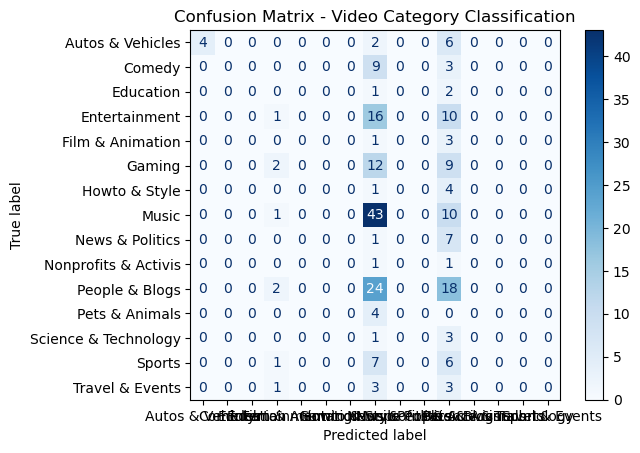

In [37]:
ConfusionMatrixDisplay.from_estimator(model, x_test_vector, y_test, cmap="Blues")
plt.title("Confusion Matrix - Video Category Classification")
plt.show()